In [28]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import torch
import torch.nn as nn	# 各种层类型的实现
import torch.nn.functional as F	# 各中层函数的实现，与层类型对应，如：卷积函数、池化函数、归一化函数等等
import torch.optim as optim	# 实现各种优化算法的包
from torchvision import datasets, transforms
import numpy as np

import argparse
import sys


import numpy as np
from numpy.random import permutation
import matplotlib.pyplot as plt
from grid_data import GridData

from compute_mpe import CircuitMPE
import sys
sys.path.insert(0,'/root/gurobi903/linux64/lib/python3.6_utf32/gurobipy')
import gurobipy
cmpe = CircuitMPE('/root/PySDD/notebooks/ml100.vtree', '/root/PySDD/notebooks/ml100.sdd')
class para:
    def __init__(self):
        self.batch_size=16
        self.wmc=10
        self.solDim=100
        self.card=10
        self.test_batch_size=1000
        self.epochs=10
        self.lr=0.1
        self.momentum=0.5
        self.no_cuda='store_true'
        self.seed=1
        self.log_interval=10
        self.hidden_dim=10
args=para()
legalList={0: [46], 1: [59], 2: [53, 63, 86], 3: [17, 22, 23, 24, 26, 34, 51, 61, 66, 74, 81, 85, 87, 89, 90, 96], 4: [24, 26, 37, 71, 83, 87, 94, 99], 5: [96], 6: [38], 7: [85], 8: [19, 64], 9: [], 10: [], 11: [], 12: [17, 79, 81], 13: [17, 23, 24, 25, 26, 30, 36, 42, 54, 56, 61, 66, 68, 72, 77, 81, 84, 89, 92, 95], 14: [], 15: [], 16: [17, 24, 25, 27, 35, 39, 42, 46, 48, 56, 61, 66, 72, 76, 81, 84, 89], 17: [3, 12, 13, 16, 24, 25, 27, 29, 35, 39, 42, 46, 51, 52, 54, 56, 61, 66, 72, 76, 77, 79, 81, 85, 89, 92, 96], 18: [], 19: [8, 37, 64, 70, 91], 20: [], 21: [], 22: [3, 30, 61, 66, 78, 81, 85, 90, 96], 23: [3, 13, 61, 66, 89], 24: [3, 4, 13, 16, 17, 25, 26, 27, 31, 34, 38, 42, 51, 54, 56, 61, 66, 68, 72, 74, 76, 77, 81, 84, 87, 89, 99], 25: [13, 16, 17, 24, 27, 35, 36, 39, 40, 42, 48, 51, 52, 54, 56, 61, 66, 68, 72, 76, 77, 81, 84, 89, 92], 26: [3, 4, 13, 24, 34, 42, 54, 66, 74, 77, 81, 83, 92, 97], 27: [16, 17, 24, 25, 35, 39, 46, 51, 52, 61, 68, 76, 87, 99], 28: [], 29: [17, 35, 56, 66, 72, 79, 81, 89], 30: [13, 22, 54, 61, 66, 73, 75, 78, 81, 95], 31: [24, 46, 51, 52, 61, 76, 79], 32: [], 33: [], 34: [3, 24, 26, 54, 66, 71, 74, 77, 81, 84, 94], 35: [16, 17, 25, 27, 29, 36, 39, 40, 46, 48, 52, 56, 61, 66, 72, 76, 77, 81, 89], 36: [13, 25, 35, 42, 56, 57, 66, 77, 81, 84, 89, 92], 37: [4, 19, 51, 64, 87, 99], 38: [6, 24, 51, 63, 67, 99], 39: [16, 17, 25, 27, 35, 48, 56, 61, 76, 77, 81, 85, 89], 40: [25, 35], 41: [], 42: [13, 16, 17, 24, 25, 26, 36, 54, 56, 61, 66, 68, 72, 76, 77, 81, 84, 89, 92], 43: [], 44: [51, 74], 45: [], 46: [0, 16, 17, 27, 31, 35, 51, 52, 61, 76, 96], 47: [], 48: [16, 25, 35, 39, 56, 61, 66, 77, 89], 49: [], 50: [], 51: [3, 17, 24, 25, 27, 31, 37, 38, 44, 46, 61, 68, 76, 87, 94, 99], 52: [17, 25, 27, 31, 35, 46, 61, 72, 76, 79, 81, 89], 53: [2, 70, 86, 93], 54: [13, 17, 24, 25, 26, 30, 34, 42, 56, 61, 66, 68, 72, 77, 81, 84, 89, 92, 95], 55: [], 56: [13, 16, 17, 24, 25, 29, 35, 36, 39, 42, 48, 54, 61, 66, 77, 81, 84, 89, 92], 57: [36], 58: [], 59: [1], 60: [], 61: [3, 13, 16, 17, 22, 23, 24, 25, 27, 30, 31, 35, 39, 42, 46, 48, 51, 52, 54, 56, 66, 72, 76, 77, 79, 81, 84, 85, 87, 89, 90, 96], 62: [], 63: [2, 38], 64: [8, 19, 37, 74, 87, 91], 65: [], 66: [3, 13, 16, 17, 22, 23, 24, 25, 26, 29, 30, 34, 35, 36, 42, 48, 54, 56, 61, 72, 73, 74, 76, 77, 81, 84, 85, 89, 92], 67: [38], 68: [13, 24, 25, 27, 42, 51, 54, 87, 99], 69: [], 70: [19, 53], 71: [4, 34, 74], 72: [13, 16, 17, 24, 25, 29, 35, 42, 52, 54, 61, 66, 76, 79, 81, 89], 73: [30, 66, 78, 84], 74: [3, 24, 26, 34, 44, 64, 66, 71, 77, 83], 75: [30], 76: [16, 17, 24, 25, 27, 31, 35, 39, 42, 46, 51, 52, 61, 66, 72, 79, 81, 89, 96], 77: [13, 17, 24, 25, 26, 34, 35, 36, 39, 42, 48, 54, 56, 61, 66, 74, 81, 84, 89, 92], 78: [22, 30, 73, 85, 90], 79: [12, 17, 29, 31, 52, 61, 72, 76, 81, 89], 80: [], 81: [3, 12, 13, 16, 17, 22, 24, 25, 26, 29, 30, 34, 35, 36, 39, 42, 52, 54, 56, 61, 66, 72, 76, 77, 79, 84, 85, 89, 92, 95], 82: [], 83: [4, 26, 74], 84: [13, 16, 24, 25, 34, 36, 42, 54, 56, 61, 66, 73, 77, 81, 89], 85: [3, 7, 17, 22, 39, 61, 66, 78, 81, 89, 90], 86: [2, 53, 88, 91], 87: [3, 4, 24, 27, 37, 51, 61, 64, 68, 91, 94, 99], 88: [86], 89: [3, 13, 16, 17, 23, 24, 25, 29, 35, 36, 39, 42, 48, 52, 54, 56, 61, 66, 72, 76, 77, 79, 81, 84, 85, 92], 90: [3, 22, 61, 78, 85], 91: [19, 64, 86, 87, 94], 92: [13, 17, 25, 26, 36, 42, 54, 56, 66, 77, 81, 89, 95], 93: [53], 94: [4, 34, 51, 87, 91, 99], 95: [13, 30, 54, 81, 92], 96: [3, 5, 17, 22, 46, 61, 76], 97: [26], 98: [], 99: [4, 24, 27, 37, 38, 51, 68, 87, 94]}
def checkFea(x):
    cnt=0
    cntT=0
    for i in range(len(legalList.keys())):
        for j in legalList[i]:
            cntT+=1
            if x[j]+x[i]>1:
                cnt+=1
    return cnt/cntT/2+abs(x.sum()-args.card)/args.card/2
def CB(alpha,x,M):
    return alpha*np.sqrt(np.dot(np.dot(x.T,np.linalg.inv(M)),x))
def solver(theta,MODEL):

    import gurobipy
    import time
    s=time.time()
    # 创建模型
    variables=[]
    for i in range(args.solDim):
        variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
    # 更新变量环境
    MODEL.update()

    # 创建目标函数
    MODEL.setObjective(np.array(variables).dot(theta), sense=gurobipy.GRB.MAXIMIZE)

    # 创建约束条件
    cnt=0
    for i in range(args.solDim):
        if len(legalList)>0:
            for j in legalList[i]:
                MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                cnt+=1
    MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
    f=time.time()
    # 执行最优化
    MODEL.optimize()
    return np.array(MODEL.x)
def solver_quad(Q,MODEL):

    import gurobipy
    import time
    s=time.time()
    # 创建模型
    variables=[]
    for i in range(args.solDim):
        variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
    # 更新变量环境
    MODEL.update()

    # 创建目标函数
    MODEL.setObjective(np.array(variables).dot(Q).dot(np.array(variables)), sense=gurobipy.GRB.MAXIMIZE)

    # 创建约束条件
    cnt=0
    for i in range(args.solDim):
        if len(legalList)>0:
            for j in legalList[i]:
                MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                cnt+=1
    MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
    f=time.time()
    # 执行最优化
    
    print('??')
    MODEL.optimize()
    print('??')
    return np.array(MODEL.x)

In [29]:
legalList

{0: [46],
 1: [59],
 2: [53, 63, 86],
 3: [17, 22, 23, 24, 26, 34, 51, 61, 66, 74, 81, 85, 87, 89, 90, 96],
 4: [24, 26, 37, 71, 83, 87, 94, 99],
 5: [96],
 6: [38],
 7: [85],
 8: [19, 64],
 9: [],
 10: [],
 11: [],
 12: [17, 79, 81],
 13: [17,
  23,
  24,
  25,
  26,
  30,
  36,
  42,
  54,
  56,
  61,
  66,
  68,
  72,
  77,
  81,
  84,
  89,
  92,
  95],
 14: [],
 15: [],
 16: [17, 24, 25, 27, 35, 39, 42, 46, 48, 56, 61, 66, 72, 76, 81, 84, 89],
 17: [3,
  12,
  13,
  16,
  24,
  25,
  27,
  29,
  35,
  39,
  42,
  46,
  51,
  52,
  54,
  56,
  61,
  66,
  72,
  76,
  77,
  79,
  81,
  85,
  89,
  92,
  96],
 18: [],
 19: [8, 37, 64, 70, 91],
 20: [],
 21: [],
 22: [3, 30, 61, 66, 78, 81, 85, 90, 96],
 23: [3, 13, 61, 66, 89],
 24: [3,
  4,
  13,
  16,
  17,
  25,
  26,
  27,
  31,
  34,
  38,
  42,
  51,
  54,
  56,
  61,
  66,
  68,
  72,
  74,
  76,
  77,
  81,
  84,
  87,
  89,
  99],
 25: [13,
  16,
  17,
  24,
  27,
  35,
  36,
  39,
  40,
  42,
  48,
  51,
  52,
  54,
  56,
 

In [30]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

def inv_sherman_morrison(u, A_inv):
    """Inverse of a matrix with rank 1 update.
    """
    Au = np.dot(A_inv, u)
    A_inv -= np.outer(Au, Au)/(1+np.dot(u.T, Au))
    return A_inv

class Model(nn.Module):
    """Template for fully connected neural network for scalar approximation.
    """
    def __init__(self, 
                 input_size=1, 
                 hidden_size=2,
                 n_layers=1,
                 activation='ReLU',
                 p=0.0,
                ):
        super(Model, self).__init__()
        
        self.n_layers = n_layers
        
        if self.n_layers == 1:
            self.layers = [nn.Linear(input_size, 1)]
        else:
            size  = [input_size] + [hidden_size,] * (self.n_layers-1) + [1]
            self.layers = [nn.Linear(size[i], size[i+1]) for i in range(self.n_layers)]
        self.layers = nn.ModuleList(self.layers)
        
        # dropout layer
        self.dropout = nn.Dropout(p=p)
        
        # activation function
        if activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        elif activation == 'ReLU':
            self.activation = nn.ReLU()
        elif activation == 'LeakyReLU':
            self.activation = nn.LeakyReLU(negative_slope=0.1)
        else:
            raise Exception('{} not an available activation'.format(activation))
            
    def forward(self, x):
        for i in range(self.n_layers-1):
            x = self.dropout(self.activation(self.layers[i](x)))
        x = self.layers[-1](x)
        return x


In [31]:
import numpy as np
import abc
from tqdm import tqdm

class UCB(abc.ABC):
    """Base class for UBC methods.
    """
    def __init__(self,
                 bandit,
                 reg_factor=1.0,
                 confidence_scaling_factor=-1.0,
                 delta=0.1,
                 train_every=1,
                 throttle=int(1e2),
                ):
        # bandit object, contains features and generated rewards
        self.bandit = bandit
        # L2 regularization strength
        self.reg_factor = reg_factor
        # Confidence bound with probability 1-delta
        self.delta = delta
        # multiplier for the confidence bound (default is bandit reward noise std dev)
        if confidence_scaling_factor == -1.0:
            confidence_scaling_factor = bandit.noise_std
        self.confidence_scaling_factor = confidence_scaling_factor
        
        # train approximator only every few rounds
        self.train_every = train_every
        self.best_recommended_reward =-200
        self.best_recommended_action =np.array([1]*args.card+[0]*(self.bandit.n_features-args.card))
        self.rewards_list=[]
        self.best_sample_rewards_list=[]
        self.feasi=[]
        # throttle tqdm updates
        self.throttle = throttle
        self.solverSol=None
        self.reset()
        
    def reset_upper_confidence_bounds(self):
        """Initialize upper confidence bounds and related quantities.
        """
        self.exploration_bonus = np.empty((self.bandit.T, self.bandit.n_arms))
        self.mu_hat = np.empty((self.bandit.T, self.bandit.n_arms)) 
        self.meta_mu_hat = np.empty(( self.bandit.n_features)) 
        self.cross_mu_hat = np.empty(( self.bandit.n_features**2)) 
        self.upper_confidence_bounds = np.ones((self.bandit.T, self.bandit.n_arms))
        self.meta_values= np.ones((self.bandit.n_features))
        self.cross_values= np.ones((self.bandit.n_features**2))
        self.knn_metabest=-100
        self.best_rewards_oracle=-100
    def reset_regrets(self):
        """Initialize regrets.
        """
        self.regrets = np.empty(self.bandit.T)

    def reset_actions(self):
        """Initialize cache of actions.
        """
        self.actions = np.empty(self.bandit.T).astype('int')
    
    def reset_A_inv(self):
        """Initialize n_arms square matrices representing the inverses
        of exploration bonus matrices.
        """
        self.A_inv = np.array(
            [
                np.eye(self.approximator_dim)/self.reg_factor for _ in self.bandit.arms
            ]
        )
    def reset_grad_approx(self):
        """Initialize the gradient of the approximator w.r.t its parameters.
        """
        self.grad_approx = np.zeros((self.bandit.n_arms, self.approximator_dim))

    def sample_action(self):
        """Return the action to play based on current estimates
        """
        if self.iteration>=max(self.bandit.n_features*4,100):
            return np.argmax(self.upper_confidence_bounds[self.iteration]).astype('int')
        else:
            return np.random.choice(self.bandit.n_arms)
    @abc.abstractmethod
    def reset(self):
        """Initialize variables of interest.
        To be defined in children classes.
        """
        pass

    @property
    @abc.abstractmethod
    def approximator_dim(self):
        """Number of parameters used in the approximator.
        """
        pass
    
    @property
    @abc.abstractmethod
    def confidence_multiplier(self):
        """Multiplier for the confidence exploration bonus.
        To be defined in children classes.
        """
        pass
    
    @abc.abstractmethod
    def update_confidence_bounds(self):
        """Update the confidence bounds for all arms at time t.
        To be defined in children classes.
        """
        pass

    @abc.abstractmethod
    def update_output_gradient(self):
        """Compute output gradient of the approximator w.r.t its parameters.
        """
        pass
    
    @abc.abstractmethod
    def train(self):
        """Update approximator.
        To be defined in children classes.
        """
        pass
    
    @abc.abstractmethod
    def predict(self):
        """Predict rewards based on an approximator.
        To be defined in children classes.
        """
        pass

    def update_confidence_bounds(self):
        """Update confidence bounds and related quantities for all arms.
        """
        
        if self.iteration>max(self.bandit.n_features*4,100):#self.bandit.n_features:
            self.bandit.features[self.iteration][2]=self.best_recommended_action
            self.bandit.features[self.iteration][0]=self.solverSol
            self.bandit.features[self.iteration][1]=self.solverSol_quad
            for j in range(3,self.bandit.n_arms//3):
                tmp=[np.random.beta(min(1-0.1,max(0.1,mm)),1-min(1-0.1,max(0.1,mm))) for mm in self.solverSol]#[self.meta_values[i]+2*np.sqrt(np.log(self.iteration+1)/self.cnt[i]/self.iteration) for i in range(self.bandit.n_features)]
                tmp2=sorted(tmp)[-args.card:] 
                self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            for j in range(n_arms//3,self.bandit.n_arms//2):
                tmp=[np.random.beta(min(1-0.1,max(0.1,mm)),1-min(1-0.1,max(0.1,mm))) for mm in self.solverSol_quad]#[self.meta_values[i]+2*np.sqrt(np.log(self.iteration+1)/self.cnt[i]/self.iteration) for i in range(self.bandit.n_features)]
                tmp2=sorted(tmp)[-args.card:] 
                self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            for j in range(n_arms//2,2*self.bandit.n_arms//3):
                tmp=self.bandit.features[self.iteration][j]+np.random.random()*(self.best_recommended_action-self.bandit.features[self.iteration][j])
                if self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][j]).to(self.device)).detach().squeeze()<self.model.forward(torch.FloatTensor(tmp).to(self.device)).detach().squeeze():
                    tmp2=sorted(tmp)[-args.card:] 
                    self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            if np.random.random()>0.4:
                a=np.random.choice(self.bandit.n_arms)
                b=np.random.choice(self.bandit.n_arms)
                if a!=b:
                    if  self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][a]).to(self.device)).detach().squeeze()>self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][b]).to(self.device)).detach().squeeze():
                        tmp=self.bandit.features[self.iteration][b]+np.random.random()*(a-b)
                        tmp2=sorted(tmp)[-args.card:] 
                        self.bandit.features[self.iteration][b]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))

        self.update_output_gradient()
        # UCB exploration bonus
        self.exploration_bonus[self.iteration] = np.array(
            [
                50000000*constraint(self.bandit.features[self.iteration][a])+self.confidence_multiplier * np.sqrt(np.dot(self.grad_approx[a], np.dot(self.A_inv[a], self.grad_approx[a].T))) for a in self.bandit.arms
            ]
        ) #500000*constraint(self.bandit.features[self.iteration][a])+
        # update reward prediction mu_hat
        self.predict()
        self.bandit.rewards[self.iteration]=np.array([self.bandit.h(self.bandit.features[self.iteration, k],self.iteration) + self.bandit.noise_std*np.random.randn() for k in range(self.bandit.n_arms)])
        self.bandit.rewards2[self.iteration]=np.array([self.bandit.hwithoutconstraints(self.bandit.features[self.iteration, k]) + self.bandit.noise_std*np.random.randn() for k in range(self.bandit.n_arms)])

        # estimated combined bound for reward
        self.meta_values=self.meta_mu_hat# + self.meta_exploration_bonus[self.iteration] 
        if self.iteration>=max(self.bandit.n_features*4,100):
            self.cross_values=self.cross_mu_hat
            for i in range(self.bandit.n_features):
                for j in range(self.bandit.n_features):
                    if i==j:
                        self.cross_values[i*self.bandit.n_features+j]=self.meta_mu_hat[i]
                    else:
                        self.cross_values[i*self.bandit.n_features+j]=(self.cross_mu_hat[i*self.bandit.n_features+j]-self.meta_mu_hat[i]-self.meta_mu_hat[j])/2
            self.cross_values=self.cross_values.reshape(self.bandit.n_features,self.bandit.n_features)
        with gurobipy.Env(empty=True) as env:
            env.setParam('OutputFlag', 0)
            env.setParam('IterationLimit',600)
            env.start()
            with gurobipy.Model(env=env) as m:
                self.solverSol=np.divide(solver(self.meta_values,m),np.sqrt(args.card))
        if self.iteration>=max(self.bandit.n_features*4,100):
            with gurobipy.Env(empty=True) as env:
                env.setParam('OutputFlag', 0)
                env.setParam('IterationLimit',600)
                env.start()
                with gurobipy.Model(env=env) as m:
                    self.solverSol_quad=np.divide(solver_quad(self.cross_values,m),np.sqrt(args.card))
                    print('solverSol_quad',self.bandit.hwithoutconstraints(self.solverSol_quad))
        tmp=sorted(self.meta_values )[-args.card:]   #后面记得加/改一下探索项！！！
        self.meta_values = np.array([1 if self.meta_values[i] in tmp else 0 for i in range(self.bandit.n_features)])
        if len(np.argwhere(self.meta_values==1)):
            metabest=np.argwhere(self.meta_values==1)[:args.card].reshape(args.card)
        else:
            metabest=list(range(self.bandit.n_features))
            np.random.shuffle(metabest)
            metabest=np.array(metabest[:args.card])
        knn_metabest={}
        import copy
        for i in range(10):
            tmp=metabest.copy()
            tmp[np.random.choice(range(args.card))]=np.random.choice(range(self.bandit.n_features))
            tmp=np.divide(np.array([1 if i in tmp else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            tmpvalue=self.model.forward(
                    torch.FloatTensor(tmp).to(self.device)
                ).detach().squeeze()
            knn_metabest[tmpvalue]=tmp
        
        self.meta_values=np.divide(self.meta_values,np.sqrt(args.card))
        self.upper_confidence_bounds[self.iteration] = self.mu_hat[self.iteration] + self.exploration_bonus[self.iteration]
        self.knn_metabest=knn_metabest[max(knn_metabest.keys())]
        self.bandit.knn_metabestValue =self.bandit.h(self.knn_metabest,self.iteration)
        self.bandit.best_rewards_oracle =max( max(np.max(self.bandit.rewards, axis=1)),self.bandit.knn_metabestValue)
        self.best_rewards_oracle=max(max(self.best_rewards_oracle,self.bandit.best_rewards_oracle),self.bandit.hwithoutconstraints(self.knn_metabest))
        print('----------------',self.best_rewards_oracle,self.bandit.hwithoutconstraints(self.knn_metabest),checkFea(torch.from_numpy(self.knn_metabest)*np.sqrt(args.card)),self.bandit.hwithoutconstraints(self.solverSol),checkFea(np.sqrt(args.card)*torch.from_numpy(self.solverSol)))
    def update_A_inv(self):
        self.A_inv[self.action] = inv_sherman_morrison(
            self.grad_approx[self.action],
            self.A_inv[self.action]
        )
    def run(self):
        """Run an episode of bandit.
        """
        postfix = {
            'total regret': 0.0,
            '% optimal arm': 0.0,
        }
        with tqdm(total=self.bandit.T, postfix=postfix) as pbar:
            for t in range(self.bandit.T):
                # update confidence of all arms based on observed features at time t
                self.update_confidence_bounds()
                # pick action with the highest boosted estimated reward
                self.action = self.sample_action()
                self.actions[t] = self.action
                # update approximator
                if t % self.train_every == 0:
                    self.train()
                # update exploration indicator A_inv
                self.update_A_inv()
                # compute regret
                
                #print(t,self.action,self.bandit.best_rewards_oracle[t],self.bandit.rewards[t, self.action])
                print('hhhhh',self.bandit.hwithoutconstraints(self.bandit.features[self.iteration][self.action]),np.sqrt(args.card)*sum(self.bandit.features[self.iteration][self.action]),checkFea(torch.from_numpy(self.bandit.features[self.iteration][self.action])*np.sqrt(args.card)))
                self.regrets[t] = self.best_rewards_oracle-self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration)
                if self.best_recommended_reward<self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration):
                    self.best_recommended_reward=self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration)
                    self.best_recommended_action=self.bandit.features[self.iteration][self.action]
                self.best_sample_rewards_list.append( self.best_rewards_oracle)
                self.rewards_list.append(self.bandit.hwithoutconstraints(self.bandit.features[self.iteration][self.action]))
                self.feasi.append(checkFea(self.bandit.features[self.iteration][self.action]*np.sqrt(args.card)))
                # increment counter
                self.iteration += 1
                
                # log
                postfix['total regret'] += self.regrets[t]
                n_optimal_arm = np.sum(
                    self.actions[:self.iteration]==self.bandit.best_actions_oracle[:self.iteration]
                )
                postfix['% optimal arm'] = '{:.2%}'.format(n_optimal_arm / self.iteration)
                
                if t % self.throttle == 0:
                    pbar.set_postfix(postfix)
                    pbar.update(self.throttle)


In [32]:
import numpy as np
import itertools


class ContextualBandit():
    def __init__(self,
                 T,
                 n_arms,
                 n_features,
                 h,
                 hwithoutconstraints,
                 noise_std=1.0,
                ):
        # number of rounds
        self.T = T
        # number of arms
        self.n_arms = n_arms
        # number of features for each arm
        self.n_features = n_features
        # average reward function
        # h : R^d -> R
        self.h = h
        self.hwithoutconstraints=hwithoutconstraints
        self.knn_metabestValue=-100
        self.best_rewards_oracle = -100
        # standard deviation of Gaussian reward noise
        self.noise_std = noise_std
        # generate random features
        print('44-------------')
        self.reset()

    @property
    def arms(self):
        """Return [0, ...,n_arms-1]
        """
        return range(self.n_arms)
        
    def reset(self):
        """Generate new features and new rewards.
        """
        print('55-------------')
        self.reset_features()
        print('66-------------')
        self.reset_rewards()
        
    def reset_features(self):
        """Generate normalized random N(0,1) features.
        """
        x1,x2=[],[]
        for i in range(self.T):
            tmp1,tmp2=[],[]
            for j in range(self.n_arms):
                a=np.array([0]*(self.n_features-args.card)+[1]*args.card)
                np.random.shuffle(a)
                a=np.divide(a,np.sqrt(args.card))
                tmp1.append(a)
            for j in range(self.n_features):
                a=np.array([0.0]*j+[1.0]+[0.0]*(self.n_features-j-1))
                tmp2.append(a)
            x1.append(tmp1)
            x2.append(tmp2)
        x1,x2=np.array(x1),np.array(x2)
        #x /= np.repeat(np.linalg.norm(x, axis=-1, ord=2), self.n_features).reshape(self.T, self.n_arms, self.n_features)
        self.features = x1
        self.meta_features=x2
        self.cross_features=[]
        for i in range(self.n_features):
            for j in range(self.n_features):
                tmp=np.zeros(self.n_features)
                tmp[i]=1
                tmp[j]=1
                self.cross_features.append(tmp)
                
    def reset_rewards(self):
        """Generate rewards for each arm and each round,
        following the reward function h + Gaussian noise.
        """
        
        self.rewards = np.random.random([self.T, self.n_arms])
        self.rewards2 = np.random.random([self.T, self.n_arms])
        
        # to be used only to compute regret, NOT by the algorithm itself
        self.best_rewards_oracle =max( max(np.max(self.rewards, axis=1)),self.knn_metabestValue)
        self.best_actions_oracle = np.argmax(self.rewards, axis=1)


In [33]:
import numpy as np
import torch
import torch.nn as nn

class NeuralUCB(UCB):
    """Neural UCB.
    """
    def __init__(self,
                 bandit,
                 hidden_size=20,
                 n_layers=2,
                 reg_factor=1.0,
                 delta=0.01,
                 confidence_scaling_factor=-1.0,
                 training_window=100,
                 p=0.0,
                 learning_rate=0.01,
                 epochs=1,
                 train_every=1,
                 throttle=1,
                 use_cuda=False,
                ):

        # hidden size of the NN layers
        self.hidden_size = hidden_size
        # number of layers
        self.n_layers = n_layers
        
        # number of rewards in the training buffer
        self.training_window = training_window
        
        # NN parameters
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        self.use_cuda = use_cuda
        if self.use_cuda:
            raise Exception(
                'Not yet CUDA compatible : TODO for later (not necessary to obtain good results')
        self.device = torch.device('cuda' if torch.cuda.is_available() and self.use_cuda else 'cpu')
    
        # dropout rate
        self.p = p

        # neural network
        self.model = Model(input_size=bandit.n_features, 
                           hidden_size=self.hidden_size,
                           n_layers=self.n_layers,
                           p=self.p
                          ).to(self.device)
        self.model2 = Model(input_size=bandit.n_features, 
                           hidden_size=self.hidden_size,
                           n_layers=self.n_layers,
                           p=self.p
                          ).to(self.device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.optimizer2 = torch.optim.Adam(self.model2.parameters(), lr=self.learning_rate)

        super().__init__(bandit, 
                         reg_factor=reg_factor,
                         confidence_scaling_factor=confidence_scaling_factor,
                         delta=delta,
                         throttle=throttle,
                         train_every=train_every,
                        )

    @property
    def approximator_dim(self):
        """Sum of the dimensions of all trainable layers in the network.
        """
        return sum(w.numel() for w in self.model.parameters() if w.requires_grad)
    
    @property
    def confidence_multiplier(self):
        """Constant equal to confidence_scaling_factor
        """
        return self.confidence_scaling_factor
    
    def update_output_gradient(self):
        """Get gradient of network prediction w.r.t network weights.
        """
        for a in self.bandit.arms:
            x = torch.FloatTensor(
                self.bandit.features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model.zero_grad()
            y = self.model(x)
            y.backward()
            
            self.grad_approx[a] = torch.cat(
                [w.grad.detach().flatten() / np.sqrt(self.hidden_size) for w in self.model.parameters() if w.requires_grad]
            ).to(self.device)
        for a in range(self.bandit.n_features):
            x = torch.FloatTensor(
                self.bandit.meta_features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model.zero_grad()
            y = self.model(x)
            y.backward()
        for a in self.bandit.arms:
            x = torch.FloatTensor(
                self.bandit.features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model2.zero_grad()
            y = self.model2(x)
            y.backward()

        for a in range(self.bandit.n_features):
            x = torch.FloatTensor(
                self.bandit.meta_features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model2.zero_grad()
            y = self.model2(x)
            y.backward()
            
    def reset(self):
        """Reset the internal estimates.
        """
        self.reset_upper_confidence_bounds()
        self.reset_regrets()
        self.reset_actions()
        self.reset_A_inv()
        self.reset_grad_approx()
        self.iteration = 0

    def train(self):
        """Train neural approximator.
        """
        iterations_so_far = range(np.max([0, self.iteration-self.training_window]), self.iteration+1)
        actions_so_far = self.actions[np.max([0, self.iteration-self.training_window]):self.iteration+1]

        x_train = torch.FloatTensor(self.bandit.features[iterations_so_far, actions_so_far]).to(self.device)
        y_train = torch.FloatTensor(self.bandit.rewards[iterations_so_far, actions_so_far]).squeeze().to(self.device)
        y_train2 = torch.FloatTensor(self.bandit.rewards2[iterations_so_far, actions_so_far]).squeeze().to(self.device)
        
        # train mode
        self.model.train()
        for _ in range(self.epochs):
            y_pred = self.model.forward(x_train).squeeze()
            loss = nn.MSELoss()(y_train2, y_pred)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        self.model2.train()
        for _ in range(self.epochs):
            y_pred = self.model2.forward(x_train).squeeze()
            loss = nn.MSELoss()(y_train2, y_pred)
            self.optimizer2.zero_grad()
            loss.backward()
            self.optimizer2.step()
        
        
    def predict(self):
        """Predict reward.
        """
        # eval mode
        self.model.eval()
        self.mu_hat[self.iteration] = self.model.forward(
            torch.FloatTensor(self.bandit.features[self.iteration]).to(self.device)
        ).detach().squeeze()
        self.meta_mu_hat = self.model2.forward(
            torch.FloatTensor(self.bandit.meta_features[self.iteration]).to(self.device)
        ).detach().squeeze()
        if self.iteration>=max(self.bandit.n_features*4,100):
            self.cross_mu_hat= self.model2.forward(
                torch.FloatTensor(self.bandit.cross_features).to(self.device)
            ).detach().squeeze()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [40]:
T = int(12e2)
n_arms =5
n_features = 100
noise_std = 0.1

confidence_scaling_factor = noise_std

n_sim = 1

p = 0.2
hidden_size = 4#16
epochs = 100#100
train_every = 10#10
confidence_scaling_factor = 1.0
use_cuda = False

In [41]:
### mean reward function

a = np.load('rateListml100.npy')
a /= np.linalg.norm(a, ord=2)
Q=np.random.random([100,100]) #np.load('Q.npy')#Q=np.random.random([n_features,n_features])+100*np.diag(np.ones(n_features))
#h = lambda x:   100*a.dot(Q).dot(a)   #min(100*(np.dot(a, x)**(5)),10000)
#100*a.dot(Q).dot(a)
def h(x,iteration):
    yu=torch.unbind(torch.from_numpy(x))
    xu = torch.unbind(torch.from_numpy(np.array([0.02]*n_features).astype(np.float32)))
    wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu]) 
    return  50000*(1/(1+np.exp(-iteration))-0.5)*torch.log(torch.mean(wmc)).float()+100*(x.dot(a))
def constraint(x):
    yu=torch.unbind(torch.from_numpy(x))
    xu = torch.unbind(torch.from_numpy(np.array([0.02]*n_features).astype(np.float32)))
    wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu]) 
    return  50000*torch.log(torch.mean(wmc)).float()
hwithoutconstraints = lambda x:100*(x.dot(a))  #100*(x.dot(a))**3  、100*x.dot(Q).dot(x)

In [42]:
with gurobipy.Env(empty=True) as env:
        env.setParam('OutputFlag', 0)
        env.setParam('IterationLimit',600)
        env.start()
        with gurobipy.Model(env=env) as m:
            action=solver(a,m)
hwithoutconstraints(action)/(np.sqrt(args.card))

35.74394583452063

In [43]:
with gurobipy.Env(empty=True) as env:
        env.setParam('OutputFlag', 0)
        env.setParam('IterationLimit',600)
        env.start()
        with gurobipy.Model(env=env) as m:
            action2=solver_quad(Q,m)
hwithoutconstraints(action2)/10

??
??


9.733393341302872

In [44]:
bandit = ContextualBandit(T, n_arms, n_features, h,hwithoutconstraints, noise_std=noise_std)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda
                     )
        
    model.run()
    regrets[i] = np.cumsum(model.regrets)

44-------------
55-------------


  0%|          | 0/1200 [00:00<?, ?it/s, % optimal arm=0, total regret=0]

66-------------
---------------- 33.550601959228516 29.900901640647316 tensor(0., dtype=torch.float64) 29.730677654875503 tensor(0., dtype=torch.float64)
hhhhh 30.827888773892404 10.000000000000002 tensor(0., dtype=torch.float64)


  0%|          | 1/1200 [00:03<1:14:55,  3.75s/it, total regret=2.72, % optimal arm=0.00%]

---------------- 33.550601959228516 31.411633859779077 tensor(0.0027, dtype=torch.float64) 31.261656615812406 tensor(0., dtype=torch.float64)
hhhhh 32.58544610224455 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  0%|          | 2/1200 [00:05<1:04:25,  3.23s/it, total regret=2.13e+3, % optimal arm=50.00%]

---------------- 33.550601959228516 30.858242629644963 tensor(0., dtype=torch.float64) 30.827888773892404 tensor(0., dtype=torch.float64)
hhhhh 30.618733385853748 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  0%|          | 3/1200 [00:07<56:38,  2.84s/it, total regret=4.14e+3, % optimal arm=33.33%]  

---------------- 33.550601959228516 30.268986200351648 tensor(0., dtype=torch.float64) 31.253651361241303 tensor(0., dtype=torch.float64)
hhhhh 32.4115233057622 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  0%|          | 4/1200 [00:10<53:43,  2.70s/it, total regret=8.91e+3, % optimal arm=25.00%]

---------------- 33.550601959228516 30.582842976633657 tensor(0.0014, dtype=torch.float64) 30.827888773892404 tensor(0., dtype=torch.float64)
hhhhh 29.71320189929666 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  0%|          | 5/1200 [00:12<52:55,  2.66s/it, total regret=1.4e+4, % optimal arm=20.00%] 

---------------- 33.550601959228516 31.39044939795177 tensor(0.0014, dtype=torch.float64) 30.827888773892404 tensor(0., dtype=torch.float64)
hhhhh 31.898610480323452 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  0%|          | 6/1200 [00:15<52:49,  2.65s/it, total regret=2.22e+4, % optimal arm=16.67%]

---------------- 33.550601959228516 29.609618235622428 tensor(0., dtype=torch.float64) 30.827888773892404 tensor(0., dtype=torch.float64)
hhhhh 31.07123960686988 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  1%|          | 7/1200 [00:17<52:05,  2.62s/it, total regret=3.31e+4, % optimal arm=14.29%]

---------------- 33.550601959228516 31.13737643457366 tensor(0.0014, dtype=torch.float64) 30.827888773892404 tensor(0., dtype=torch.float64)
hhhhh 32.990512878853075 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  1%|          | 8/1200 [00:20<53:12,  2.68s/it, total regret=4.44e+4, % optimal arm=12.50%]

---------------- 33.550601959228516 31.44050456288352 tensor(0.0027, dtype=torch.float64) 32.074979123928934 tensor(0., dtype=torch.float64)
hhhhh 31.803826305942618 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  1%|          | 9/1200 [00:23<55:23,  2.79s/it, total regret=4.9e+4, % optimal arm=11.11%] 

---------------- 33.550601959228516 32.357627729684424 tensor(0.0041, dtype=torch.float64) 32.27390229014787 tensor(0., dtype=torch.float64)
hhhhh 32.093522183955116 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  1%|          | 10/1200 [00:26<54:38,  2.76s/it, total regret=5.73e+4, % optimal arm=10.00%]

---------------- 33.550601959228516 31.052887624968818 tensor(0.0014, dtype=torch.float64) 31.792609949315718 tensor(0., dtype=torch.float64)
hhhhh 32.392417849330776 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 11/1200 [00:30<1:03:08,  3.19s/it, total regret=5.73e+4, % optimal arm=9.09%]

---------------- 33.550601959228516 32.67134643965161 tensor(0.0014, dtype=torch.float64) 32.45475149195974 tensor(0., dtype=torch.float64)
hhhhh 31.73185370255318 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  1%|          | 12/1200 [00:33<1:00:48,  3.07s/it, total regret=5.99e+4, % optimal arm=8.33%]

---------------- 33.550601959228516 32.45640192632035 tensor(0., dtype=torch.float64) 32.74120328279004 tensor(0., dtype=torch.float64)
hhhhh 31.454907047113352 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  1%|          | 13/1200 [00:36<1:01:03,  3.09s/it, total regret=6.83e+4, % optimal arm=7.69%]

---------------- 33.550601959228516 32.275885403069104 tensor(0.0014, dtype=torch.float64) 32.78309250846346 tensor(0., dtype=torch.float64)
hhhhh 32.26037885953679 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  1%|          | 14/1200 [00:38<56:10,  2.84s/it, total regret=7.09e+4, % optimal arm=7.14%]  

---------------- 33.550601959228516 32.42312087620716 tensor(0.0014, dtype=torch.float64) 32.43835811974316 tensor(0., dtype=torch.float64)
hhhhh 30.770211453071973 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  1%|▏         | 15/1200 [00:41<55:12,  2.80s/it, total regret=7.35e+4, % optimal arm=6.67%]

---------------- 33.550601959228516 32.1115638700599 tensor(0., dtype=torch.float64) 31.56623090630719 tensor(0., dtype=torch.float64)
hhhhh 31.0032763455953 10.000000000000002 tensor(0.0096, dtype=torch.float64)


  1%|▏         | 16/1200 [00:44<56:55,  2.88s/it, total regret=8.8e+4, % optimal arm=6.25%] 

---------------- 33.550601959228516 31.746128016006114 tensor(0.0014, dtype=torch.float64) 31.954592365646526 tensor(0., dtype=torch.float64)
hhhhh 31.905775556603345 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  1%|▏         | 17/1200 [00:47<56:34,  2.87s/it, total regret=9.07e+4, % optimal arm=5.88%]

---------------- 33.550601959228516 32.64245076209431 tensor(0.0014, dtype=torch.float64) 33.13677906049083 tensor(0., dtype=torch.float64)
hhhhh 31.749237570994183 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  2%|▏         | 18/1200 [00:49<54:30,  2.77s/it, total regret=9.33e+4, % optimal arm=5.56%]

---------------- 33.550601959228516 32.68731100522489 tensor(0.0055, dtype=torch.float64) 32.96748690454003 tensor(0., dtype=torch.float64)
hhhhh 31.349810072961148 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 19/1200 [00:53<56:40,  2.88s/it, total regret=9.33e+4, % optimal arm=5.26%]

---------------- 33.550601959228516 32.69262820760182 tensor(0.0014, dtype=torch.float64) 32.702048759703864 tensor(0., dtype=torch.float64)
hhhhh 32.50492775942702 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 20/1200 [00:55<56:40,  2.88s/it, total regret=9.33e+4, % optimal arm=5.00%]

---------------- 33.550601959228516 32.61613475703015 tensor(0., dtype=torch.float64) 32.61613475703015 tensor(0., dtype=torch.float64)
hhhhh 31.525318275983484 10.000000000000002 tensor(0.0123, dtype=torch.float64)


  2%|▏         | 21/1200 [00:59<1:01:04,  3.11s/it, total regret=1.11e+5, % optimal arm=4.76%]

---------------- 33.550601959228516 33.1419240333863 tensor(0.0055, dtype=torch.float64) 32.62866792702486 tensor(0., dtype=torch.float64)
hhhhh 30.135620737259995 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  2%|▏         | 22/1200 [01:02<59:38,  3.04s/it, total regret=1.22e+5, % optimal arm=4.55%]  

---------------- 33.550601959228516 33.31057156572387 tensor(0.0068, dtype=torch.float64) 32.635274376628225 tensor(0., dtype=torch.float64)
hhhhh 31.495254218127222 10.000000000000002 tensor(0.0123, dtype=torch.float64)


  2%|▏         | 23/1200 [01:05<1:00:05,  3.06s/it, total regret=1.4e+5, % optimal arm=4.35%]

---------------- 33.550601959228516 32.466161754008304 tensor(0., dtype=torch.float64) 32.526918000770856 tensor(0., dtype=torch.float64)
hhhhh 30.701792761444914 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  2%|▏         | 24/1200 [01:08<58:36,  2.99s/it, total regret=1.47e+5, % optimal arm=4.17%]  

---------------- 33.550601959228516 32.357467751821346 tensor(0.0055, dtype=torch.float64) 31.784292985300066 tensor(0., dtype=torch.float64)
hhhhh 33.13380827864173 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  2%|▏         | 25/1200 [01:10<56:14,  2.87s/it, total regret=1.59e+5, % optimal arm=4.00%]

---------------- 33.550601959228516 32.44905001286017 tensor(0.0041, dtype=torch.float64) 31.570735732142307 tensor(0., dtype=torch.float64)
hhhhh 31.200452478154855 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  2%|▏         | 26/1200 [01:13<56:59,  2.91s/it, total regret=1.67e+5, % optimal arm=3.85%]

---------------- 33.550601959228516 32.528314920874216 tensor(0.0041, dtype=torch.float64) 32.30997435317124 tensor(0., dtype=torch.float64)
hhhhh 31.68317354617654 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  2%|▏         | 27/1200 [01:16<52:53,  2.71s/it, total regret=1.77e+5, % optimal arm=3.70%]

---------------- 33.550601959228516 32.09394085945245 tensor(0.0041, dtype=torch.float64) 32.056603110007195 tensor(0., dtype=torch.float64)
hhhhh 30.19522274020632 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  2%|▏         | 28/1200 [01:19<55:35,  2.85s/it, total regret=1.85e+5, % optimal arm=7.14%]

---------------- 33.550601959228516 32.35147411874502 tensor(0.0014, dtype=torch.float64) 31.716458601626517 tensor(0., dtype=torch.float64)
hhhhh 33.77371478318235 10.000000000000002 tensor(0.0164, dtype=torch.float64)


  2%|▏         | 29/1200 [01:22<55:00,  2.82s/it, total regret=2.04e+5, % optimal arm=6.90%]

---------------- 33.550601959228516 32.796602745023975 tensor(0.0041, dtype=torch.float64) 31.875624323770147 tensor(0., dtype=torch.float64)
hhhhh 32.318627294260175 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  2%|▎         | 30/1200 [01:24<54:51,  2.81s/it, total regret=2.09e+5, % optimal arm=10.00%]

---------------- 33.550601959228516 32.30457633723462 tensor(0., dtype=torch.float64) 32.14682826870239 tensor(0., dtype=torch.float64)
hhhhh 29.268058900926906 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 31/1200 [01:28<59:02,  3.03s/it, total regret=2.09e+5, % optimal arm=12.90%]

---------------- 33.550601959228516 32.367002338217546 tensor(0.0014, dtype=torch.float64) 32.054334204526434 tensor(0., dtype=torch.float64)
hhhhh 32.03816866529011 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 32/1200 [01:31<58:36,  3.01s/it, total regret=2.09e+5, % optimal arm=12.50%]

---------------- 33.550601959228516 32.26604735350996 tensor(0.0068, dtype=torch.float64) 32.20491696117074 tensor(0., dtype=torch.float64)
hhhhh 31.403474281937992 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  3%|▎         | 33/1200 [01:33<55:32,  2.86s/it, total regret=2.12e+5, % optimal arm=12.12%]

---------------- 33.550601959228516 32.20789693173363 tensor(0.0068, dtype=torch.float64) 31.945642322811885 tensor(0., dtype=torch.float64)
hhhhh 31.787133711507902 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  3%|▎         | 34/1200 [01:37<58:02,  2.99s/it, total regret=2.22e+5, % optimal arm=11.76%]

---------------- 33.550601959228516 32.19715179119827 tensor(0.0014, dtype=torch.float64) 32.0799650613935 tensor(0., dtype=torch.float64)
hhhhh 30.64434586529325 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  3%|▎         | 35/1200 [01:39<56:20,  2.90s/it, total regret=2.34e+5, % optimal arm=14.29%]

---------------- 33.550601959228516 32.502294132691404 tensor(0.0014, dtype=torch.float64) 32.080813721574366 tensor(0., dtype=torch.float64)
hhhhh 32.08045936707353 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  3%|▎         | 36/1200 [01:43<1:00:07,  3.10s/it, total regret=2.41e+5, % optimal arm=13.89%]

---------------- 33.550601959228516 33.04807380929889 tensor(0.0027, dtype=torch.float64) 33.67311815831239 tensor(0., dtype=torch.float64)
hhhhh 31.667974706752005 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  3%|▎         | 37/1200 [01:45<56:36,  2.92s/it, total regret=2.51e+5, % optimal arm=13.51%]  

---------------- 33.550601959228516 32.4547060196069 tensor(0.0027, dtype=torch.float64) 31.964959355268423 tensor(0., dtype=torch.float64)
hhhhh 32.02690094610924 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  3%|▎         | 38/1200 [01:48<54:24,  2.81s/it, total regret=2.59e+5, % optimal arm=15.79%]

---------------- 33.550601959228516 31.175510303605574 tensor(0.0027, dtype=torch.float64) 31.58934429120522 tensor(0., dtype=torch.float64)
hhhhh 31.012978213703988 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  3%|▎         | 39/1200 [01:50<50:46,  2.62s/it, total regret=2.62e+5, % optimal arm=15.38%]

---------------- 33.550601959228516 31.101549875133973 tensor(0.0055, dtype=torch.float64) 31.53127821710926 tensor(0., dtype=torch.float64)
hhhhh 31.27471966830204 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  3%|▎         | 40/1200 [01:53<52:40,  2.72s/it, total regret=2.64e+5, % optimal arm=15.00%]

---------------- 33.550601959228516 32.75787632175696 tensor(0.0068, dtype=torch.float64) 31.9103696778878 tensor(0., dtype=torch.float64)
hhhhh 30.56255712389292 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  3%|▎         | 41/1200 [01:56<53:52,  2.79s/it, total regret=2.67e+5, % optimal arm=17.07%]

---------------- 33.550601959228516 32.11534514358646 tensor(0.0041, dtype=torch.float64) 32.48930623916837 tensor(0., dtype=torch.float64)
hhhhh 29.64189700910892 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  4%|▎         | 42/1200 [01:59<51:56,  2.69s/it, total regret=2.7e+5, % optimal arm=19.05%] 

---------------- 33.550601959228516 32.277963466032794 tensor(0.0055, dtype=torch.float64) 32.58792163598145 tensor(0., dtype=torch.float64)
hhhhh 28.991416886690256 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  4%|▎         | 43/1200 [02:01<50:47,  2.63s/it, total regret=2.74e+5, % optimal arm=18.60%]

---------------- 33.550601959228516 32.06701486515779 tensor(0.0082, dtype=torch.float64) 32.03010403749147 tensor(0., dtype=torch.float64)
hhhhh 30.64983034938267 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  4%|▎         | 44/1200 [02:04<54:09,  2.81s/it, total regret=2.77e+5, % optimal arm=18.18%]

---------------- 33.550601959228516 32.06369632583313 tensor(0.0014, dtype=torch.float64) 31.929461469052583 tensor(0., dtype=torch.float64)
hhhhh 30.700464874498955 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  4%|▍         | 45/1200 [02:07<56:01,  2.91s/it, total regret=2.84e+5, % optimal arm=17.78%]

---------------- 33.550601959228516 32.51779667088694 tensor(0.0027, dtype=torch.float64) 31.716829448690557 tensor(0., dtype=torch.float64)
hhhhh 31.31619445942296 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  4%|▍         | 46/1200 [02:10<54:33,  2.84s/it, total regret=2.89e+5, % optimal arm=17.39%]

---------------- 33.86290915667731 33.86290915667731 tensor(0.0041, dtype=torch.float64) 33.34693955245274 tensor(0., dtype=torch.float64)
hhhhh 30.7011780600535 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 47/1200 [02:13<57:01,  2.97s/it, total regret=2.89e+5, % optimal arm=17.02%]

---------------- 33.86290915667731 33.28241169209352 tensor(0.0027, dtype=torch.float64) 32.44256278092795 tensor(0., dtype=torch.float64)
hhhhh 30.814729357712046 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  4%|▍         | 48/1200 [02:17<1:00:28,  3.15s/it, total regret=2.94e+5, % optimal arm=16.67%]

---------------- 33.86290915667731 32.5258212453178 tensor(0.0041, dtype=torch.float64) 33.36743556757031 tensor(0., dtype=torch.float64)
hhhhh 30.094812952516648 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  4%|▍         | 49/1200 [02:21<1:03:13,  3.30s/it, total regret=2.97e+5, % optimal arm=16.33%]

---------------- 33.86290915667731 33.46375402154519 tensor(0.0041, dtype=torch.float64) 32.550342623897336 tensor(0., dtype=torch.float64)
hhhhh 33.481466327601986 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  4%|▍         | 50/1200 [02:24<1:05:40,  3.43s/it, total regret=3.01e+5, % optimal arm=16.00%]

---------------- 33.86290915667731 33.16077880285704 tensor(0.0068, dtype=torch.float64) 32.349879759099295 tensor(0., dtype=torch.float64)
hhhhh 30.60440299768592 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 51/1200 [02:28<1:04:48,  3.38s/it, total regret=3.01e+5, % optimal arm=15.69%]

---------------- 34.54586148678804 34.54586148678804 tensor(0.0055, dtype=torch.float64) 33.43439584539405 tensor(0., dtype=torch.float64)
hhhhh 30.63959694952272 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 52/1200 [02:30<59:53,  3.13s/it, total regret=3.01e+5, % optimal arm=15.38%]  

---------------- 34.54586148678804 33.406691873332264 tensor(0., dtype=torch.float64) 33.44902734064438 tensor(0., dtype=torch.float64)
hhhhh 31.808056648404403 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  4%|▍         | 53/1200 [02:33<57:03,  2.98s/it, total regret=3.04e+5, % optimal arm=15.09%]

---------------- 34.54586148678804 33.512349123417295 tensor(0.0014, dtype=torch.float64) 33.40358420320856 tensor(0., dtype=torch.float64)
hhhhh 31.441062482735898 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  4%|▍         | 54/1200 [02:36<56:13,  2.94s/it, total regret=3.13e+5, % optimal arm=14.81%]

---------------- 34.54586148678804 34.3939612099518 tensor(0.0082, dtype=torch.float64) 32.376698316125086 tensor(0., dtype=torch.float64)
hhhhh 30.598696806425433 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  5%|▍         | 55/1200 [02:38<53:49,  2.82s/it, total regret=3.21e+5, % optimal arm=14.55%]

---------------- 34.54586148678804 33.62630896542721 tensor(0.0096, dtype=torch.float64) 31.497024812591178 tensor(0., dtype=torch.float64)
hhhhh 32.30345672780113 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  5%|▍         | 56/1200 [02:41<55:03,  2.89s/it, total regret=3.26e+5, % optimal arm=14.29%]

---------------- 34.54586148678804 33.25848757991 tensor(0.0027, dtype=torch.float64) 33.33354405701052 tensor(0., dtype=torch.float64)
hhhhh 32.11632668670513 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  5%|▍         | 57/1200 [02:44<55:42,  2.92s/it, total regret=3.28e+5, % optimal arm=14.04%]

---------------- 34.54586148678804 33.29863919624588 tensor(0.0055, dtype=torch.float64) 33.62023334075096 tensor(0., dtype=torch.float64)
hhhhh 31.456732538251973 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  5%|▍         | 58/1200 [02:46<50:50,  2.67s/it, total regret=3.33e+5, % optimal arm=13.79%]

---------------- 34.54586148678804 33.836973658607064 tensor(0.0041, dtype=torch.float64) 32.38168755210229 tensor(0., dtype=torch.float64)
hhhhh 30.53329955237732 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  5%|▍         | 59/1200 [02:49<53:24,  2.81s/it, total regret=3.45e+5, % optimal arm=15.25%]

---------------- 34.54586148678804 33.21034366744554 tensor(0.0027, dtype=torch.float64) 32.995954482278165 tensor(0., dtype=torch.float64)
hhhhh 31.674538040083 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  5%|▌         | 60/1200 [02:51<48:13,  2.54s/it, total regret=3.58e+5, % optimal arm=15.00%]

---------------- 34.54586148678804 33.03505387308163 tensor(0.0110, dtype=torch.float64) 32.11791020838075 tensor(0., dtype=torch.float64)
hhhhh 31.052414759620955 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  5%|▌         | 61/1200 [02:56<59:30,  3.13s/it, total regret=3.65e+5, % optimal arm=14.75%]

---------------- 34.54586148678804 34.34344119034575 tensor(0.0082, dtype=torch.float64) 32.57476269101719 tensor(0., dtype=torch.float64)
hhhhh 31.408916356579176 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  5%|▌         | 62/1200 [02:58<55:52,  2.95s/it, total regret=3.67e+5, % optimal arm=16.13%]

---------------- 34.54586148678804 34.11875334188975 tensor(0.0123, dtype=torch.float64) 32.860063065327815 tensor(0., dtype=torch.float64)
hhhhh 30.19465327555969 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  5%|▌         | 63/1200 [03:02<57:28,  3.03s/it, total regret=3.7e+5, % optimal arm=15.87%] 

---------------- 34.54586148678804 34.37349982921696 tensor(0.0068, dtype=torch.float64) 33.15346552911635 tensor(0., dtype=torch.float64)
hhhhh 31.772900629462974 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  5%|▌         | 64/1200 [03:04<55:01,  2.91s/it, total regret=3.77e+5, % optimal arm=15.62%]

---------------- 34.54586148678804 33.60547650202028 tensor(0.0110, dtype=torch.float64) 33.030098800271055 tensor(0., dtype=torch.float64)
hhhhh 30.29384332039641 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  5%|▌         | 65/1200 [03:07<53:56,  2.85s/it, total regret=3.87e+5, % optimal arm=15.38%]

---------------- 34.54586148678804 34.29671681635705 tensor(0.0082, dtype=torch.float64) 33.217551859997805 tensor(0., dtype=torch.float64)
hhhhh 32.01292184953765 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  6%|▌         | 66/1200 [03:09<50:43,  2.68s/it, total regret=3.97e+5, % optimal arm=15.15%]

---------------- 34.54586148678804 33.41695755149448 tensor(0.0027, dtype=torch.float64) 33.17398157091782 tensor(0., dtype=torch.float64)
hhhhh 31.395384915294542 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  6%|▌         | 67/1200 [03:12<52:40,  2.79s/it, total regret=4.01e+5, % optimal arm=14.93%]

---------------- 34.54586148678804 33.770031286994794 tensor(0.0041, dtype=torch.float64) 32.90949174846586 tensor(0., dtype=torch.float64)
hhhhh 30.76147958328771 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▌         | 68/1200 [03:15<51:37,  2.74s/it, total regret=4.01e+5, % optimal arm=14.71%]

---------------- 34.54586148678804 34.0078283671174 tensor(0.0110, dtype=torch.float64) 32.21144189039027 tensor(0., dtype=torch.float64)
hhhhh 32.287632113407035 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  6%|▌         | 69/1200 [03:17<50:02,  2.65s/it, total regret=4.1e+5, % optimal arm=14.49%] 

---------------- 34.54586148678804 32.122031464317345 tensor(0.0082, dtype=torch.float64) 32.52808590985373 tensor(0., dtype=torch.float64)
hhhhh 32.15391111777431 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  6%|▌         | 70/1200 [03:20<49:13,  2.61s/it, total regret=4.19e+5, % optimal arm=14.29%]

---------------- 34.54586148678804 34.28436317969322 tensor(0.0110, dtype=torch.float64) 33.385538982983086 tensor(0., dtype=torch.float64)
hhhhh 28.55064347513735 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  6%|▌         | 71/1200 [03:23<50:56,  2.71s/it, total regret=4.22e+5, % optimal arm=14.08%]

---------------- 34.54586148678804 33.96707524344067 tensor(0.0137, dtype=torch.float64) 33.0200609550891 tensor(0., dtype=torch.float64)
hhhhh 31.368446669381505 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  6%|▌         | 72/1200 [03:25<49:44,  2.65s/it, total regret=4.29e+5, % optimal arm=13.89%]

---------------- 34.54586148678804 32.566279623329265 tensor(0.0137, dtype=torch.float64) 32.837898945246195 tensor(0., dtype=torch.float64)
hhhhh 30.596940348444225 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  6%|▌         | 73/1200 [03:28<50:18,  2.68s/it, total regret=4.33e+5, % optimal arm=13.70%]

---------------- 34.54586148678804 34.11566475601776 tensor(0.0123, dtype=torch.float64) 32.40476206167276 tensor(0., dtype=torch.float64)
hhhhh 29.68639135294442 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  6%|▌         | 74/1200 [03:31<51:41,  2.75s/it, total regret=4.36e+5, % optimal arm=13.51%]

---------------- 34.54586148678804 34.26932549617199 tensor(0.0110, dtype=torch.float64) 32.35817693203911 tensor(0., dtype=torch.float64)
hhhhh 32.50214004502947 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  6%|▋         | 75/1200 [03:33<49:18,  2.63s/it, total regret=4.39e+5, % optimal arm=13.33%]

---------------- 34.54586148678804 34.29167880951436 tensor(0.0151, dtype=torch.float64) 32.596552901130174 tensor(0., dtype=torch.float64)
hhhhh 30.06104348692457 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  6%|▋         | 76/1200 [03:36<49:10,  2.63s/it, total regret=4.41e+5, % optimal arm=13.16%]

---------------- 34.54586148678804 33.16306467211709 tensor(0.0055, dtype=torch.float64) 32.33775207055136 tensor(0., dtype=torch.float64)
hhhhh 31.87722551604919 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  6%|▋         | 77/1200 [03:38<48:32,  2.59s/it, total regret=4.46e+5, % optimal arm=12.99%]

---------------- 34.54586148678804 33.89360582213646 tensor(0.0068, dtype=torch.float64) 32.9537021846062 tensor(0., dtype=torch.float64)
hhhhh 31.88250360749052 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  6%|▋         | 78/1200 [03:41<49:58,  2.67s/it, total regret=4.49e+5, % optimal arm=14.10%]

---------------- 34.54586148678804 33.05403634211318 tensor(0.0014, dtype=torch.float64) 32.35740979224208 tensor(0., dtype=torch.float64)
hhhhh 31.426981603488542 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  7%|▋         | 79/1200 [03:44<49:57,  2.67s/it, total regret=4.56e+5, % optimal arm=13.92%]

---------------- 34.54586148678804 32.914738739645145 tensor(0.0014, dtype=torch.float64) 32.12734324770922 tensor(0., dtype=torch.float64)
hhhhh 33.18037903618459 10.000000000000002 tensor(0.0151, dtype=torch.float64)


  7%|▋         | 80/1200 [03:47<49:27,  2.65s/it, total regret=4.76e+5, % optimal arm=13.75%]

---------------- 34.54586148678804 31.998422530401 tensor(0.0041, dtype=torch.float64) 31.474205230926234 tensor(0., dtype=torch.float64)
hhhhh 30.335926451491503 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 81/1200 [03:50<52:02,  2.79s/it, total regret=4.76e+5, % optimal arm=13.58%]

---------------- 34.73702867174829 34.73702867174829 tensor(0.0014, dtype=torch.float64) 34.07711786608162 tensor(0., dtype=torch.float64)
hhhhh 32.04110198545994 10.000000000000002 tensor(0.0123, dtype=torch.float64)


  7%|▋         | 82/1200 [03:52<48:49,  2.62s/it, total regret=4.94e+5, % optimal arm=14.63%]

---------------- 35.22186290833248 35.22186290833248 tensor(0.0164, dtype=torch.float64) 33.08209113455513 tensor(0., dtype=torch.float64)
hhhhh 29.54903068422065 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  7%|▋         | 83/1200 [03:54<44:11,  2.37s/it, total regret=4.97e+5, % optimal arm=14.46%]

---------------- 35.22186290833248 34.341513209707216 tensor(0.0096, dtype=torch.float64) 33.46823151684699 tensor(0., dtype=torch.float64)
hhhhh 32.7780062019714 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  7%|▋         | 84/1200 [03:56<45:47,  2.46s/it, total regret=5.05e+5, % optimal arm=14.29%]

---------------- 35.22186290833248 34.80198698800714 tensor(0.0151, dtype=torch.float64) 32.9056049225348 tensor(0., dtype=torch.float64)
hhhhh 31.295795514820245 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  7%|▋         | 85/1200 [03:59<46:48,  2.52s/it, total regret=5.1e+5, % optimal arm=14.12%] 

---------------- 35.22186290833248 32.80642642249232 tensor(0.0041, dtype=torch.float64) 32.325848445254955 tensor(0., dtype=torch.float64)
hhhhh 31.203423024395917 10.000000000000002 tensor(0.0096, dtype=torch.float64)


  7%|▋         | 86/1200 [04:02<49:31,  2.67s/it, total regret=5.24e+5, % optimal arm=13.95%]

---------------- 35.22186290833248 33.682575700877614 tensor(0.0041, dtype=torch.float64) 31.941345067665093 tensor(0., dtype=torch.float64)
hhhhh 33.50356447743079 10.000000000000002 tensor(0.0205, dtype=torch.float64)


  7%|▋         | 87/1200 [04:05<48:37,  2.62s/it, total regret=5.48e+5, % optimal arm=13.79%]

---------------- 35.22186290833248 34.25987832036078 tensor(0.0110, dtype=torch.float64) 32.81573718124504 tensor(0., dtype=torch.float64)
hhhhh 32.00260716490191 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  7%|▋         | 88/1200 [04:07<48:34,  2.62s/it, total regret=5.57e+5, % optimal arm=13.64%]

---------------- 35.22186290833248 34.16617912103071 tensor(0.0110, dtype=torch.float64) 33.08202539991035 tensor(0., dtype=torch.float64)
hhhhh 31.857872906777747 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  7%|▋         | 89/1200 [04:09<46:47,  2.53s/it, total regret=5.7e+5, % optimal arm=13.48%] 

---------------- 35.22186290833248 33.46734963593167 tensor(0.0027, dtype=torch.float64) 33.03679430971573 tensor(0., dtype=torch.float64)
hhhhh 31.22457285184049 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 90/1200 [04:12<47:20,  2.56s/it, total regret=5.7e+5, % optimal arm=13.33%]

---------------- 35.22186290833248 33.583732235476226 tensor(0.0068, dtype=torch.float64) 33.68541006566822 tensor(0., dtype=torch.float64)
hhhhh 30.64917842192002 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  8%|▊         | 91/1200 [04:15<47:49,  2.59s/it, total regret=5.73e+5, % optimal arm=13.19%]

---------------- 35.22186290833248 34.465609852278305 tensor(0.0178, dtype=torch.float64) 34.08399809223418 tensor(0., dtype=torch.float64)
hhhhh 31.466643626305313 10.000000000000002 tensor(0.0110, dtype=torch.float64)


  8%|▊         | 92/1200 [04:17<48:23,  2.62s/it, total regret=5.88e+5, % optimal arm=13.04%]

---------------- 35.22186290833248 34.14679329102481 tensor(0.0082, dtype=torch.float64) 34.413194130336 tensor(0., dtype=torch.float64)
hhhhh 31.837460061300334 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  8%|▊         | 93/1200 [04:20<47:24,  2.57s/it, total regret=5.93e+5, % optimal arm=12.90%]

---------------- 35.22186290833248 34.35900852075386 tensor(0.0110, dtype=torch.float64) 33.136423763557815 tensor(0., dtype=torch.float64)
hhhhh 31.76576382614858 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  8%|▊         | 94/1200 [04:22<46:44,  2.54s/it, total regret=5.95e+5, % optimal arm=12.77%]

---------------- 35.22186290833248 34.27302501370666 tensor(0.0055, dtype=torch.float64) 33.83329675944478 tensor(0., dtype=torch.float64)
hhhhh 34.19622692193182 10.000000000000002 tensor(0.0178, dtype=torch.float64)


  8%|▊         | 95/1200 [04:25<49:48,  2.70s/it, total regret=6.17e+5, % optimal arm=12.63%]

---------------- 35.22186290833248 33.75206711593706 tensor(0.0041, dtype=torch.float64) 32.64513810746436 tensor(0., dtype=torch.float64)
hhhhh 32.824841311741615 10.000000000000002 tensor(0.0110, dtype=torch.float64)


  8%|▊         | 96/1200 [04:28<46:45,  2.54s/it, total regret=6.32e+5, % optimal arm=12.50%]

---------------- 35.22186290833248 34.78172304681465 tensor(0.0110, dtype=torch.float64) 34.67384943184306 tensor(0., dtype=torch.float64)
hhhhh 30.674691474764202 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  8%|▊         | 97/1200 [04:31<48:40,  2.65s/it, total regret=6.42e+5, % optimal arm=12.37%]

---------------- 35.22186290833248 34.91877412656628 tensor(0.0219, dtype=torch.float64) 32.85771475993563 tensor(0., dtype=torch.float64)
hhhhh 32.46694279468003 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  8%|▊         | 98/1200 [04:33<49:58,  2.72s/it, total regret=6.5e+5, % optimal arm=13.27%] 

---------------- 35.22186290833248 34.47178890888665 tensor(0.0096, dtype=torch.float64) 34.16508142314547 tensor(0., dtype=torch.float64)
hhhhh 33.34895235198775 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  8%|▊         | 99/1200 [04:36<48:25,  2.64s/it, total regret=6.61e+5, % optimal arm=13.13%]

---------------- 35.22186290833248 34.79020045990948 tensor(0.0068, dtype=torch.float64) 34.429804026346645 tensor(0., dtype=torch.float64)
hhhhh 31.574217547842686 10.000000000000002 tensor(0.0137, dtype=torch.float64)


  8%|▊         | 100/1200 [04:38<47:26,  2.59s/it, total regret=6.79e+5, % optimal arm=13.00%]

---------------- 35.22186290833248 34.50455539102789 tensor(0.0082, dtype=torch.float64) 33.88243234617389 tensor(0., dtype=torch.float64)
hhhhh 31.71231119319684 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  8%|▊         | 101/1200 [04:41<49:27,  2.70s/it, total regret=6.84e+5, % optimal arm=13.86%]

---------------- 35.22186290833248 33.66395489019633 tensor(0.0123, dtype=torch.float64) 33.8793550694881 tensor(0., dtype=torch.float64)
hhhhh 29.043440792452458 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  8%|▊         | 102/1200 [04:44<46:51,  2.56s/it, total regret=6.91e+5, % optimal arm=14.71%]

---------------- 35.22186290833248 34.55204172143661 tensor(0.0110, dtype=torch.float64) 34.7131592206314 tensor(0., dtype=torch.float64)
hhhhh 33.92167098133241 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  9%|▊         | 103/1200 [04:46<44:24,  2.43s/it, total regret=6.99e+5, % optimal arm=14.56%]

---------------- 35.22186290833248 34.55471139620323 tensor(0.0068, dtype=torch.float64) 34.273014882560695 tensor(0., dtype=torch.float64)
hhhhh 32.13949968043873 10.000000000000002 tensor(0.0110, dtype=torch.float64)


  9%|▊         | 104/1200 [04:48<44:28,  2.44s/it, total regret=7.14e+5, % optimal arm=14.42%]

---------------- 35.22186290833248 34.54257970231852 tensor(0.0164, dtype=torch.float64) 34.36893256724972 tensor(0., dtype=torch.float64)
hhhhh 31.52486802900802 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  9%|▉         | 105/1200 [04:51<45:15,  2.48s/it, total regret=7.17e+5, % optimal arm=14.29%]

---------------- 35.22186290833248 34.05666473162838 tensor(0.0096, dtype=torch.float64) 33.2542273152264 tensor(0., dtype=torch.float64)
hhhhh 30.771310564605482 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  9%|▉         | 106/1200 [04:53<45:29,  2.50s/it, total regret=7.22e+5, % optimal arm=14.15%]

---------------- 35.22186290833248 34.86436704542112 tensor(0.0082, dtype=torch.float64) 34.319439327507126 tensor(0., dtype=torch.float64)
hhhhh 32.98212711728805 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  9%|▉         | 107/1200 [04:56<44:14,  2.43s/it, total regret=7.3e+5, % optimal arm=14.02%] 

---------------- 35.22186290833248 34.22006668643494 tensor(0.0123, dtype=torch.float64) 35.083310062897134 tensor(0., dtype=torch.float64)
hhhhh 32.299270915259996 10.000000000000002 tensor(0.0110, dtype=torch.float64)


  9%|▉         | 108/1200 [04:58<42:25,  2.33s/it, total regret=7.45e+5, % optimal arm=13.89%]

---------------- 35.26687841716522 35.26687841716522 tensor(0.0274, dtype=torch.float64) 34.07409548607049 tensor(0., dtype=torch.float64)
hhhhh 31.12039357102656 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  9%|▉         | 109/1200 [05:01<45:46,  2.52s/it, total regret=7.49e+5, % optimal arm=13.76%]

---------------- 35.26687841716522 34.65022218579721 tensor(0.0260, dtype=torch.float64) 31.669607234901136 tensor(0., dtype=torch.float64)
hhhhh 32.5995948366091 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  9%|▉         | 110/1200 [05:03<45:08,  2.48s/it, total regret=7.55e+5, % optimal arm=13.64%]

---------------- 35.26687841716522 33.54694109669716 tensor(0.0110, dtype=torch.float64) 33.8424011255494 tensor(0., dtype=torch.float64)
hhhhh 29.70301656347804 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  9%|▉         | 111/1200 [05:05<45:06,  2.49s/it, total regret=7.57e+5, % optimal arm=13.51%]

---------------- 35.26687841716522 34.896012268872546 tensor(0.0096, dtype=torch.float64) 34.031931541415695 tensor(0., dtype=torch.float64)
hhhhh 31.49460747404158 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  9%|▉         | 112/1200 [05:08<46:37,  2.57s/it, total regret=7.66e+5, % optimal arm=13.39%]

---------------- 35.26687841716522 34.417747727036584 tensor(0.0137, dtype=torch.float64) 34.26761451054361 tensor(0., dtype=torch.float64)
hhhhh 31.47920883899424 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  9%|▉         | 113/1200 [05:10<44:50,  2.47s/it, total regret=7.77e+5, % optimal arm=13.27%]

---------------- 35.26687841716522 34.90037243136756 tensor(0.0233, dtype=torch.float64) 34.517349614737306 tensor(0., dtype=torch.float64)
hhhhh 30.84193007098807 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|▉         | 114/1200 [05:13<45:41,  2.52s/it, total regret=7.77e+5, % optimal arm=13.16%]

---------------- 35.26687841716522 34.571338255993176 tensor(0.0137, dtype=torch.float64) 34.882980552252995 tensor(0., dtype=torch.float64)
hhhhh 32.00137022266162 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 10%|▉         | 115/1200 [05:16<47:51,  2.65s/it, total regret=7.89e+5, % optimal arm=13.04%]

---------------- 35.26687841716522 34.73799277987158 tensor(0.0329, dtype=torch.float64) 33.754487752999296 tensor(0., dtype=torch.float64)
hhhhh 31.788346857335576 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 10%|▉         | 116/1200 [05:19<48:46,  2.70s/it, total regret=8.02e+5, % optimal arm=12.93%]

---------------- 35.26687841716522 34.9097060441007 tensor(0.0192, dtype=torch.float64) 33.87334824236121 tensor(0., dtype=torch.float64)
hhhhh 31.846266618835102 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 10%|▉         | 117/1200 [05:21<47:04,  2.61s/it, total regret=8.13e+5, % optimal arm=12.82%]

---------------- 35.26687841716522 34.53939899370063 tensor(0.0205, dtype=torch.float64) 33.93989432124049 tensor(0., dtype=torch.float64)
hhhhh 33.01022761769087 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 10%|▉         | 118/1200 [05:23<44:53,  2.49s/it, total regret=8.19e+5, % optimal arm=12.71%]

---------------- 35.26687841716522 34.56115504064697 tensor(0.0096, dtype=torch.float64) 35.001319405401574 tensor(0., dtype=torch.float64)
hhhhh 28.940444735244377 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 10%|▉         | 119/1200 [05:26<45:18,  2.51s/it, total regret=8.22e+5, % optimal arm=12.61%]

---------------- 35.26687841716522 34.695021642051984 tensor(0.0151, dtype=torch.float64) 32.71805361425297 tensor(0., dtype=torch.float64)
hhhhh 30.4296211742687 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 10%|█         | 120/1200 [05:28<42:33,  2.36s/it, total regret=8.27e+5, % optimal arm=12.50%]

---------------- 35.26687841716522 34.3197253556747 tensor(0.0041, dtype=torch.float64) 34.17898441831827 tensor(0., dtype=torch.float64)
hhhhh 30.61181616923801 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 10%|█         | 121/1200 [05:31<45:36,  2.54s/it, total regret=8.31e+5, % optimal arm=12.40%]

---------------- 35.658282518807624 35.658282518807624 tensor(0.0178, dtype=torch.float64) 34.86126149576984 tensor(0., dtype=torch.float64)
hhhhh 33.161953544573244 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 10%|█         | 122/1200 [05:33<45:14,  2.52s/it, total regret=8.44e+5, % optimal arm=12.30%]

---------------- 35.658282518807624 34.33263549854263 tensor(0.0082, dtype=torch.float64) 34.55152032083133 tensor(0., dtype=torch.float64)
hhhhh 30.170683455415297 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|█         | 123/1200 [05:36<46:15,  2.58s/it, total regret=8.44e+5, % optimal arm=12.20%]

---------------- 35.658282518807624 35.22055858219111 tensor(0.0151, dtype=torch.float64) 35.01817480499591 tensor(0., dtype=torch.float64)
hhhhh 32.59508600543721 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 10%|█         | 124/1200 [05:39<45:56,  2.56s/it, total regret=8.58e+5, % optimal arm=12.90%]

---------------- 35.658282518807624 35.06482920339503 tensor(0.0151, dtype=torch.float64) 34.63236286031985 tensor(0., dtype=torch.float64)
hhhhh 30.025538768075403 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 10%|█         | 125/1200 [05:41<43:04,  2.40s/it, total regret=8.63e+5, % optimal arm=12.80%]

---------------- 35.658282518807624 35.14591182748218 tensor(0.0137, dtype=torch.float64) 33.68131189932011 tensor(0., dtype=torch.float64)
hhhhh 27.91167963838784 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 10%|█         | 126/1200 [05:43<44:50,  2.51s/it, total regret=8.67e+5, % optimal arm=13.49%]

---------------- 35.658282518807624 35.37453786442322 tensor(0.0192, dtype=torch.float64) 34.12443550112958 tensor(0., dtype=torch.float64)
hhhhh 31.397678088404017 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 11%|█         | 127/1200 [05:46<46:21,  2.59s/it, total regret=8.72e+5, % optimal arm=13.39%]

---------------- 35.658282518807624 34.28233600806742 tensor(0.0164, dtype=torch.float64) 34.02875460252655 tensor(0., dtype=torch.float64)
hhhhh 32.903819720372006 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 11%|█         | 128/1200 [05:49<46:22,  2.60s/it, total regret=8.81e+5, % optimal arm=13.28%]

---------------- 35.658282518807624 35.036349609646564 tensor(0.0082, dtype=torch.float64) 34.75710554015243 tensor(0., dtype=torch.float64)
hhhhh 32.6315112449212 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 11%|█         | 129/1200 [05:51<43:57,  2.46s/it, total regret=8.91e+5, % optimal arm=13.95%]

---------------- 35.658282518807624 34.73658219450156 tensor(0.0233, dtype=torch.float64) 34.76876177700079 tensor(0., dtype=torch.float64)
hhhhh 29.729159396628567 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 11%|█         | 130/1200 [05:54<45:35,  2.56s/it, total regret=9.03e+5, % optimal arm=14.62%]

---------------- 35.658282518807624 34.6816659643695 tensor(0.0247, dtype=torch.float64) 34.44721381167268 tensor(0., dtype=torch.float64)
hhhhh 32.657133148682526 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 11%|█         | 131/1200 [05:56<45:38,  2.56s/it, total regret=9.12e+5, % optimal arm=14.50%]

---------------- 35.658282518807624 34.8930659902602 tensor(0.0082, dtype=torch.float64) 34.43247228746499 tensor(0., dtype=torch.float64)
hhhhh 30.89198264423132 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 11%|█         | 132/1200 [05:59<43:54,  2.47s/it, total regret=9.2e+5, % optimal arm=14.39%] 

---------------- 35.658282518807624 34.96207959220282 tensor(0.0082, dtype=torch.float64) 34.700319288961104 tensor(0., dtype=torch.float64)
hhhhh 29.483305934988923 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 11%|█         | 133/1200 [06:01<45:03,  2.53s/it, total regret=9.22e+5, % optimal arm=14.29%]

---------------- 35.658282518807624 35.12054697209879 tensor(0.0192, dtype=torch.float64) 34.64447594116894 tensor(0., dtype=torch.float64)
hhhhh 30.904639744058095 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 11%|█         | 134/1200 [06:04<45:34,  2.57s/it, total regret=9.25e+5, % optimal arm=14.18%]

---------------- 35.658282518807624 34.65155737659259 tensor(0.0260, dtype=torch.float64) 34.312047360679166 tensor(0., dtype=torch.float64)
hhhhh 32.228920944481764 10.000000000000002 tensor(0.0137, dtype=torch.float64)


 11%|█▏        | 135/1200 [06:06<45:18,  2.55s/it, total regret=9.42e+5, % optimal arm=14.07%]

---------------- 35.658282518807624 35.14575090718692 tensor(0.0110, dtype=torch.float64) 35.22308571409003 tensor(0., dtype=torch.float64)
hhhhh 30.69147077295976 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█▏        | 136/1200 [06:09<45:51,  2.59s/it, total regret=9.42e+5, % optimal arm=13.97%]

---------------- 35.658282518807624 34.65139197974446 tensor(0.0219, dtype=torch.float64) 33.634203955432895 tensor(0., dtype=torch.float64)
hhhhh 31.199570126023445 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 11%|█▏        | 137/1200 [06:11<44:21,  2.50s/it, total regret=9.58e+5, % optimal arm=13.87%]

---------------- 35.658282518807624 34.648922571816755 tensor(0.0123, dtype=torch.float64) 34.24733902455689 tensor(0., dtype=torch.float64)
hhhhh 29.795224363878383 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 138/1200 [06:14<45:57,  2.60s/it, total regret=9.58e+5, % optimal arm=13.77%]

---------------- 35.658282518807624 35.51024550709787 tensor(0.0137, dtype=torch.float64) 34.90622022306355 tensor(0., dtype=torch.float64)
hhhhh 32.053476120023745 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 12%|█▏        | 139/1200 [06:17<45:10,  2.55s/it, total regret=9.61e+5, % optimal arm=14.39%]

---------------- 35.658282518807624 34.26283543694323 tensor(0.0137, dtype=torch.float64) 34.3571632385394 tensor(0., dtype=torch.float64)
hhhhh 31.814470370626346 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 12%|█▏        | 140/1200 [06:19<45:15,  2.56s/it, total regret=9.63e+5, % optimal arm=14.29%]

---------------- 35.658282518807624 35.471797336932894 tensor(0.0110, dtype=torch.float64) 35.026126105324536 tensor(0., dtype=torch.float64)
hhhhh 31.339726755426362 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 12%|█▏        | 141/1200 [06:22<48:29,  2.75s/it, total regret=9.74e+5, % optimal arm=14.18%]

---------------- 35.658282518807624 35.23667817785851 tensor(0.0178, dtype=torch.float64) 34.95819700721659 tensor(0., dtype=torch.float64)
hhhhh 30.797741546395983 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 12%|█▏        | 142/1200 [06:25<47:10,  2.68s/it, total regret=9.77e+5, % optimal arm=14.08%]

---------------- 35.658282518807624 34.993753559835824 tensor(0.0301, dtype=torch.float64) 34.53921616185711 tensor(0., dtype=torch.float64)
hhhhh 30.858768271195068 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 12%|█▏        | 143/1200 [06:27<45:35,  2.59s/it, total regret=9.81e+5, % optimal arm=13.99%]

---------------- 35.658282518807624 34.8426682512299 tensor(0.0164, dtype=torch.float64) 34.65667878868348 tensor(0., dtype=torch.float64)
hhhhh 31.638312596221823 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 12%|█▏        | 144/1200 [06:30<44:41,  2.54s/it, total regret=9.9e+5, % optimal arm=13.89%] 

---------------- 35.658282518807624 35.19720958924732 tensor(0.0137, dtype=torch.float64) 34.88249237238216 tensor(0., dtype=torch.float64)
hhhhh 32.165863985152285 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 12%|█▏        | 145/1200 [06:32<43:15,  2.46s/it, total regret=9.98e+5, % optimal arm=13.79%]

---------------- 35.658282518807624 34.75455225576044 tensor(0.0110, dtype=torch.float64) 34.565991602610524 tensor(0., dtype=torch.float64)
hhhhh 32.98929431404035 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 12%|█▏        | 146/1200 [06:35<44:27,  2.53s/it, total regret=1.01e+6, % optimal arm=13.70%]

---------------- 35.658282518807624 34.991864925740934 tensor(0.0151, dtype=torch.float64) 34.93822309952845 tensor(0., dtype=torch.float64)
hhhhh 32.939512690049746 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 12%|█▏        | 147/1200 [06:38<45:31,  2.59s/it, total regret=1.01e+6, % optimal arm=13.61%]

---------------- 35.658282518807624 35.40097285155049 tensor(0.0164, dtype=torch.float64) 34.86734913645642 tensor(0., dtype=torch.float64)
hhhhh 33.121805933574144 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 12%|█▏        | 148/1200 [06:40<43:15,  2.47s/it, total regret=1.02e+6, % optimal arm=13.51%]

---------------- 35.658282518807624 35.5048251083969 tensor(0.0178, dtype=torch.float64) 34.74377530813889 tensor(0., dtype=torch.float64)
hhhhh 32.11466777045487 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 12%|█▏        | 149/1200 [06:42<43:59,  2.51s/it, total regret=1.02e+6, % optimal arm=13.42%]

---------------- 35.658282518807624 34.528766238203104 tensor(0.0151, dtype=torch.float64) 34.45921144457935 tensor(0., dtype=torch.float64)
hhhhh 30.616134157892816 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 12%|█▎        | 150/1200 [06:45<43:48,  2.50s/it, total regret=1.03e+6, % optimal arm=13.33%]

---------------- 35.658282518807624 35.42326608484119 tensor(0.0219, dtype=torch.float64) 34.67267139161421 tensor(0., dtype=torch.float64)
hhhhh 31.766807098575246 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 13%|█▎        | 151/1200 [06:48<48:22,  2.77s/it, total regret=1.04e+6, % optimal arm=13.91%]

---------------- 35.658282518807624 35.361599684197834 tensor(0.0178, dtype=torch.float64) 34.3204795370292 tensor(0., dtype=torch.float64)
hhhhh 32.08288424508059 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 13%|█▎        | 152/1200 [06:51<48:08,  2.76s/it, total regret=1.04e+6, % optimal arm=13.82%]

---------------- 35.658282518807624 35.20769273363578 tensor(0.0137, dtype=torch.float64) 34.982462279850374 tensor(0., dtype=torch.float64)
hhhhh 29.697745304670047 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 153/1200 [06:53<44:15,  2.54s/it, total regret=1.04e+6, % optimal arm=14.38%]

---------------- 35.658282518807624 34.46033176083698 tensor(0.0110, dtype=torch.float64) 34.04130685677295 tensor(0., dtype=torch.float64)
hhhhh 30.700894152358348 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 154/1200 [06:55<43:58,  2.52s/it, total regret=1.04e+6, % optimal arm=14.29%]

---------------- 35.658282518807624 34.74184190851531 tensor(0.0192, dtype=torch.float64) 34.20852330584052 tensor(0., dtype=torch.float64)
hhhhh 29.69817835225817 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 13%|█▎        | 155/1200 [06:58<42:03,  2.41s/it, total regret=1.05e+6, % optimal arm=14.19%]

---------------- 35.658282518807624 34.95212161814838 tensor(0.0082, dtype=torch.float64) 34.73968703732871 tensor(0., dtype=torch.float64)
hhhhh 30.851433792730276 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 156/1200 [07:00<43:54,  2.52s/it, total regret=1.05e+6, % optimal arm=14.74%]

---------------- 35.70103077141592 35.70103077141592 tensor(0.0137, dtype=torch.float64) 35.029377260748106 tensor(0., dtype=torch.float64)
hhhhh 32.39558936923488 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 13%|█▎        | 157/1200 [07:04<47:38,  2.74s/it, total regret=1.05e+6, % optimal arm=14.65%]

---------------- 35.70103077141592 34.98400810423866 tensor(0.0178, dtype=torch.float64) 34.73204226306763 tensor(0., dtype=torch.float64)
hhhhh 32.73789817312399 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 13%|█▎        | 158/1200 [07:06<47:23,  2.73s/it, total regret=1.06e+6, % optimal arm=14.56%]

---------------- 35.70103077141592 35.3431876222451 tensor(0.0178, dtype=torch.float64) 34.904673220635026 tensor(0., dtype=torch.float64)
hhhhh 32.28302409124787 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 13%|█▎        | 159/1200 [07:09<47:24,  2.73s/it, total regret=1.07e+6, % optimal arm=14.47%]

---------------- 35.70103077141592 34.694021250289644 tensor(0.0151, dtype=torch.float64) 34.843642490499164 tensor(0., dtype=torch.float64)
hhhhh 31.09022820171062 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 13%|█▎        | 160/1200 [07:11<45:50,  2.65s/it, total regret=1.07e+6, % optimal arm=14.37%]

---------------- 35.70103077141592 34.86338243939785 tensor(0.0055, dtype=torch.float64) 35.17109008129332 tensor(0., dtype=torch.float64)
hhhhh 31.966885215434544 10.000000000000002 tensor(0.0233, dtype=torch.float64)


 13%|█▎        | 161/1200 [07:14<46:30,  2.69s/it, total regret=1.1e+6, % optimal arm=14.29%] 

---------------- 35.70103077141592 35.59695398010191 tensor(0.0137, dtype=torch.float64) 34.66545188987575 tensor(0., dtype=torch.float64)
hhhhh 30.486167576469438 10.000000000000002 tensor(0.0164, dtype=torch.float64)


 14%|█▎        | 162/1200 [07:17<45:19,  2.62s/it, total regret=1.12e+6, % optimal arm=14.20%]

---------------- 35.70103077141592 34.65497463568843 tensor(0.0219, dtype=torch.float64) 33.137326377981154 tensor(0., dtype=torch.float64)
hhhhh 31.604293386101233 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 14%|█▎        | 163/1200 [07:19<45:39,  2.64s/it, total regret=1.12e+6, % optimal arm=14.11%]

---------------- 35.70103077141592 34.735890684887224 tensor(0.0192, dtype=torch.float64) 33.916397602052 tensor(0., dtype=torch.float64)
hhhhh 30.581607683649686 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 14%|█▎        | 164/1200 [07:22<44:43,  2.59s/it, total regret=1.13e+6, % optimal arm=14.02%]

---------------- 35.70103077141592 34.39441169253531 tensor(0.0123, dtype=torch.float64) 34.217745240359974 tensor(0., dtype=torch.float64)
hhhhh 32.245003785294024 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 14%|█▍        | 165/1200 [07:24<44:30,  2.58s/it, total regret=1.13e+6, % optimal arm=13.94%]

---------------- 35.70103077141592 35.31364472938608 tensor(0.0178, dtype=torch.float64) 34.556493771069476 tensor(0., dtype=torch.float64)
hhhhh 31.97452951847953 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 14%|█▍        | 166/1200 [07:27<43:13,  2.51s/it, total regret=1.14e+6, % optimal arm=13.86%]

---------------- 35.70103077141592 34.580572677739056 tensor(0.0164, dtype=torch.float64) 34.35700373189242 tensor(0., dtype=torch.float64)
hhhhh 31.154562156648176 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 14%|█▍        | 167/1200 [07:29<42:55,  2.49s/it, total regret=1.15e+6, % optimal arm=13.77%]

---------------- 35.70103077141592 34.923553200166666 tensor(0.0110, dtype=torch.float64) 34.53519386129974 tensor(0., dtype=torch.float64)
hhhhh 30.84324382145128 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 14%|█▍        | 168/1200 [07:32<43:28,  2.53s/it, total regret=1.16e+6, % optimal arm=13.69%]

---------------- 35.70103077141592 35.252202627602294 tensor(0.0137, dtype=torch.float64) 34.6872461053255 tensor(0., dtype=torch.float64)
hhhhh 30.45550366052864 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 14%|█▍        | 169/1200 [07:35<44:13,  2.57s/it, total regret=1.16e+6, % optimal arm=13.61%]

---------------- 35.70103077141592 35.091902923934384 tensor(0.0192, dtype=torch.float64) 34.698133081904416 tensor(0., dtype=torch.float64)
hhhhh 31.806910415261747 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 14%|█▍        | 170/1200 [07:37<45:08,  2.63s/it, total regret=1.17e+6, % optimal arm=13.53%]

---------------- 35.70103077141592 35.00674145335886 tensor(0.0110, dtype=torch.float64) 35.00351527238814 tensor(0., dtype=torch.float64)
hhhhh 31.910944090303385 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 14%|█▍        | 171/1200 [07:40<46:49,  2.73s/it, total regret=1.18e+6, % optimal arm=13.45%]

---------------- 35.70103077141592 34.67010090783486 tensor(0.0123, dtype=torch.float64) 34.54539286238501 tensor(0., dtype=torch.float64)
hhhhh 31.36761780027649 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 14%|█▍        | 172/1200 [07:43<48:08,  2.81s/it, total regret=1.19e+6, % optimal arm=13.37%]

---------------- 35.70103077141592 35.447605338401345 tensor(0.0164, dtype=torch.float64) 34.69298905144113 tensor(0., dtype=torch.float64)
hhhhh 32.54461640595295 10.000000000000002 tensor(0.0137, dtype=torch.float64)


 14%|█▍        | 173/1200 [07:46<45:30,  2.66s/it, total regret=1.21e+6, % optimal arm=13.29%]

---------------- 35.70103077141592 34.93092160619005 tensor(0.0178, dtype=torch.float64) 34.73832404478394 tensor(0., dtype=torch.float64)
hhhhh 31.58678794390861 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 174/1200 [07:48<44:59,  2.63s/it, total regret=1.21e+6, % optimal arm=13.22%]

---------------- 35.70103077141592 35.03447511203442 tensor(0.0151, dtype=torch.float64) 34.83057166294401 tensor(0., dtype=torch.float64)
hhhhh 30.91176759426675 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 15%|█▍        | 175/1200 [07:51<44:02,  2.58s/it, total regret=1.21e+6, % optimal arm=13.14%]

---------------- 35.70103077141592 35.575659018101135 tensor(0.0219, dtype=torch.float64) 34.95933381603742 tensor(0., dtype=torch.float64)
hhhhh 29.272350030264494 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▍        | 176/1200 [07:53<43:02,  2.52s/it, total regret=1.21e+6, % optimal arm=13.07%]

---------------- 35.70103077141592 34.72676299358607 tensor(0.0082, dtype=torch.float64) 34.240132716868985 tensor(0., dtype=torch.float64)
hhhhh 32.38757822446262 10.000000000000002 tensor(0.0247, dtype=torch.float64)


 15%|█▍        | 177/1200 [07:56<45:18,  2.66s/it, total regret=1.24e+6, % optimal arm=12.99%]

---------------- 35.70103077141592 34.53760719451255 tensor(0.0068, dtype=torch.float64) 34.17499274680685 tensor(0., dtype=torch.float64)
hhhhh 33.030937564914 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 15%|█▍        | 178/1200 [07:59<46:29,  2.73s/it, total regret=1.25e+6, % optimal arm=12.92%]

---------------- 35.70103077141592 35.622538657792 tensor(0.0082, dtype=torch.float64) 34.719425687824724 tensor(0., dtype=torch.float64)
hhhhh 30.92015712556051 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 15%|█▍        | 179/1200 [08:01<44:11,  2.60s/it, total regret=1.26e+6, % optimal arm=13.41%]

---------------- 35.70103077141592 35.32783469515863 tensor(0.0137, dtype=torch.float64) 35.26871875161073 tensor(0., dtype=torch.float64)
hhhhh 32.81462416883683 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 15%|█▌        | 180/1200 [08:04<43:22,  2.55s/it, total regret=1.27e+6, % optimal arm=13.33%]

---------------- 35.70103077141592 35.66846243564118 tensor(0.0301, dtype=torch.float64) 34.86697805378434 tensor(0., dtype=torch.float64)
hhhhh 31.746833190887102 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 15%|█▌        | 181/1200 [08:06<43:38,  2.57s/it, total regret=1.28e+6, % optimal arm=13.81%]

---------------- 35.70103077141592 35.12774621154532 tensor(0.0068, dtype=torch.float64) 34.27069296526963 tensor(0., dtype=torch.float64)
hhhhh 32.601813321968066 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 15%|█▌        | 182/1200 [08:08<41:56,  2.47s/it, total regret=1.29e+6, % optimal arm=13.74%]

---------------- 35.70103077141592 34.62985693314505 tensor(0.0301, dtype=torch.float64) 34.10365958365363 tensor(0., dtype=torch.float64)
hhhhh 31.169814479099102 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 15%|█▌        | 183/1200 [08:11<41:23,  2.44s/it, total regret=1.29e+6, % optimal arm=13.66%]

---------------- 35.70103077141592 35.56167803666518 tensor(0.0137, dtype=torch.float64) 34.87863688232119 tensor(0., dtype=torch.float64)
hhhhh 30.37822610638066 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 15%|█▌        | 184/1200 [08:13<42:30,  2.51s/it, total regret=1.29e+6, % optimal arm=13.59%]

---------------- 35.70103077141592 35.21180904180341 tensor(0.0123, dtype=torch.float64) 35.26021235872627 tensor(0., dtype=torch.float64)
hhhhh 30.75765872760947 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 15%|█▌        | 185/1200 [08:16<41:03,  2.43s/it, total regret=1.3e+6, % optimal arm=13.51%] 

---------------- 35.70103077141592 35.59104045376114 tensor(0.0178, dtype=torch.float64) 34.25436108675299 tensor(0., dtype=torch.float64)
hhhhh 32.160525106835145 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 16%|█▌        | 186/1200 [08:18<42:19,  2.50s/it, total regret=1.31e+6, % optimal arm=13.44%]

---------------- 35.70103077141592 35.08488368903482 tensor(0.0205, dtype=torch.float64) 34.39087450894418 tensor(0., dtype=torch.float64)
hhhhh 31.71450305484663 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 16%|█▌        | 187/1200 [08:21<40:37,  2.41s/it, total regret=1.31e+6, % optimal arm=13.37%]

---------------- 35.70103077141592 35.506666385274585 tensor(0.0164, dtype=torch.float64) 34.600377183242294 tensor(0., dtype=torch.float64)
hhhhh 31.83680648458137 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 16%|█▌        | 188/1200 [08:23<41:39,  2.47s/it, total regret=1.32e+6, % optimal arm=13.30%]

---------------- 35.70103077141592 34.804104868730555 tensor(0.0082, dtype=torch.float64) 34.54376433957265 tensor(0., dtype=torch.float64)
hhhhh 31.31774099063539 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 16%|█▌        | 189/1200 [08:26<42:15,  2.51s/it, total regret=1.33e+6, % optimal arm=13.23%]

---------------- 35.70103077141592 34.84751824285207 tensor(0.0096, dtype=torch.float64) 34.610902030254856 tensor(0., dtype=torch.float64)
hhhhh 30.35065431043254 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 16%|█▌        | 190/1200 [08:29<43:25,  2.58s/it, total regret=1.33e+6, % optimal arm=13.16%]

---------------- 35.70103077141592 35.41071218133846 tensor(0.0137, dtype=torch.float64) 34.57090992056596 tensor(0., dtype=torch.float64)
hhhhh 31.565741312788088 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 16%|█▌        | 191/1200 [08:31<44:59,  2.68s/it, total regret=1.34e+6, % optimal arm=13.61%]

---------------- 35.70103077141592 35.26364069140027 tensor(0.0110, dtype=torch.float64) 34.905212056235705 tensor(0., dtype=torch.float64)
hhhhh 32.0164163880725 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▌        | 192/1200 [08:34<45:08,  2.69s/it, total regret=1.34e+6, % optimal arm=14.06%]

---------------- 35.70103077141592 35.15020554850828 tensor(0.0123, dtype=torch.float64) 35.09685493384037 tensor(0., dtype=torch.float64)
hhhhh 33.96119375979413 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 16%|█▌        | 193/1200 [08:36<43:04,  2.57s/it, total regret=1.35e+6, % optimal arm=13.99%]

---------------- 35.70103077141592 35.636014259969784 tensor(0.0164, dtype=torch.float64) 35.06954089309432 tensor(0., dtype=torch.float64)
hhhhh 30.70482857111465 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 16%|█▌        | 194/1200 [08:39<44:35,  2.66s/it, total regret=1.35e+6, % optimal arm=14.43%]

---------------- 35.70103077141592 35.01129646370772 tensor(0.0192, dtype=torch.float64) 34.63539395782867 tensor(0., dtype=torch.float64)
hhhhh 30.428677092829297 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 16%|█▋        | 195/1200 [08:42<43:50,  2.62s/it, total regret=1.35e+6, % optimal arm=14.36%]

---------------- 35.70103077141592 34.87787280542876 tensor(0.0096, dtype=torch.float64) 34.53752025514367 tensor(0., dtype=torch.float64)
hhhhh 32.981573438380494 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 16%|█▋        | 196/1200 [08:45<44:56,  2.69s/it, total regret=1.36e+6, % optimal arm=14.29%]

---------------- 35.70103077141592 35.33551528184267 tensor(0.0123, dtype=torch.float64) 35.53931741947339 tensor(0., dtype=torch.float64)
hhhhh 29.77001336054888 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 16%|█▋        | 197/1200 [08:47<43:22,  2.59s/it, total regret=1.36e+6, % optimal arm=14.21%]

---------------- 35.70103077141592 35.302377717029344 tensor(0.0178, dtype=torch.float64) 34.436560558275175 tensor(0., dtype=torch.float64)
hhhhh 30.87210981239481 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 16%|█▋        | 198/1200 [08:50<42:36,  2.55s/it, total regret=1.36e+6, % optimal arm=14.65%]

---------------- 35.70103077141592 35.29150982470214 tensor(0.0219, dtype=torch.float64) 34.72612355334986 tensor(0., dtype=torch.float64)
hhhhh 32.088036757433514 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 17%|█▋        | 199/1200 [08:53<45:49,  2.75s/it, total regret=1.37e+6, % optimal arm=14.57%]

---------------- 35.70103077141592 35.58576471840027 tensor(0.0151, dtype=torch.float64) 34.567574653070054 tensor(0., dtype=torch.float64)
hhhhh 31.065361657344027 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 17%|█▋        | 200/1200 [08:55<43:56,  2.64s/it, total regret=1.38e+6, % optimal arm=15.00%]

---------------- 35.70103077141592 34.817498479308405 tensor(0.0178, dtype=torch.float64) 34.670775924885994 tensor(0., dtype=torch.float64)
hhhhh 30.661126577137075 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 17%|█▋        | 201/1200 [08:58<43:04,  2.59s/it, total regret=1.38e+6, % optimal arm=15.42%]

---------------- 35.70103077141592 35.072875453766095 tensor(0.0164, dtype=torch.float64) 34.62849888836923 tensor(0., dtype=torch.float64)
hhhhh 30.640266547588794 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 17%|█▋        | 202/1200 [09:00<43:50,  2.64s/it, total regret=1.39e+6, % optimal arm=15.35%]

---------------- 35.70103077141592 35.003188484028655 tensor(0.0205, dtype=torch.float64) 34.428005630133285 tensor(0., dtype=torch.float64)
hhhhh 29.93917663889864 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 17%|█▋        | 203/1200 [09:03<45:20,  2.73s/it, total regret=1.4e+6, % optimal arm=15.27%] 

---------------- 35.70103077141592 35.50353421191412 tensor(0.0151, dtype=torch.float64) 34.99059782567079 tensor(0., dtype=torch.float64)
hhhhh 30.17769538646544 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 17%|█▋        | 204/1200 [09:06<45:24,  2.74s/it, total regret=1.41e+6, % optimal arm=15.20%]

---------------- 35.70103077141592 35.401620538068315 tensor(0.0178, dtype=torch.float64) 35.12481783914445 tensor(0., dtype=torch.float64)
hhhhh 31.683751257104763 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 17%|█▋        | 205/1200 [09:08<42:48,  2.58s/it, total regret=1.42e+6, % optimal arm=15.12%]

---------------- 35.70103077141592 34.82237061808687 tensor(0.0110, dtype=torch.float64) 34.41241002675967 tensor(0., dtype=torch.float64)
hhhhh 32.84937399950735 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 17%|█▋        | 206/1200 [09:11<44:18,  2.67s/it, total regret=1.42e+6, % optimal arm=15.53%]

---------------- 35.70103077141592 34.5703006381596 tensor(0.0219, dtype=torch.float64) 34.012452410623666 tensor(0., dtype=torch.float64)
hhhhh 32.67131204087692 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 17%|█▋        | 207/1200 [09:14<44:25,  2.68s/it, total regret=1.43e+6, % optimal arm=15.46%]

---------------- 35.70103077141592 35.40312583787273 tensor(0.0151, dtype=torch.float64) 34.712609311452574 tensor(0., dtype=torch.float64)
hhhhh 32.015503171287094 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 17%|█▋        | 208/1200 [09:16<43:22,  2.62s/it, total regret=1.44e+6, % optimal arm=15.87%]

---------------- 35.70103077141592 35.58373919603079 tensor(0.0178, dtype=torch.float64) 34.81059916890415 tensor(0., dtype=torch.float64)
hhhhh 29.440674543971323 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 17%|█▋        | 209/1200 [09:19<42:16,  2.56s/it, total regret=1.45e+6, % optimal arm=15.79%]

---------------- 35.70103077141592 34.64143000035323 tensor(0.0178, dtype=torch.float64) 34.27574722906748 tensor(0., dtype=torch.float64)
hhhhh 29.84615622634844 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 18%|█▊        | 210/1200 [09:22<43:46,  2.65s/it, total regret=1.46e+6, % optimal arm=15.71%]

---------------- 35.70103077141592 35.59223192364859 tensor(0.0110, dtype=torch.float64) 34.86648822465718 tensor(0., dtype=torch.float64)
hhhhh 31.19083684259092 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 18%|█▊        | 211/1200 [09:25<46:00,  2.79s/it, total regret=1.47e+6, % optimal arm=15.64%]

---------------- 35.70103077141592 35.176921616034164 tensor(0.0110, dtype=torch.float64) 34.8534140985894 tensor(0., dtype=torch.float64)
hhhhh 31.078884145522913 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 18%|█▊        | 212/1200 [09:27<44:26,  2.70s/it, total regret=1.47e+6, % optimal arm=15.57%]

---------------- 35.70103077141592 35.37426927125104 tensor(0.0137, dtype=torch.float64) 35.23589525232242 tensor(0., dtype=torch.float64)
hhhhh 30.21385768737035 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 18%|█▊        | 213/1200 [09:30<43:28,  2.64s/it, total regret=1.48e+6, % optimal arm=15.49%]

---------------- 35.70103077141592 35.478543973323504 tensor(0.0178, dtype=torch.float64) 35.02425631987331 tensor(0., dtype=torch.float64)
hhhhh 33.26675695110042 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 18%|█▊        | 214/1200 [09:32<43:42,  2.66s/it, total regret=1.49e+6, % optimal arm=15.42%]

---------------- 35.70103077141592 35.61414464994538 tensor(0.0096, dtype=torch.float64) 34.973823475244195 tensor(0., dtype=torch.float64)
hhhhh 33.689435193522144 10.000000000000002 tensor(0.0137, dtype=torch.float64)


 18%|█▊        | 215/1200 [09:35<43:16,  2.64s/it, total regret=1.51e+6, % optimal arm=15.35%]

---------------- 35.70103077141592 35.28970318220718 tensor(0.0192, dtype=torch.float64) 34.868296987624554 tensor(0., dtype=torch.float64)
hhhhh 30.713047286575225 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 216/1200 [09:37<42:34,  2.60s/it, total regret=1.51e+6, % optimal arm=15.28%]

---------------- 35.70103077141592 34.86905399627561 tensor(0.0219, dtype=torch.float64) 34.20263263348019 tensor(0., dtype=torch.float64)
hhhhh 30.9498409120309 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 217/1200 [09:40<42:30,  2.59s/it, total regret=1.51e+6, % optimal arm=15.21%]

---------------- 35.70103077141592 35.12866202001923 tensor(0.0151, dtype=torch.float64) 35.202774651288394 tensor(0., dtype=torch.float64)
hhhhh 31.84523017904176 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 18%|█▊        | 218/1200 [09:42<41:13,  2.52s/it, total regret=1.51e+6, % optimal arm=15.14%]

---------------- 35.70103077141592 35.079542690245276 tensor(0.0110, dtype=torch.float64) 35.41807092743198 tensor(0., dtype=torch.float64)
hhhhh 33.71613264801241 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 18%|█▊        | 219/1200 [09:45<42:44,  2.61s/it, total regret=1.52e+6, % optimal arm=15.07%]

---------------- 35.70103077141592 35.4486665170395 tensor(0.0041, dtype=torch.float64) 35.28819788240276 tensor(0., dtype=torch.float64)
hhhhh 30.681261640728525 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 18%|█▊        | 220/1200 [09:48<43:03,  2.64s/it, total regret=1.53e+6, % optimal arm=15.45%]

---------------- 35.70103077141592 35.39067065414118 tensor(0.0151, dtype=torch.float64) 34.746369352722816 tensor(0., dtype=torch.float64)
hhhhh 31.20784562302305 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 18%|█▊        | 221/1200 [09:51<43:25,  2.66s/it, total regret=1.54e+6, % optimal arm=15.38%]

---------------- 35.70103077141592 35.38911210691842 tensor(0.0178, dtype=torch.float64) 34.79042051782423 tensor(0., dtype=torch.float64)
hhhhh 30.951862664671648 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 18%|█▊        | 222/1200 [09:54<45:18,  2.78s/it, total regret=1.54e+6, % optimal arm=15.32%]

---------------- 35.70103077141592 35.33575088988844 tensor(0.0164, dtype=torch.float64) 35.18830925971033 tensor(0., dtype=torch.float64)
hhhhh 33.03360629724843 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 19%|█▊        | 223/1200 [09:57<45:42,  2.81s/it, total regret=1.55e+6, % optimal arm=15.70%]

---------------- 35.70103077141592 34.59310726138203 tensor(0.0110, dtype=torch.float64) 34.47063301581411 tensor(0., dtype=torch.float64)
hhhhh 32.53720464804914 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▊        | 224/1200 [10:00<46:12,  2.84s/it, total regret=1.55e+6, % optimal arm=15.62%]

---------------- 35.80515916089196 35.80515916089196 tensor(0.0137, dtype=torch.float64) 35.373844469944515 tensor(0., dtype=torch.float64)
hhhhh 31.504009648716057 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 19%|█▉        | 225/1200 [10:02<44:37,  2.75s/it, total regret=1.56e+6, % optimal arm=16.00%]

---------------- 35.80515916089196 35.49782401531686 tensor(0.0110, dtype=torch.float64) 34.620012993384755 tensor(0., dtype=torch.float64)
hhhhh 31.503610293078477 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 19%|█▉        | 226/1200 [10:05<44:11,  2.72s/it, total regret=1.58e+6, % optimal arm=15.93%]

---------------- 35.80515916089196 34.92493315649073 tensor(0.0123, dtype=torch.float64) 34.60701308385139 tensor(0., dtype=torch.float64)
hhhhh 31.7094148634902 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 19%|█▉        | 227/1200 [10:07<41:47,  2.58s/it, total regret=1.58e+6, % optimal arm=15.86%]

---------------- 35.80515916089196 35.675824244639294 tensor(0.0178, dtype=torch.float64) 34.85910096999013 tensor(0., dtype=torch.float64)
hhhhh 31.049305911457033 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 228/1200 [10:10<42:23,  2.62s/it, total regret=1.58e+6, % optimal arm=15.79%]

---------------- 35.80515916089196 35.32761746454043 tensor(0.0082, dtype=torch.float64) 34.93822215709626 tensor(0., dtype=torch.float64)
hhhhh 32.43347113765781 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 19%|█▉        | 229/1200 [10:12<41:51,  2.59s/it, total regret=1.59e+6, % optimal arm=15.72%]

---------------- 35.80515916089196 34.60670985629648 tensor(0.0274, dtype=torch.float64) 34.25353198203994 tensor(0., dtype=torch.float64)
hhhhh 31.553120260992312 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 19%|█▉        | 230/1200 [10:15<41:17,  2.55s/it, total regret=1.6e+6, % optimal arm=15.65%] 

---------------- 35.80515916089196 34.51649247266679 tensor(0.0151, dtype=torch.float64) 34.44370372300681 tensor(0., dtype=torch.float64)
hhhhh 28.78642846254908 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 19%|█▉        | 231/1200 [10:18<43:45,  2.71s/it, total regret=1.61e+6, % optimal arm=15.58%]

---------------- 35.80515916089196 35.36718171001821 tensor(0.0151, dtype=torch.float64) 35.39557931216674 tensor(0., dtype=torch.float64)
hhhhh 32.18137052868459 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 19%|█▉        | 232/1200 [10:21<44:13,  2.74s/it, total regret=1.62e+6, % optimal arm=15.52%]

---------------- 35.80515916089196 35.63367043113047 tensor(0.0123, dtype=torch.float64) 35.03428591877367 tensor(0., dtype=torch.float64)
hhhhh 33.08410087118553 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 233/1200 [10:23<43:49,  2.72s/it, total regret=1.62e+6, % optimal arm=15.45%]

---------------- 35.80515916089196 35.393491118057085 tensor(0.0123, dtype=torch.float64) 35.4097857705025 tensor(0., dtype=torch.float64)
hhhhh 30.821433820262463 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 20%|█▉        | 234/1200 [10:26<41:51,  2.60s/it, total regret=1.63e+6, % optimal arm=15.38%]

---------------- 35.80515916089196 35.019513058695885 tensor(0.0041, dtype=torch.float64) 34.35391608845261 tensor(0., dtype=torch.float64)
hhhhh 30.458919034760118 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 20%|█▉        | 235/1200 [10:28<38:49,  2.41s/it, total regret=1.64e+6, % optimal arm=15.32%]

---------------- 35.80515916089196 35.57443550551945 tensor(0.0192, dtype=torch.float64) 35.012003523453075 tensor(0., dtype=torch.float64)
hhhhh 30.64832292910583 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 20%|█▉        | 236/1200 [10:30<39:50,  2.48s/it, total regret=1.64e+6, % optimal arm=15.25%]

---------------- 35.80515916089196 34.88655731799582 tensor(0.0192, dtype=torch.float64) 34.43303916042311 tensor(0., dtype=torch.float64)
hhhhh 28.70575532524547 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|█▉        | 237/1200 [10:32<38:38,  2.41s/it, total regret=1.64e+6, % optimal arm=15.61%]

---------------- 35.83657608014704 35.83657608014704 tensor(0.0219, dtype=torch.float64) 35.327795348614984 tensor(0., dtype=torch.float64)
hhhhh 31.057967570043655 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 20%|█▉        | 238/1200 [10:35<39:25,  2.46s/it, total regret=1.66e+6, % optimal arm=15.55%]

---------------- 35.83657608014704 34.89000120080084 tensor(0.0329, dtype=torch.float64) 34.084682533607136 tensor(0., dtype=torch.float64)
hhhhh 32.15073040915642 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|█▉        | 239/1200 [10:37<39:35,  2.47s/it, total regret=1.66e+6, % optimal arm=15.90%]

---------------- 35.83657608014704 34.82159735248066 tensor(0.0205, dtype=torch.float64) 34.76917738959352 tensor(0., dtype=torch.float64)
hhhhh 31.19668958205587 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 20%|██        | 240/1200 [10:40<40:04,  2.50s/it, total regret=1.66e+6, % optimal arm=16.25%]

---------------- 35.83657608014704 35.58125824330884 tensor(0.0123, dtype=torch.float64) 34.86728528667602 tensor(0., dtype=torch.float64)
hhhhh 32.30988246603339 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 20%|██        | 241/1200 [10:43<42:00,  2.63s/it, total regret=1.67e+6, % optimal arm=16.18%]

---------------- 35.83657608014704 35.61447520803359 tensor(0.0178, dtype=torch.float64) 35.014094073643186 tensor(0., dtype=torch.float64)
hhhhh 32.3964455688732 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 20%|██        | 242/1200 [10:46<42:47,  2.68s/it, total regret=1.68e+6, % optimal arm=16.53%]

---------------- 35.83657608014704 34.567563343883855 tensor(0.0233, dtype=torch.float64) 34.51610890276828 tensor(0., dtype=torch.float64)
hhhhh 31.140906078707335 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 20%|██        | 243/1200 [10:48<40:11,  2.52s/it, total regret=1.68e+6, % optimal arm=16.46%]

---------------- 35.83657608014704 35.827406921829834 tensor(0.0137, dtype=torch.float64) 34.93067728064659 tensor(0., dtype=torch.float64)
hhhhh 32.77845809820319 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 20%|██        | 244/1200 [10:50<37:18,  2.34s/it, total regret=1.69e+6, % optimal arm=16.39%]

---------------- 35.83657608014704 34.78386590199092 tensor(0.0164, dtype=torch.float64) 34.78360743996471 tensor(0., dtype=torch.float64)
hhhhh 30.8186439853925 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|██        | 245/1200 [10:53<39:21,  2.47s/it, total regret=1.69e+6, % optimal arm=16.33%]

---------------- 35.83657608014704 35.30779387478549 tensor(0.0096, dtype=torch.float64) 35.24730315829052 tensor(0., dtype=torch.float64)
hhhhh 32.70959646345008 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 20%|██        | 246/1200 [10:55<37:08,  2.34s/it, total regret=1.7e+6, % optimal arm=16.26%] 

---------------- 35.83657608014704 35.11807379444235 tensor(0.0288, dtype=torch.float64) 34.38266356854911 tensor(0., dtype=torch.float64)
hhhhh 30.855475177539354 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 21%|██        | 247/1200 [10:57<38:51,  2.45s/it, total regret=1.71e+6, % optimal arm=16.19%]

---------------- 35.83657608014704 35.19913592062953 tensor(0.0151, dtype=torch.float64) 34.99203267866953 tensor(0., dtype=torch.float64)
hhhhh 30.82656277181081 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 21%|██        | 248/1200 [10:59<36:54,  2.33s/it, total regret=1.71e+6, % optimal arm=16.53%]

---------------- 35.83657608014704 35.62374332173002 tensor(0.0233, dtype=torch.float64) 35.02127634931041 tensor(0., dtype=torch.float64)
hhhhh 31.973354541155274 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 21%|██        | 249/1200 [11:02<39:46,  2.51s/it, total regret=1.72e+6, % optimal arm=16.47%]

---------------- 35.83657608014704 35.612475838157195 tensor(0.0110, dtype=torch.float64) 35.182643828641766 tensor(0., dtype=torch.float64)
hhhhh 30.842307515077394 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 21%|██        | 250/1200 [11:05<38:51,  2.45s/it, total regret=1.72e+6, % optimal arm=16.40%]

---------------- 35.83657608014704 34.91754283891908 tensor(0.0219, dtype=torch.float64) 34.341467972962434 tensor(0., dtype=torch.float64)
hhhhh 31.344038382663943 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 21%|██        | 251/1200 [11:08<41:32,  2.63s/it, total regret=1.74e+6, % optimal arm=16.33%]

---------------- 35.83657608014704 34.625534939153454 tensor(0.0301, dtype=torch.float64) 34.38544303666505 tensor(0., dtype=torch.float64)
hhhhh 30.32025356867888 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 21%|██        | 252/1200 [11:10<41:39,  2.64s/it, total regret=1.74e+6, % optimal arm=16.27%]

---------------- 35.83657608014704 35.78343727711227 tensor(0.0151, dtype=torch.float64) 35.14950579261235 tensor(0., dtype=torch.float64)
hhhhh 30.689141551819283 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 21%|██        | 253/1200 [11:13<40:24,  2.56s/it, total regret=1.74e+6, % optimal arm=16.60%]

---------------- 35.83657608014704 35.56500623591972 tensor(0.0192, dtype=torch.float64) 35.38308266141913 tensor(0., dtype=torch.float64)
hhhhh 32.4875726351676 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 21%|██        | 254/1200 [11:15<39:03,  2.48s/it, total regret=1.76e+6, % optimal arm=16.54%]

---------------- 35.83657608014704 35.80518743385746 tensor(0.0137, dtype=torch.float64) 35.4097857705025 tensor(0., dtype=torch.float64)
hhhhh 32.38944942356212 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 21%|██▏       | 255/1200 [11:18<41:47,  2.65s/it, total regret=1.77e+6, % optimal arm=16.47%]

---------------- 35.83657608014704 34.9832294196474 tensor(0.0247, dtype=torch.float64) 34.7882722436629 tensor(0., dtype=torch.float64)
hhhhh 31.02087579539818 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 21%|██▏       | 256/1200 [11:21<41:26,  2.63s/it, total regret=1.77e+6, % optimal arm=16.41%]

---------------- 35.83657608014704 34.928267245946415 tensor(0.0247, dtype=torch.float64) 34.4698288855539 tensor(0., dtype=torch.float64)
hhhhh 32.159456624347584 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 21%|██▏       | 257/1200 [11:23<40:50,  2.60s/it, total regret=1.78e+6, % optimal arm=16.34%]

---------------- 35.83657608014704 35.33567808700229 tensor(0.0205, dtype=torch.float64) 34.60668417501949 tensor(0., dtype=torch.float64)
hhhhh 30.303190834004255 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 22%|██▏       | 258/1200 [11:26<40:45,  2.60s/it, total regret=1.79e+6, % optimal arm=16.28%]

---------------- 35.83657608014704 35.607551865608656 tensor(0.0123, dtype=torch.float64) 35.02819097423766 tensor(0., dtype=torch.float64)
hhhhh 29.75912379228146 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 259/1200 [11:28<40:25,  2.58s/it, total regret=1.79e+6, % optimal arm=16.22%]

---------------- 35.83657608014704 35.814518454902114 tensor(0.0137, dtype=torch.float64) 35.31952032283148 tensor(0., dtype=torch.float64)
hhhhh 30.819762652393816 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 22%|██▏       | 260/1200 [11:31<40:08,  2.56s/it, total regret=1.79e+6, % optimal arm=16.15%]

---------------- 35.83657608014704 35.16754794993323 tensor(0.0192, dtype=torch.float64) 34.68072871556343 tensor(0., dtype=torch.float64)
hhhhh 33.30999786013243 10.000000000000002 tensor(0.0178, dtype=torch.float64)


 22%|██▏       | 261/1200 [11:34<42:47,  2.73s/it, total regret=1.81e+6, % optimal arm=16.09%]

---------------- 35.83657608014704 35.428901829295995 tensor(0.0110, dtype=torch.float64) 35.129328083964616 tensor(0., dtype=torch.float64)
hhhhh 32.88528184372282 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 22%|██▏       | 262/1200 [11:36<40:07,  2.57s/it, total regret=1.82e+6, % optimal arm=16.03%]

---------------- 35.83657608014704 35.72291781643572 tensor(0.0068, dtype=torch.float64) 35.11576672045818 tensor(0., dtype=torch.float64)
hhhhh 30.950473519633785 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 22%|██▏       | 263/1200 [11:39<39:45,  2.55s/it, total regret=1.83e+6, % optimal arm=15.97%]

---------------- 35.83657608014704 35.51294840259893 tensor(0.0205, dtype=torch.float64) 34.769425956081804 tensor(0., dtype=torch.float64)
hhhhh 30.19134251130054 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 264/1200 [11:41<37:35,  2.41s/it, total regret=1.83e+6, % optimal arm=15.91%]

---------------- 35.83657608014704 35.082887382063014 tensor(0.0178, dtype=torch.float64) 34.7829175796067 tensor(0., dtype=torch.float64)
hhhhh 32.2986717639996 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 22%|██▏       | 265/1200 [11:43<36:42,  2.36s/it, total regret=1.84e+6, % optimal arm=16.23%]

---------------- 35.83657608014704 35.367880759090006 tensor(0.0110, dtype=torch.float64) 34.861807870827974 tensor(0., dtype=torch.float64)
hhhhh 29.89163470499112 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 266/1200 [11:46<38:39,  2.48s/it, total regret=1.84e+6, % optimal arm=16.17%]

---------------- 35.83657608014704 35.47357217234168 tensor(0.0068, dtype=torch.float64) 35.04191113756695 tensor(0., dtype=torch.float64)
hhhhh 29.386325658013472 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 22%|██▏       | 267/1200 [11:48<38:32,  2.48s/it, total regret=1.84e+6, % optimal arm=16.48%]

---------------- 35.83657608014704 35.65489730240601 tensor(0.0055, dtype=torch.float64) 35.1346584803921 tensor(0., dtype=torch.float64)
hhhhh 31.040823314985193 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 22%|██▏       | 268/1200 [11:51<38:42,  2.49s/it, total regret=1.86e+6, % optimal arm=16.42%]

---------------- 35.83657608014704 35.14510981769439 tensor(0.0137, dtype=torch.float64) 35.08505262000363 tensor(0., dtype=torch.float64)
hhhhh 32.04996603135787 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 22%|██▏       | 269/1200 [11:53<37:25,  2.41s/it, total regret=1.86e+6, % optimal arm=16.36%]

---------------- 35.83657608014704 34.8786251019189 tensor(0.0178, dtype=torch.float64) 34.79447438985974 tensor(0., dtype=torch.float64)
hhhhh 31.09543184100948 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 22%|██▎       | 270/1200 [11:55<35:26,  2.29s/it, total regret=1.87e+6, % optimal arm=16.67%]

---------------- 35.83657608014704 35.3528550915791 tensor(0.0315, dtype=torch.float64) 34.94957233909316 tensor(0., dtype=torch.float64)
hhhhh 30.79710516906436 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 271/1200 [11:58<39:32,  2.55s/it, total regret=1.87e+6, % optimal arm=16.61%]

---------------- 35.83657608014704 35.3283374827283 tensor(0.0137, dtype=torch.float64) 35.48496617743509 tensor(0., dtype=torch.float64)
hhhhh 31.855860578458827 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 23%|██▎       | 272/1200 [12:01<38:50,  2.51s/it, total regret=1.88e+6, % optimal arm=16.54%]

---------------- 35.83657608014704 34.804720512554155 tensor(0.0164, dtype=torch.float64) 35.07448324307042 tensor(0., dtype=torch.float64)
hhhhh 31.80689745681922 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 23%|██▎       | 273/1200 [12:03<37:14,  2.41s/it, total regret=1.88e+6, % optimal arm=16.48%]

---------------- 35.83657608014704 35.6147640634977 tensor(0.0178, dtype=torch.float64) 35.53536132477688 tensor(0., dtype=torch.float64)
hhhhh 31.767582249045823 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 23%|██▎       | 274/1200 [12:05<38:10,  2.47s/it, total regret=1.9e+6, % optimal arm=16.42%] 

---------------- 35.83657608014704 35.68880813282555 tensor(0.0151, dtype=torch.float64) 35.41330222058561 tensor(0., dtype=torch.float64)
hhhhh 31.135467066970747 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 23%|██▎       | 275/1200 [12:08<39:11,  2.54s/it, total regret=1.9e+6, % optimal arm=16.36%]

---------------- 35.83657608014704 35.400722635805884 tensor(0.0164, dtype=torch.float64) 35.08253868215528 tensor(0., dtype=torch.float64)
hhhhh 31.170903695094687 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 23%|██▎       | 276/1200 [12:11<39:33,  2.57s/it, total regret=1.91e+6, % optimal arm=16.30%]

---------------- 35.83657608014704 35.77031461578704 tensor(0.0233, dtype=torch.float64) 35.280966364653956 tensor(0., dtype=torch.float64)
hhhhh 31.361162139822408 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 23%|██▎       | 277/1200 [12:13<39:00,  2.54s/it, total regret=1.91e+6, % optimal arm=16.25%]

---------------- 35.83657608014704 34.78073349302242 tensor(0.0164, dtype=torch.float64) 34.76887840298345 tensor(0., dtype=torch.float64)
hhhhh 32.24914012014556 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 23%|██▎       | 278/1200 [12:16<41:09,  2.68s/it, total regret=1.92e+6, % optimal arm=16.19%]

---------------- 35.83657608014704 35.41552047033652 tensor(0.0288, dtype=torch.float64) 35.269256173563136 tensor(0., dtype=torch.float64)
hhhhh 30.2246645572137 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 279/1200 [12:18<39:09,  2.55s/it, total regret=1.92e+6, % optimal arm=16.49%]

---------------- 35.83657608014704 35.45396439955667 tensor(0.0233, dtype=torch.float64) 34.76782924035563 tensor(0., dtype=torch.float64)
hhhhh 31.401946834977267 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 23%|██▎       | 280/1200 [12:21<37:25,  2.44s/it, total regret=1.93e+6, % optimal arm=16.79%]

---------------- 35.83657608014704 35.693716319635016 tensor(0.0247, dtype=torch.float64) 35.237222903660324 tensor(0., dtype=torch.float64)
hhhhh 31.289026260057252 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 23%|██▎       | 281/1200 [12:24<39:47,  2.60s/it, total regret=1.94e+6, % optimal arm=16.73%]

---------------- 35.83657608014704 34.88441540525174 tensor(0.0096, dtype=torch.float64) 34.64842591005627 tensor(0., dtype=torch.float64)
hhhhh 32.491508231964126 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 24%|██▎       | 282/1200 [12:26<39:27,  2.58s/it, total regret=1.95e+6, % optimal arm=16.67%]

---------------- 35.83657608014704 34.82103212877886 tensor(0.0205, dtype=torch.float64) 34.15047725842846 tensor(0., dtype=torch.float64)
hhhhh 30.84517981276337 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 24%|██▎       | 283/1200 [12:28<37:41,  2.47s/it, total regret=1.96e+6, % optimal arm=16.61%]

---------------- 35.83657608014704 35.45596117774456 tensor(0.0123, dtype=torch.float64) 34.64504022243856 tensor(0., dtype=torch.float64)
hhhhh 31.9028570797404 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 24%|██▎       | 284/1200 [12:31<38:10,  2.50s/it, total regret=1.96e+6, % optimal arm=16.55%]

---------------- 35.83657608014704 35.192201975842536 tensor(0.0137, dtype=torch.float64) 34.12499507023827 tensor(0., dtype=torch.float64)
hhhhh 32.181972978457615 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 24%|██▍       | 285/1200 [12:33<38:44,  2.54s/it, total regret=1.96e+6, % optimal arm=16.49%]

---------------- 35.83657608014704 35.518283039971244 tensor(0.0110, dtype=torch.float64) 35.442025433053395 tensor(0., dtype=torch.float64)
hhhhh 31.61964230785092 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 24%|██▍       | 286/1200 [12:36<38:48,  2.55s/it, total regret=1.98e+6, % optimal arm=16.43%]

---------------- 35.83657608014704 35.328207662695085 tensor(0.0164, dtype=torch.float64) 34.544095604485 tensor(0., dtype=torch.float64)
hhhhh 30.878215359292877 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 24%|██▍       | 287/1200 [12:38<36:26,  2.40s/it, total regret=1.98e+6, % optimal arm=16.38%]

---------------- 35.83657608014704 35.44050199142945 tensor(0.0096, dtype=torch.float64) 35.49285857575227 tensor(0., dtype=torch.float64)
hhhhh 31.961632805270206 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 24%|██▍       | 288/1200 [12:41<37:05,  2.44s/it, total regret=1.99e+6, % optimal arm=16.32%]

---------------- 35.83657608014704 35.224836046262055 tensor(0.0205, dtype=torch.float64) 34.698540212607504 tensor(0., dtype=torch.float64)
hhhhh 32.00582203668643 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 24%|██▍       | 289/1200 [12:43<37:48,  2.49s/it, total regret=1.99e+6, % optimal arm=16.26%]

---------------- 35.83657608014704 35.62870169305324 tensor(0.0082, dtype=torch.float64) 35.41782424580806 tensor(0., dtype=torch.float64)
hhhhh 32.15752840810101 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 24%|██▍       | 290/1200 [12:46<38:11,  2.52s/it, total regret=2e+6, % optimal arm=16.21%]   

---------------- 35.83657608014704 34.85414330549105 tensor(0.0151, dtype=torch.float64) 34.66018887734935 tensor(0., dtype=torch.float64)
hhhhh 29.380766014957455 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 24%|██▍       | 291/1200 [12:49<41:46,  2.76s/it, total regret=2e+6, % optimal arm=16.15%]

---------------- 35.83657608014704 35.616189727782654 tensor(0.0192, dtype=torch.float64) 34.98918441300422 tensor(0., dtype=torch.float64)
hhhhh 31.92351684244977 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 24%|██▍       | 292/1200 [12:52<42:38,  2.82s/it, total regret=2.01e+6, % optimal arm=16.10%]

---------------- 35.83657608014704 35.82060962970939 tensor(0.0192, dtype=torch.float64) 34.81729043740399 tensor(0., dtype=torch.float64)
hhhhh 32.082387818928154 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 24%|██▍       | 293/1200 [12:55<41:29,  2.74s/it, total regret=2.02e+6, % optimal arm=16.04%]

---------------- 35.83657608014704 35.65066012731089 tensor(0.0123, dtype=torch.float64) 35.25479360928163 tensor(0., dtype=torch.float64)
hhhhh 31.066261444470822 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 24%|██▍       | 294/1200 [12:57<40:32,  2.68s/it, total regret=2.03e+6, % optimal arm=15.99%]

---------------- 35.83657608014704 35.75293168977824 tensor(0.0137, dtype=torch.float64) 35.10745022765861 tensor(0., dtype=torch.float64)
hhhhh 32.234149087017386 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▍       | 295/1200 [12:59<38:06,  2.53s/it, total regret=2.03e+6, % optimal arm=15.93%]

---------------- 35.83657608014704 35.64042578501877 tensor(0.0178, dtype=torch.float64) 35.16408592530869 tensor(0., dtype=torch.float64)
hhhhh 32.04069862448557 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 25%|██▍       | 296/1200 [13:02<36:16,  2.41s/it, total regret=2.04e+6, % optimal arm=15.88%]

---------------- 35.964973983201695 35.964973983201695 tensor(0.0205, dtype=torch.float64) 35.21115923481319 tensor(0., dtype=torch.float64)
hhhhh 30.86571470320849 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 25%|██▍       | 297/1200 [13:04<37:17,  2.48s/it, total regret=2.04e+6, % optimal arm=15.82%]

---------------- 35.964973983201695 35.38026290432737 tensor(0.0123, dtype=torch.float64) 35.16060481643245 tensor(0., dtype=torch.float64)
hhhhh 31.104818229944886 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 25%|██▍       | 298/1200 [13:06<35:21,  2.35s/it, total regret=2.04e+6, % optimal arm=15.77%]

---------------- 35.964973983201695 35.849762120036566 tensor(0.0192, dtype=torch.float64) 34.775821300876174 tensor(0., dtype=torch.float64)
hhhhh 31.448556939063778 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 25%|██▍       | 299/1200 [13:09<35:43,  2.38s/it, total regret=2.06e+6, % optimal arm=15.72%]

---------------- 35.964973983201695 35.33257206613491 tensor(0.0178, dtype=torch.float64) 35.01827211111882 tensor(0., dtype=torch.float64)
hhhhh 32.81012782489136 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 25%|██▌       | 300/1200 [13:11<35:22,  2.36s/it, total regret=2.06e+6, % optimal arm=15.67%]

---------------- 35.964973983201695 35.6274176292038 tensor(0.0137, dtype=torch.float64) 34.92061752391638 tensor(0., dtype=torch.float64)
hhhhh 30.1030104632531 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 25%|██▌       | 301/1200 [13:14<37:51,  2.53s/it, total regret=2.07e+6, % optimal arm=15.61%]

---------------- 35.964973983201695 35.8861015981919 tensor(0.0151, dtype=torch.float64) 35.47216135136362 tensor(0., dtype=torch.float64)
hhhhh 29.699965674893374 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 25%|██▌       | 302/1200 [13:16<36:15,  2.42s/it, total regret=2.08e+6, % optimal arm=15.56%]

---------------- 35.979916716680485 35.979916716680485 tensor(0.0096, dtype=torch.float64) 35.63614125270645 tensor(0., dtype=torch.float64)
hhhhh 30.187169892809962 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 25%|██▌       | 303/1200 [13:19<37:12,  2.49s/it, total regret=2.09e+6, % optimal arm=15.51%]

---------------- 35.979916716680485 35.40725204157829 tensor(0.0151, dtype=torch.float64) 34.305909064262735 tensor(0., dtype=torch.float64)
hhhhh 32.06148750040404 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 25%|██▌       | 304/1200 [13:21<36:44,  2.46s/it, total regret=2.09e+6, % optimal arm=15.46%]

---------------- 35.979916716680485 35.49617687946889 tensor(0.0096, dtype=torch.float64) 35.32859029016141 tensor(0., dtype=torch.float64)
hhhhh 31.905097712255664 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 25%|██▌       | 305/1200 [13:23<34:18,  2.30s/it, total regret=2.11e+6, % optimal arm=15.41%]

---------------- 35.979916716680485 35.55443144000145 tensor(0.0151, dtype=torch.float64) 35.36934906843124 tensor(0., dtype=torch.float64)
hhhhh 33.20402960742696 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 26%|██▌       | 306/1200 [13:25<34:57,  2.35s/it, total regret=2.11e+6, % optimal arm=15.36%]

---------------- 35.979916716680485 35.41381301882883 tensor(0.0137, dtype=torch.float64) 34.807321625379444 tensor(0., dtype=torch.float64)
hhhhh 30.865894943363507 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 26%|██▌       | 307/1200 [13:28<36:25,  2.45s/it, total regret=2.12e+6, % optimal arm=15.64%]

---------------- 35.979916716680485 35.81834072422863 tensor(0.0137, dtype=torch.float64) 35.63614125270645 tensor(0., dtype=torch.float64)
hhhhh 32.04958411071568 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 26%|██▌       | 308/1200 [13:31<37:11,  2.50s/it, total regret=2.12e+6, % optimal arm=15.58%]

---------------- 35.979916716680485 35.12661317245321 tensor(0.0123, dtype=torch.float64) 35.34136283793062 tensor(0., dtype=torch.float64)
hhhhh 28.706262824976054 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 26%|██▌       | 309/1200 [13:33<37:50,  2.55s/it, total regret=2.13e+6, % optimal arm=15.53%]

---------------- 35.979916716680485 35.71202871938439 tensor(0.0110, dtype=torch.float64) 35.38875233343253 tensor(0., dtype=torch.float64)
hhhhh 30.738718668026166 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 26%|██▌       | 310/1200 [13:36<38:19,  2.58s/it, total regret=2.14e+6, % optimal arm=15.48%]

---------------- 35.979916716680485 35.380703726981 tensor(0.0137, dtype=torch.float64) 35.40562823092685 tensor(0., dtype=torch.float64)
hhhhh 31.736100301970126 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 26%|██▌       | 311/1200 [13:39<37:39,  2.54s/it, total regret=2.15e+6, % optimal arm=15.43%]

---------------- 35.979916716680485 35.23631487025193 tensor(0.0192, dtype=torch.float64) 34.955490813202886 tensor(0., dtype=torch.float64)
hhhhh 31.69542704942091 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 26%|██▌       | 312/1200 [13:41<38:34,  2.61s/it, total regret=2.16e+6, % optimal arm=15.38%]

---------------- 35.979916716680485 34.8904792495257 tensor(0.0123, dtype=torch.float64) 34.17072824117843 tensor(0., dtype=torch.float64)
hhhhh 30.150747951838618 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 26%|██▌       | 313/1200 [13:44<39:38,  2.68s/it, total regret=2.16e+6, % optimal arm=15.34%]

---------------- 35.979916716680485 35.28594476266107 tensor(0.0247, dtype=torch.float64) 34.67528829017857 tensor(0., dtype=torch.float64)
hhhhh 32.98857570950076 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 26%|██▌       | 314/1200 [13:46<36:24,  2.47s/it, total regret=2.17e+6, % optimal arm=15.29%]

---------------- 35.979916716680485 35.632279401228246 tensor(0.0192, dtype=torch.float64) 35.654051233913655 tensor(0., dtype=torch.float64)
hhhhh 31.989243712153915 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 26%|██▋       | 315/1200 [13:49<38:13,  2.59s/it, total regret=2.18e+6, % optimal arm=15.24%]

---------------- 35.979916716680485 35.472850504897494 tensor(0.0123, dtype=torch.float64) 35.150637653664226 tensor(0., dtype=torch.float64)
hhhhh 31.567017365963974 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 26%|██▋       | 316/1200 [13:52<37:45,  2.56s/it, total regret=2.19e+6, % optimal arm=15.19%]

---------------- 35.979916716680485 35.63423188510353 tensor(0.0123, dtype=torch.float64) 35.10759960315962 tensor(0., dtype=torch.float64)
hhhhh 29.58639882710381 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 26%|██▋       | 317/1200 [13:54<37:19,  2.54s/it, total regret=2.2e+6, % optimal arm=15.46%] 

---------------- 35.979916716680485 35.88389607127545 tensor(0.0233, dtype=torch.float64) 35.177604879366896 tensor(0., dtype=torch.float64)
hhhhh 30.36568822422504 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 26%|██▋       | 318/1200 [13:56<35:52,  2.44s/it, total regret=2.2e+6, % optimal arm=15.41%]

---------------- 35.979916716680485 35.60655712843942 tensor(0.0151, dtype=torch.float64) 35.00686349832657 tensor(0., dtype=torch.float64)
hhhhh 31.32739927125562 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 27%|██▋       | 319/1200 [13:58<34:01,  2.32s/it, total regret=2.21e+6, % optimal arm=15.36%]

---------------- 35.979916716680485 35.659270423343536 tensor(0.0123, dtype=torch.float64) 35.32729161861313 tensor(0., dtype=torch.float64)
hhhhh 31.672151566187406 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 27%|██▋       | 320/1200 [14:01<34:41,  2.37s/it, total regret=2.21e+6, % optimal arm=15.62%]

---------------- 35.979916716680485 35.864652312921145 tensor(0.0260, dtype=torch.float64) 34.78452159918229 tensor(0., dtype=torch.float64)
hhhhh 31.47605074874874 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 27%|██▋       | 321/1200 [14:03<35:49,  2.45s/it, total regret=2.22e+6, % optimal arm=15.58%]

---------------- 35.979916716680485 35.511023484865 tensor(0.0192, dtype=torch.float64) 35.085548574939985 tensor(0., dtype=torch.float64)
hhhhh 31.77080937244873 10.000000000000002 tensor(0.0164, dtype=torch.float64)


 27%|██▋       | 322/1200 [14:06<35:38,  2.44s/it, total regret=2.24e+6, % optimal arm=15.53%]

---------------- 35.979916716680485 35.27411087734621 tensor(0.0123, dtype=torch.float64) 34.924928444329815 tensor(0., dtype=torch.float64)
hhhhh 32.23868218581799 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 27%|██▋       | 323/1200 [14:08<36:24,  2.49s/it, total regret=2.25e+6, % optimal arm=15.79%]

---------------- 35.979916716680485 35.478552219605106 tensor(0.0288, dtype=torch.float64) 34.85524147459238 tensor(0., dtype=torch.float64)
hhhhh 30.475621995948842 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 27%|██▋       | 324/1200 [14:11<36:17,  2.49s/it, total regret=2.26e+6, % optimal arm=15.74%]

---------------- 35.979916716680485 35.84272969108645 tensor(0.0205, dtype=torch.float64) 35.015511962862625 tensor(0., dtype=torch.float64)
hhhhh 29.548171186069684 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 27%|██▋       | 325/1200 [14:13<35:30,  2.44s/it, total regret=2.26e+6, % optimal arm=15.69%]

---------------- 35.979916716680485 35.84293349204603 tensor(0.0247, dtype=torch.float64) 35.38987288529821 tensor(0., dtype=torch.float64)
hhhhh 32.13520148285976 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 27%|██▋       | 326/1200 [14:15<34:38,  2.38s/it, total regret=2.27e+6, % optimal arm=15.64%]

---------------- 35.979916716680485 35.24906055870392 tensor(0.0260, dtype=torch.float64) 34.52884728737085 tensor(0., dtype=torch.float64)
hhhhh 30.775137781700963 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 27%|██▋       | 327/1200 [14:18<35:23,  2.43s/it, total regret=2.28e+6, % optimal arm=15.90%]

---------------- 35.979916716680485 35.944760462131 tensor(0.0178, dtype=torch.float64) 35.533992206422916 tensor(0., dtype=torch.float64)
hhhhh 31.468687526102357 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 27%|██▋       | 328/1200 [14:21<37:37,  2.59s/it, total regret=2.28e+6, % optimal arm=15.85%]

---------------- 35.979916716680485 35.83760969264383 tensor(0.0082, dtype=torch.float64) 35.139282759506415 tensor(0., dtype=torch.float64)
hhhhh 30.062102073874215 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 27%|██▋       | 329/1200 [14:23<35:21,  2.44s/it, total regret=2.29e+6, % optimal arm=15.81%]

---------------- 35.979916716680485 35.72887163175231 tensor(0.0288, dtype=torch.float64) 34.681619313976434 tensor(0., dtype=torch.float64)
hhhhh 31.051239311080614 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 28%|██▊       | 330/1200 [14:26<35:49,  2.47s/it, total regret=2.3e+6, % optimal arm=16.06%] 

---------------- 35.979916716680485 35.080086944831 tensor(0.0260, dtype=torch.float64) 34.42731341369482 tensor(0., dtype=torch.float64)
hhhhh 29.37045321518609 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 28%|██▊       | 331/1200 [14:28<37:16,  2.57s/it, total regret=2.3e+6, % optimal arm=16.31%]

---------------- 35.979916716680485 34.994052310837866 tensor(0.0082, dtype=torch.float64) 34.58192648157005 tensor(0., dtype=torch.float64)
hhhhh 30.873350759971874 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 28%|██▊       | 332/1200 [14:31<38:05,  2.63s/it, total regret=2.31e+6, % optimal arm=16.27%]

---------------- 35.979916716680485 35.058988244332355 tensor(0.0123, dtype=torch.float64) 35.21122284898554 tensor(0., dtype=torch.float64)
hhhhh 31.743442084284347 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 28%|██▊       | 333/1200 [14:34<37:30,  2.60s/it, total regret=2.31e+6, % optimal arm=16.22%]

---------------- 35.979916716680485 35.443453453418805 tensor(0.0164, dtype=torch.float64) 35.45734490379736 tensor(0., dtype=torch.float64)
hhhhh 32.665152304128334 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 28%|██▊       | 334/1200 [14:36<35:56,  2.49s/it, total regret=2.32e+6, % optimal arm=16.47%]

---------------- 35.979916716680485 35.91700371386696 tensor(0.0082, dtype=torch.float64) 35.383177375853535 tensor(0., dtype=torch.float64)
hhhhh 32.105969828229206 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 335/1200 [14:38<34:41,  2.41s/it, total regret=2.32e+6, % optimal arm=16.42%]

---------------- 35.979916716680485 35.66266105873021 tensor(0.0260, dtype=torch.float64) 34.70257264431084 tensor(0., dtype=torch.float64)
hhhhh 32.886090921752 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 28%|██▊       | 336/1200 [14:41<34:48,  2.42s/it, total regret=2.33e+6, % optimal arm=16.37%]

---------------- 35.979916716680485 35.9120564161219 tensor(0.0137, dtype=torch.float64) 35.39395432347507 tensor(0., dtype=torch.float64)
hhhhh 30.73133094214302 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 28%|██▊       | 337/1200 [14:43<35:17,  2.45s/it, total regret=2.33e+6, % optimal arm=16.32%]

---------------- 35.979916716680485 35.72656243729572 tensor(0.0068, dtype=torch.float64) 35.16630323262743 tensor(0., dtype=torch.float64)
hhhhh 32.28032119574681 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 28%|██▊       | 338/1200 [14:45<34:43,  2.42s/it, total regret=2.34e+6, % optimal arm=16.27%]

---------------- 35.979916716680485 35.41504642694843 tensor(0.0055, dtype=torch.float64) 35.20397177576895 tensor(0., dtype=torch.float64)
hhhhh 30.710534762375147 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 28%|██▊       | 339/1200 [14:48<35:17,  2.46s/it, total regret=2.35e+6, % optimal arm=16.22%]

---------------- 35.979916716680485 35.26877741801413 tensor(0.0151, dtype=torch.float64) 35.003430689099716 tensor(0., dtype=torch.float64)
hhhhh 31.808273407806514 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 28%|██▊       | 340/1200 [14:51<35:42,  2.49s/it, total regret=2.36e+6, % optimal arm=16.18%]

---------------- 35.979916716680485 35.91455598187947 tensor(0.0288, dtype=torch.float64) 35.00477271252841 tensor(0., dtype=torch.float64)
hhhhh 31.816027504200832 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 28%|██▊       | 341/1200 [14:53<36:56,  2.58s/it, total regret=2.36e+6, % optimal arm=16.13%]

---------------- 35.979916716680485 35.949837815517334 tensor(0.0192, dtype=torch.float64) 34.98591511576113 tensor(0., dtype=torch.float64)
hhhhh 31.255680653339514 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 342/1200 [14:55<34:41,  2.43s/it, total regret=2.36e+6, % optimal arm=16.08%]

---------------- 35.979916716680485 35.426955471229896 tensor(0.0123, dtype=torch.float64) 34.612712442478546 tensor(0., dtype=torch.float64)
hhhhh 31.86862464433839 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 29%|██▊       | 343/1200 [14:58<35:09,  2.46s/it, total regret=2.37e+6, % optimal arm=16.03%]

---------------- 36.00820146257509 36.00820146257509 tensor(0.0205, dtype=torch.float64) 35.48196052559521 tensor(0., dtype=torch.float64)
hhhhh 31.199409676944278 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 29%|██▊       | 344/1200 [15:00<35:32,  2.49s/it, total regret=2.38e+6, % optimal arm=15.99%]

---------------- 36.00820146257509 35.653498968654375 tensor(0.0096, dtype=torch.float64) 34.76489804065822 tensor(0., dtype=torch.float64)
hhhhh 31.979489303451025 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 29%|██▉       | 345/1200 [15:04<38:54,  2.73s/it, total regret=2.38e+6, % optimal arm=15.94%]

---------------- 36.00820146257509 35.92367731176338 tensor(0.0137, dtype=torch.float64) 35.46841777512439 tensor(0., dtype=torch.float64)
hhhhh 32.85278277671354 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 29%|██▉       | 346/1200 [15:07<39:20,  2.76s/it, total regret=2.39e+6, % optimal arm=15.90%]

---------------- 36.00820146257509 35.45155860580132 tensor(0.0137, dtype=torch.float64) 34.84471285785109 tensor(0., dtype=torch.float64)
hhhhh 33.37190858631923 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 29%|██▉       | 347/1200 [15:09<38:25,  2.70s/it, total regret=2.4e+6, % optimal arm=15.85%] 

---------------- 36.00820146257509 35.635231098825635 tensor(0.0247, dtype=torch.float64) 34.270574925638705 tensor(0., dtype=torch.float64)
hhhhh 32.371897566584494 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 29%|██▉       | 348/1200 [15:12<39:56,  2.81s/it, total regret=2.41e+6, % optimal arm=16.09%]

---------------- 36.00820146257509 35.5829397779315 tensor(0.0137, dtype=torch.float64) 34.59117763148718 tensor(0., dtype=torch.float64)
hhhhh 30.657260249106 10.000000000000002 tensor(0.0137, dtype=torch.float64)


 29%|██▉       | 349/1200 [15:15<38:46,  2.73s/it, total regret=2.43e+6, % optimal arm=16.05%]

---------------- 36.00820146257509 35.29797184657346 tensor(0.0137, dtype=torch.float64) 34.82185204477813 tensor(0., dtype=torch.float64)
hhhhh 30.65364767094022 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 29%|██▉       | 350/1200 [15:18<38:39,  2.73s/it, total regret=2.44e+6, % optimal arm=16.00%]

---------------- 36.00820146257509 35.14797151301829 tensor(0.0164, dtype=torch.float64) 34.58192553913786 tensor(0., dtype=torch.float64)
hhhhh 28.454229835511974 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 29%|██▉       | 351/1200 [15:20<36:51,  2.60s/it, total regret=2.44e+6, % optimal arm=16.24%]

---------------- 36.00820146257509 35.68596481492921 tensor(0.0205, dtype=torch.float64) 34.848140954917035 tensor(0., dtype=torch.float64)
hhhhh 31.892989579175534 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 29%|██▉       | 352/1200 [15:22<36:38,  2.59s/it, total regret=2.45e+6, % optimal arm=16.19%]

---------------- 36.00820146257509 36.00820146257509 tensor(0.0205, dtype=torch.float64) 35.35269534932408 tensor(0., dtype=torch.float64)
hhhhh 30.96820962210321 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 29%|██▉       | 353/1200 [15:25<34:32,  2.45s/it, total regret=2.45e+6, % optimal arm=16.15%]

---------------- 36.00820146257509 35.53894869288177 tensor(0.0096, dtype=torch.float64) 35.04670293400181 tensor(0., dtype=torch.float64)
hhhhh 30.87120366385078 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 30%|██▉       | 354/1200 [15:27<35:55,  2.55s/it, total regret=2.46e+6, % optimal arm=16.10%]

---------------- 36.00820146257509 35.13345146037363 tensor(0.0247, dtype=torch.float64) 34.471142871625155 tensor(0., dtype=torch.float64)
hhhhh 30.82945721665309 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 30%|██▉       | 355/1200 [15:30<36:12,  2.57s/it, total regret=2.46e+6, % optimal arm=16.06%]

---------------- 36.00820146257509 35.468532987458765 tensor(0.0247, dtype=torch.float64) 34.930563246352435 tensor(0., dtype=torch.float64)
hhhhh 32.522331183335815 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 30%|██▉       | 356/1200 [15:32<35:47,  2.54s/it, total regret=2.46e+6, % optimal arm=16.01%]

---------------- 36.00820146257509 35.471275229503476 tensor(0.0233, dtype=torch.float64) 35.10513231570433 tensor(0., dtype=torch.float64)
hhhhh 33.05764279446977 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 30%|██▉       | 357/1200 [15:35<37:36,  2.68s/it, total regret=2.47e+6, % optimal arm=15.97%]

---------------- 36.00820146257509 35.49769867183651 tensor(0.0178, dtype=torch.float64) 34.830608889015245 tensor(0., dtype=torch.float64)
hhhhh 30.76287579656694 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 30%|██▉       | 358/1200 [15:38<37:27,  2.67s/it, total regret=2.47e+6, % optimal arm=15.92%]

---------------- 36.00820146257509 35.45552388921161 tensor(0.0151, dtype=torch.float64) 35.35024573247221 tensor(0., dtype=torch.float64)
hhhhh 29.555351341264508 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 30%|██▉       | 359/1200 [15:40<35:17,  2.52s/it, total regret=2.48e+6, % optimal arm=16.16%]

---------------- 36.00820146257509 35.636890486291996 tensor(0.0068, dtype=torch.float64) 35.22154672233507 tensor(0., dtype=torch.float64)
hhhhh 31.1791118081932 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 30%|███       | 360/1200 [15:43<35:39,  2.55s/it, total regret=2.49e+6, % optimal arm=16.39%]

---------------- 36.00820146257509 35.67001273658234 tensor(0.0205, dtype=torch.float64) 35.14352417554636 tensor(0., dtype=torch.float64)
hhhhh 31.199115166887065 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 30%|███       | 361/1200 [15:46<36:41,  2.62s/it, total regret=2.49e+6, % optimal arm=16.34%]

---------------- 36.00820146257509 35.47517713434946 tensor(0.0137, dtype=torch.float64) 35.394769998529526 tensor(0., dtype=torch.float64)
hhhhh 32.167643768330024 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 30%|███       | 362/1200 [15:48<37:24,  2.68s/it, total regret=2.49e+6, % optimal arm=16.30%]

---------------- 36.00820146257509 35.571218748870564 tensor(0.0151, dtype=torch.float64) 35.35451919120638 tensor(0., dtype=torch.float64)
hhhhh 32.19881659764967 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 30%|███       | 363/1200 [15:51<37:05,  2.66s/it, total regret=2.51e+6, % optimal arm=16.53%]

---------------- 36.00820146257509 35.80289826608477 tensor(0.0192, dtype=torch.float64) 34.76888829852137 tensor(0., dtype=torch.float64)
hhhhh 32.92124364218079 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 30%|███       | 364/1200 [15:53<35:33,  2.55s/it, total regret=2.52e+6, % optimal arm=16.48%]

---------------- 36.00820146257509 35.57878459443631 tensor(0.0301, dtype=torch.float64) 34.87916982772072 tensor(0., dtype=torch.float64)
hhhhh 32.17314215329414 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 30%|███       | 365/1200 [15:56<34:02,  2.45s/it, total regret=2.52e+6, % optimal arm=16.71%]

---------------- 36.00820146257509 35.87051777522058 tensor(0.0137, dtype=torch.float64) 35.01992820007253 tensor(0., dtype=torch.float64)
hhhhh 30.239980022620887 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 366/1200 [15:58<35:47,  2.57s/it, total regret=2.52e+6, % optimal arm=16.67%]

---------------- 36.00820146257509 35.59668373767341 tensor(0.0096, dtype=torch.float64) 34.99113430519101 tensor(0., dtype=torch.float64)
hhhhh 33.31412359262189 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 31%|███       | 367/1200 [16:01<34:24,  2.48s/it, total regret=2.53e+6, % optimal arm=16.89%]

---------------- 36.00820146257509 35.7639239831536 tensor(0.0110, dtype=torch.float64) 35.26844921600637 tensor(0., dtype=torch.float64)
hhhhh 32.848032918510825 10.000000000000002 tensor(0.0151, dtype=torch.float64)


 31%|███       | 368/1200 [16:03<34:06,  2.46s/it, total regret=2.55e+6, % optimal arm=17.12%]

---------------- 36.00820146257509 35.74967535097765 tensor(0.0123, dtype=torch.float64) 35.29451759701443 tensor(0., dtype=torch.float64)
hhhhh 30.916029036990583 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 31%|███       | 369/1200 [16:06<35:00,  2.53s/it, total regret=2.56e+6, % optimal arm=17.07%]

---------------- 36.00820146257509 35.207048110022555 tensor(0.0411, dtype=torch.float64) 34.66799221582523 tensor(0., dtype=torch.float64)
hhhhh 30.88656318796253 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 31%|███       | 370/1200 [16:09<36:04,  2.61s/it, total regret=2.56e+6, % optimal arm=17.03%]

---------------- 36.00820146257509 35.92707289491901 tensor(0.0123, dtype=torch.float64) 35.35510986057712 tensor(0., dtype=torch.float64)
hhhhh 31.977481451684973 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 31%|███       | 371/1200 [16:11<35:20,  2.56s/it, total regret=2.57e+6, % optimal arm=17.25%]

---------------- 36.00820146257509 35.353610686581895 tensor(0.0164, dtype=torch.float64) 34.59874818921384 tensor(0., dtype=torch.float64)
hhhhh 30.307434841732707 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 31%|███       | 372/1200 [16:14<35:37,  2.58s/it, total regret=2.58e+6, % optimal arm=17.20%]

---------------- 36.00820146257509 35.65601267089468 tensor(0.0082, dtype=torch.float64) 35.51653459266358 tensor(0., dtype=torch.float64)
hhhhh 32.5888798539036 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 31%|███       | 373/1200 [16:16<33:22,  2.42s/it, total regret=2.59e+6, % optimal arm=17.16%]

---------------- 36.00820146257509 35.302862127171444 tensor(0.0233, dtype=torch.float64) 35.014995745634344 tensor(0., dtype=torch.float64)
hhhhh 31.849369812405932 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 31%|███       | 374/1200 [16:18<34:14,  2.49s/it, total regret=2.6e+6, % optimal arm=17.11%] 

---------------- 36.00820146257509 35.84544860793463 tensor(0.0110, dtype=torch.float64) 35.446398789598966 tensor(0., dtype=torch.float64)
hhhhh 30.749869054400246 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 31%|███▏      | 375/1200 [16:21<33:21,  2.43s/it, total regret=2.6e+6, % optimal arm=17.07%]

---------------- 36.00820146257509 35.69626088652932 tensor(0.0151, dtype=torch.float64) 34.99007430459309 tensor(0., dtype=torch.float64)
hhhhh 30.89600164627605 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 31%|███▏      | 376/1200 [16:23<33:07,  2.41s/it, total regret=2.61e+6, % optimal arm=17.02%]

---------------- 36.00820146257509 35.5640713431941 tensor(0.0068, dtype=torch.float64) 35.24575427099764 tensor(0., dtype=torch.float64)
hhhhh 30.089508944190293 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███▏      | 377/1200 [16:25<32:28,  2.37s/it, total regret=2.61e+6, % optimal arm=16.98%]

---------------- 36.00820146257509 35.462199843188486 tensor(0.0096, dtype=torch.float64) 34.80036529782811 tensor(0., dtype=torch.float64)
hhhhh 30.537575367191945 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 32%|███▏      | 378/1200 [16:28<33:36,  2.45s/it, total regret=2.61e+6, % optimal arm=16.93%]

---------------- 36.00820146257509 35.47495236427379 tensor(0.0164, dtype=torch.float64) 35.426766984793275 tensor(0., dtype=torch.float64)
hhhhh 30.7468502085098 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 32%|███▏      | 379/1200 [16:31<34:50,  2.55s/it, total regret=2.62e+6, % optimal arm=16.89%]

---------------- 36.01531234900446 36.01531234900446 tensor(0.0137, dtype=torch.float64) 35.399130396632586 tensor(0., dtype=torch.float64)
hhhhh 32.25640768592535 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 32%|███▏      | 380/1200 [16:33<34:40,  2.54s/it, total regret=2.63e+6, % optimal arm=17.11%]

---------------- 36.01531234900446 35.91351506553326 tensor(0.0096, dtype=torch.float64) 35.44082006229124 tensor(0., dtype=torch.float64)
hhhhh 30.72116209888761 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 32%|███▏      | 381/1200 [16:36<37:04,  2.72s/it, total regret=2.64e+6, % optimal arm=17.32%]

---------------- 36.01531234900446 35.92109599001393 tensor(0.0110, dtype=torch.float64) 35.482261161461615 tensor(0., dtype=torch.float64)
hhhhh 31.82412299665347 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 32%|███▏      | 382/1200 [16:39<35:09,  2.58s/it, total regret=2.65e+6, % optimal arm=17.54%]

---------------- 36.01531234900446 35.673011084572806 tensor(0.0164, dtype=torch.float64) 35.1548046175617 tensor(0., dtype=torch.float64)
hhhhh 30.674467647120718 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 32%|███▏      | 383/1200 [16:41<35:02,  2.57s/it, total regret=2.66e+6, % optimal arm=17.49%]

---------------- 36.13223307732555 36.13223307732555 tensor(0.0068, dtype=torch.float64) 35.51833393130913 tensor(0., dtype=torch.float64)
hhhhh 30.388743649543805 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 32%|███▏      | 384/1200 [16:43<33:12,  2.44s/it, total regret=2.66e+6, % optimal arm=17.45%]

---------------- 36.13223307732555 35.97649238934327 tensor(0.0123, dtype=torch.float64) 35.36779052120847 tensor(0., dtype=torch.float64)
hhhhh 32.22160342979626 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 385/1200 [16:46<32:55,  2.42s/it, total regret=2.66e+6, % optimal arm=17.40%]

---------------- 36.13223307732555 35.03993132315835 tensor(0.0123, dtype=torch.float64) 34.68686229981894 tensor(0., dtype=torch.float64)
hhhhh 32.05125763466478 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 32%|███▏      | 386/1200 [16:48<33:06,  2.44s/it, total regret=2.67e+6, % optimal arm=17.36%]

---------------- 36.13223307732555 35.59304382897432 tensor(0.0192, dtype=torch.float64) 34.540626040403 tensor(0., dtype=torch.float64)
hhhhh 31.1125167228404 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 32%|███▏      | 387/1200 [16:51<32:47,  2.42s/it, total regret=2.67e+6, % optimal arm=17.31%]

---------------- 36.13223307732555 35.998645671454774 tensor(0.0192, dtype=torch.float64) 34.67625875971909 tensor(0., dtype=torch.float64)
hhhhh 32.63760524702503 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 32%|███▏      | 388/1200 [16:53<31:16,  2.31s/it, total regret=2.68e+6, % optimal arm=17.27%]

---------------- 36.13223307732555 35.06680124273811 tensor(0.0192, dtype=torch.float64) 34.935360226164306 tensor(0., dtype=torch.float64)
hhhhh 29.991054467672463 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 32%|███▏      | 389/1200 [16:55<31:38,  2.34s/it, total regret=2.68e+6, % optimal arm=17.22%]

---------------- 36.13223307732555 35.658045025897486 tensor(0.0123, dtype=torch.float64) 35.6243038332709 tensor(0., dtype=torch.float64)
hhhhh 30.257680312667357 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▎      | 390/1200 [16:57<30:53,  2.29s/it, total regret=2.68e+6, % optimal arm=17.18%]

---------------- 36.13223307732555 34.57750388294292 tensor(0.0137, dtype=torch.float64) 34.2125950840875 tensor(0., dtype=torch.float64)
hhhhh 31.731774067033708 10.000000000000002 tensor(0.0192, dtype=torch.float64)


 33%|███▎      | 391/1200 [17:00<32:08,  2.38s/it, total regret=2.71e+6, % optimal arm=17.14%]

---------------- 36.13223307732555 35.59063238062587 tensor(0.0205, dtype=torch.float64) 34.99264125425175 tensor(0., dtype=torch.float64)
hhhhh 31.310926027911513 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 33%|███▎      | 392/1200 [17:02<33:22,  2.48s/it, total regret=2.72e+6, % optimal arm=17.09%]

---------------- 36.13223307732555 35.822930840176305 tensor(0.0123, dtype=torch.float64) 35.586332769398624 tensor(0., dtype=torch.float64)
hhhhh 31.32180522942491 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 33%|███▎      | 393/1200 [17:05<34:01,  2.53s/it, total regret=2.72e+6, % optimal arm=17.05%]

---------------- 36.13223307732555 35.63423188510353 tensor(0.0123, dtype=torch.float64) 34.898253372603904 tensor(0., dtype=torch.float64)
hhhhh 31.281730185703903 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 33%|███▎      | 394/1200 [17:08<34:06,  2.54s/it, total regret=2.73e+6, % optimal arm=17.01%]

---------------- 36.13223307732555 35.3714085183593 tensor(0.0151, dtype=torch.float64) 34.78702469906055 tensor(0., dtype=torch.float64)
hhhhh 30.382751194507705 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 33%|███▎      | 395/1200 [17:10<32:35,  2.43s/it, total regret=2.73e+6, % optimal arm=17.22%]

---------------- 36.13223307732555 34.577477259233746 tensor(0.0329, dtype=torch.float64) 34.46280658774975 tensor(0., dtype=torch.float64)
hhhhh 31.705892523205947 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 33%|███▎      | 396/1200 [17:12<33:22,  2.49s/it, total regret=2.74e+6, % optimal arm=17.42%]

---------------- 36.13223307732555 35.15520797853606 tensor(0.0260, dtype=torch.float64) 34.4581502659412 tensor(0., dtype=torch.float64)
hhhhh 31.68210718416139 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 33%|███▎      | 397/1200 [17:15<33:22,  2.49s/it, total regret=2.75e+6, % optimal arm=17.63%]

---------------- 36.13223307732555 35.96609382824324 tensor(0.0151, dtype=torch.float64) 35.461221362974406 tensor(0., dtype=torch.float64)
hhhhh 31.29430529393076 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 33%|███▎      | 398/1200 [17:17<32:33,  2.44s/it, total regret=2.76e+6, % optimal arm=17.59%]

---------------- 36.13223307732555 35.82733859549656 tensor(0.0123, dtype=torch.float64) 35.399130396632586 tensor(0., dtype=torch.float64)
hhhhh 31.070977846331033 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 33%|███▎      | 399/1200 [17:20<33:19,  2.50s/it, total regret=2.76e+6, % optimal arm=17.54%]

---------------- 36.13223307732555 35.26455131649716 tensor(0.0260, dtype=torch.float64) 34.827302601308965 tensor(0., dtype=torch.float64)
hhhhh 32.11109571687296 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 33%|███▎      | 400/1200 [17:22<32:03,  2.40s/it, total regret=2.77e+6, % optimal arm=17.50%]

??
??
solverSol_quad 30.234583184724496
---------------- 36.13223307732555 35.78917527545893 tensor(0.0164, dtype=torch.float64) 35.462786271614405 tensor(0., dtype=torch.float64)
hhhhh 31.17185319551914 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 33%|███▎      | 401/1200 [17:26<37:22,  2.81s/it, total regret=2.77e+6, % optimal arm=17.46%]

??
??
solverSol_quad 32.163380911957915
---------------- 36.13223307732555 35.71727523934759 tensor(0.0164, dtype=torch.float64) 35.25637076954 tensor(0., dtype=torch.float64)
hhhhh 35.462786271614405 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 402/1200 [17:30<41:13,  3.10s/it, total regret=2.77e+6, % optimal arm=17.41%]

??
??
solverSol_quad 31.86822552430886
---------------- 36.13223307732555 35.14218709988661 tensor(0.0151, dtype=torch.float64) 34.802394825534364 tensor(0., dtype=torch.float64)
hhhhh 35.462786271614405 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 403/1200 [17:33<40:21,  3.04s/it, total regret=2.77e+6, % optimal arm=17.37%]

??
??
solverSol_quad 32.195950190164844
---------------- 36.13223307732555 35.20563988073299 tensor(0.0205, dtype=torch.float64) 34.59251400032279 tensor(0., dtype=torch.float64)
hhhhh 35.462786271614405 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 404/1200 [17:36<40:24,  3.05s/it, total regret=2.77e+6, % optimal arm=17.33%]

??
??
solverSol_quad 29.514329153199515
---------------- 36.13223307732555 36.03093622534356 tensor(0.0110, dtype=torch.float64) 35.41857960520279 tensor(0., dtype=torch.float64)
hhhhh 35.462786271614405 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 405/1200 [17:39<42:08,  3.18s/it, total regret=2.77e+6, % optimal arm=17.28%]

??
??
solverSol_quad 31.65035381661696
---------------- 36.13223307732555 35.8127619969209 tensor(0.0082, dtype=torch.float64) 35.06477689840886 tensor(0., dtype=torch.float64)
hhhhh 35.41857960520279 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 406/1200 [17:42<42:59,  3.25s/it, total regret=2.77e+6, % optimal arm=17.24%]

??
??
solverSol_quad 33.61413745378277
---------------- 36.13223307732555 34.94792261155668 tensor(0.0178, dtype=torch.float64) 34.36198731327653 tensor(0., dtype=torch.float64)
hhhhh 35.06477689840886 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 407/1200 [17:46<43:17,  3.28s/it, total regret=2.77e+6, % optimal arm=17.20%]

??
??
solverSol_quad 33.94117037441637
---------------- 36.13223307732555 34.9871947030577 tensor(0.0274, dtype=torch.float64) 34.16379335395925 tensor(0., dtype=torch.float64)
hhhhh 35.462786271614405 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 408/1200 [17:49<41:33,  3.15s/it, total regret=2.77e+6, % optimal arm=17.16%]

??
??
solverSol_quad 32.28526755105969
---------------- 36.13223307732555 35.184780558008846 tensor(0.0219, dtype=torch.float64) 34.82260787538896 tensor(0., dtype=torch.float64)
hhhhh 35.462786271614405 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 409/1200 [17:52<42:24,  3.22s/it, total regret=2.77e+6, % optimal arm=17.11%]

??
??
solverSol_quad 32.712394780209685
---------------- 36.13223307732555 35.29703907432026 tensor(0.0178, dtype=torch.float64) 34.556809957066896 tensor(0., dtype=torch.float64)
hhhhh 34.82260787538896 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 410/1200 [17:56<44:29,  3.38s/it, total regret=2.77e+6, % optimal arm=17.07%]

??
??
solverSol_quad 31.068734622127263
---------------- 36.13223307732555 36.076586226643556 tensor(0.0110, dtype=torch.float64) 35.251028121494144 tensor(0., dtype=torch.float64)
hhhhh 35.462786271614405 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 411/1200 [17:59<45:01,  3.42s/it, total regret=2.77e+6, % optimal arm=17.03%]

??
??
solverSol_quad 32.43969590222704
---------------- 36.13223307732555 34.93586631224662 tensor(0.0068, dtype=torch.float64) 34.55424324301628 tensor(0., dtype=torch.float64)
hhhhh 35.462786271614405 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 412/1200 [18:03<44:27,  3.39s/it, total regret=2.77e+6, % optimal arm=16.99%]

??
??
solverSol_quad 30.511867466493914
---------------- 36.13223307732555 35.65511759592881 tensor(0.0096, dtype=torch.float64) 35.4586376851445 tensor(0., dtype=torch.float64)
hhhhh 35.462786271614405 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 413/1200 [18:06<44:13,  3.37s/it, total regret=2.77e+6, % optimal arm=17.19%]

??
??
solverSol_quad 32.079126296750566
---------------- 36.13223307732555 35.387995089173415 tensor(0.0247, dtype=torch.float64) 34.790069697444075 tensor(0., dtype=torch.float64)
hhhhh 35.4586376851445 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 414/1200 [18:09<44:37,  3.41s/it, total regret=2.77e+6, % optimal arm=17.15%]

??
??
solverSol_quad 33.24494176653459
---------------- 36.13223307732555 34.97563907084489 tensor(0.0096, dtype=torch.float64) 34.771716301894735 tensor(0., dtype=torch.float64)
hhhhh 35.462786271614405 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 415/1200 [18:13<43:33,  3.33s/it, total regret=2.77e+6, % optimal arm=17.35%]

??
??
solverSol_quad 32.655594392535605
---------------- 36.13223307732555 35.78401522364854 tensor(0.0123, dtype=torch.float64) 35.122764750633614 tensor(0., dtype=torch.float64)
hhhhh 35.462786271614405 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 416/1200 [18:17<46:01,  3.52s/it, total regret=2.77e+6, % optimal arm=17.31%]

??
??
solverSol_quad 31.165188550728463
---------------- 36.13223307732555 35.720840931512264 tensor(0.0123, dtype=torch.float64) 35.47914359579999 tensor(0., dtype=torch.float64)
hhhhh 35.462786271614405 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 417/1200 [18:20<44:25,  3.40s/it, total regret=2.77e+6, % optimal arm=17.27%]

??
??
solverSol_quad 32.885835287022346
---------------- 36.13223307732555 35.388845398610606 tensor(0.0068, dtype=torch.float64) 35.215774560821764 tensor(0., dtype=torch.float64)
hhhhh 35.47914359579999 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 418/1200 [18:23<43:54,  3.37s/it, total regret=2.77e+6, % optimal arm=17.22%]

??
??
solverSol_quad 32.6130360400122
---------------- 36.13223307732555 35.764520071509395 tensor(0.0096, dtype=torch.float64) 35.311924083827826 tensor(0., dtype=torch.float64)
hhhhh 35.47914359579999 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 419/1200 [18:26<43:54,  3.37s/it, total regret=2.77e+6, % optimal arm=17.18%]

??
??
solverSol_quad 32.015681997793834
---------------- 36.13223307732555 35.50488565966465 tensor(0.0192, dtype=torch.float64) 34.91576776790225 tensor(0., dtype=torch.float64)
hhhhh 35.311924083827826 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 420/1200 [18:30<45:33,  3.50s/it, total regret=2.77e+6, % optimal arm=17.14%]

??
??
solverSol_quad 31.611342072006515
---------------- 36.13223307732555 35.69663691697037 tensor(0.0123, dtype=torch.float64) 35.05121365003806 tensor(0., dtype=torch.float64)
hhhhh 35.47914359579999 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 421/1200 [18:34<46:12,  3.56s/it, total regret=2.77e+6, % optimal arm=17.10%]

??
??
solverSol_quad 32.464655276163654
---------------- 36.13223307732555 35.501359549651674 tensor(0.0151, dtype=torch.float64) 35.06579566759877 tensor(0., dtype=torch.float64)
hhhhh 35.47914359579999 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 422/1200 [18:38<46:26,  3.58s/it, total regret=2.77e+6, % optimal arm=17.06%]

??
??
solverSol_quad 31.488223202825367
---------------- 36.13223307732555 35.58661549905355 tensor(0.0096, dtype=torch.float64) 35.388565496252234 tensor(0., dtype=torch.float64)
hhhhh 35.47914359579999 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 423/1200 [18:41<46:48,  3.61s/it, total regret=2.77e+6, % optimal arm=17.26%]

??
??
solverSol_quad 32.34811529044453
---------------- 36.13223307732555 35.860646504926976 tensor(0.0205, dtype=torch.float64) 35.12911391625101 tensor(0., dtype=torch.float64)
hhhhh 35.47914359579999 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 424/1200 [18:44<45:28,  3.52s/it, total regret=2.77e+6, % optimal arm=17.22%]

??
??
solverSol_quad 33.244056351498585
---------------- 36.13223307732555 35.914694283802326 tensor(0.0137, dtype=torch.float64) 34.714970104071185 tensor(0., dtype=torch.float64)
hhhhh 35.12911391625101 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 425/1200 [18:48<44:58,  3.48s/it, total regret=2.77e+6, % optimal arm=17.18%]

??
??
solverSol_quad 30.60120532528873
---------------- 36.13223307732555 35.86183656116616 tensor(0.0123, dtype=torch.float64) 35.131600287958015 tensor(0., dtype=torch.float64)
hhhhh 35.47914359579999 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 426/1200 [18:51<42:44,  3.31s/it, total regret=2.77e+6, % optimal arm=17.14%]

??
??
solverSol_quad 32.731707100505304
---------------- 36.13223307732555 34.81960222354908 tensor(0.0178, dtype=torch.float64) 34.754507961447835 tensor(0., dtype=torch.float64)
hhhhh 35.47914359579999 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 427/1200 [18:54<43:38,  3.39s/it, total regret=2.77e+6, % optimal arm=17.10%]

??
??
solverSol_quad 32.90841124996796
---------------- 36.13223307732555 35.15908867865792 tensor(0.0151, dtype=torch.float64) 34.4635275483698 tensor(0., dtype=torch.float64)
hhhhh 35.47914359579999 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 428/1200 [18:57<41:34,  3.23s/it, total regret=2.77e+6, % optimal arm=17.06%]

??
??
solverSol_quad 32.48444093302323
---------------- 36.13223307732555 35.663814124506196 tensor(0.0137, dtype=torch.float64) 35.16117333864689 tensor(0., dtype=torch.float64)
hhhhh 35.47914359579999 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 429/1200 [19:00<41:33,  3.23s/it, total regret=2.77e+6, % optimal arm=17.02%]

??
??
solverSol_quad 33.421670654842046
---------------- 36.13223307732555 35.574972220647716 tensor(0.0068, dtype=torch.float64) 34.82821016350127 tensor(0., dtype=torch.float64)
hhhhh 35.47914359579999 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 430/1200 [19:04<42:46,  3.33s/it, total regret=2.77e+6, % optimal arm=16.98%]

??
??
solverSol_quad 31.98192572625232
---------------- 36.13223307732555 35.10520252690197 tensor(0.0164, dtype=torch.float64) 34.584848492553675 tensor(0., dtype=torch.float64)
hhhhh 35.47914359579999 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 431/1200 [19:08<44:35,  3.48s/it, total regret=2.77e+6, % optimal arm=16.94%]

??
??
solverSol_quad 33.06741652303242
---------------- 36.13223307732555 35.637229997485946 tensor(0.0110, dtype=torch.float64) 35.300702308215875 tensor(0., dtype=torch.float64)
hhhhh 34.584848492553675 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 432/1200 [19:11<44:35,  3.48s/it, total regret=2.77e+6, % optimal arm=17.13%]

??
??
solverSol_quad 32.77170957694821
---------------- 36.13223307732555 35.76963158806236 tensor(0.0110, dtype=torch.float64) 34.67380560874654 tensor(0., dtype=torch.float64)
hhhhh 35.300702308215875 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 433/1200 [19:14<43:10,  3.38s/it, total regret=2.77e+6, % optimal arm=17.09%]

??
??
solverSol_quad 32.527957503468784
---------------- 36.13223307732555 35.322507597243785 tensor(0.0151, dtype=torch.float64) 34.45897725018185 tensor(0., dtype=torch.float64)
hhhhh 35.47914359579999 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 434/1200 [19:18<44:46,  3.51s/it, total regret=2.77e+6, % optimal arm=17.28%]

??
??
solverSol_quad 32.433465954280805
---------------- 36.13223307732555 35.79025860125338 tensor(0.0205, dtype=torch.float64) 35.161492116332816 tensor(0., dtype=torch.float64)
hhhhh 35.47914359579999 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▋      | 435/1200 [19:22<43:38,  3.42s/it, total regret=2.77e+6, % optimal arm=17.47%]

??
??
solverSol_quad 31.171058253972717
---------------- 36.13223307732555 35.054264538622725 tensor(0.0082, dtype=torch.float64) 34.78288082475156 tensor(0., dtype=torch.float64)
hhhhh 35.161492116332816 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▋      | 436/1200 [19:26<45:52,  3.60s/it, total regret=2.77e+6, % optimal arm=17.43%]

??
??
solverSol_quad 33.387957970788996
---------------- 36.13223307732555 35.748764725880754 tensor(0.0164, dtype=torch.float64) 35.124449819376956 tensor(0., dtype=torch.float64)
hhhhh 35.47914359579999 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▋      | 437/1200 [19:29<45:18,  3.56s/it, total regret=2.77e+6, % optimal arm=17.39%]

??
??
solverSol_quad 32.53819302380114
---------------- 36.13223307732555 35.38865196440503 tensor(0.0110, dtype=torch.float64) 35.02128954336098 tensor(0., dtype=torch.float64)
hhhhh 35.47914359579999 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▋      | 438/1200 [19:33<45:13,  3.56s/it, total regret=2.77e+6, % optimal arm=17.58%]

??
??
solverSol_quad 33.25609356655694
---------------- 36.13223307732555 35.7114547781849 tensor(0.0151, dtype=torch.float64) 35.15801100745658 tensor(0., dtype=torch.float64)
hhhhh 35.47914359579999 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 439/1200 [19:36<44:36,  3.52s/it, total regret=2.77e+6, % optimal arm=17.54%]

??
??
solverSol_quad 32.988577594365125
---------------- 36.13223307732555 35.57296696057017 tensor(0.0123, dtype=torch.float64) 35.05910157180237 tensor(0., dtype=torch.float64)
hhhhh 35.15801100745658 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 440/1200 [19:39<44:24,  3.51s/it, total regret=2.77e+6, % optimal arm=17.50%]

??
??
solverSol_quad 30.85633585373055
---------------- 36.14629722840166 36.14629722840166 tensor(0.0110, dtype=torch.float64) 35.62515343588395 tensor(0., dtype=torch.float64)
hhhhh 35.47914359579999 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 441/1200 [19:43<45:29,  3.60s/it, total regret=2.77e+6, % optimal arm=17.46%]

??
??
solverSol_quad 31.365752255770087
---------------- 36.14629722840166 35.649938695474745 tensor(0.0096, dtype=torch.float64) 35.41281027098604 tensor(0., dtype=torch.float64)
hhhhh 35.62515343588395 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 442/1200 [19:47<46:48,  3.71s/it, total regret=2.77e+6, % optimal arm=17.65%]

??
??
solverSol_quad 29.54631176737247
---------------- 36.28261132618612 36.28261132618612 tensor(0.0151, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.62515343588395 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 443/1200 [19:50<44:39,  3.54s/it, total regret=2.77e+6, % optimal arm=17.61%]

??
??
solverSol_quad 31.0915768221646
---------------- 36.28261132618612 35.21426454885643 tensor(0.0096, dtype=torch.float64) 34.60032699872854 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 444/1200 [19:54<45:21,  3.60s/it, total regret=2.77e+6, % optimal arm=17.57%]

??
??
solverSol_quad 32.45626032588484
---------------- 36.28261132618612 35.68732615821766 tensor(0.0096, dtype=torch.float64) 35.14585481033511 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 445/1200 [19:58<45:28,  3.61s/it, total regret=2.77e+6, % optimal arm=17.53%]

??
??
solverSol_quad 33.03146037916756
---------------- 36.28261132618612 35.72420305832539 tensor(0.0151, dtype=torch.float64) 35.12672414384277 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 446/1200 [20:01<44:34,  3.55s/it, total regret=2.77e+6, % optimal arm=17.49%]

??
??
solverSol_quad 31.397293104857237
---------------- 36.28261132618612 35.78387974902222 tensor(0.0110, dtype=torch.float64) 35.342961909737255 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 447/1200 [20:05<43:49,  3.49s/it, total regret=2.77e+6, % optimal arm=17.45%]

??
??
solverSol_quad 31.74769669437485
---------------- 36.28261132618612 35.49763835617679 tensor(0.0110, dtype=torch.float64) 35.2036039916095 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 448/1200 [20:08<43:43,  3.49s/it, total regret=2.77e+6, % optimal arm=17.41%]

??
??
solverSol_quad 33.08141493946376
---------------- 36.28261132618612 35.24195744734007 tensor(0.0219, dtype=torch.float64) 34.44673057957081 tensor(0., dtype=torch.float64)
hhhhh 35.2036039916095 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 449/1200 [20:11<43:08,  3.45s/it, total regret=2.77e+6, % optimal arm=17.37%]

??
??
solverSol_quad 31.236838606703248
---------------- 36.28261132618612 35.890739778180915 tensor(0.0068, dtype=torch.float64) 35.50540069885271 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 450/1200 [20:15<43:17,  3.46s/it, total regret=2.77e+6, % optimal arm=17.33%]

??
??
solverSol_quad 33.36093184307489
---------------- 36.28261132618612 35.244542067602154 tensor(0.0151, dtype=torch.float64) 34.42480795773611 tensor(0., dtype=torch.float64)
hhhhh 35.50540069885271 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 451/1200 [20:19<43:56,  3.52s/it, total regret=2.77e+6, % optimal arm=17.52%]

??
??
solverSol_quad 32.2945448534699
---------------- 36.28261132618612 35.56882567794969 tensor(0.0164, dtype=torch.float64) 35.037901324235996 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 452/1200 [20:22<43:58,  3.53s/it, total regret=2.77e+6, % optimal arm=17.48%]

??
??
solverSol_quad 31.946076077224145
---------------- 36.28261132618612 35.749855591132665 tensor(0.0110, dtype=torch.float64) 35.08765491086916 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 453/1200 [20:26<44:23,  3.57s/it, total regret=2.77e+6, % optimal arm=17.44%]

??
??
solverSol_quad 31.793785397856066
---------------- 36.28261132618612 36.12852154378054 tensor(0.0123, dtype=torch.float64) 35.585441228553435 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 454/1200 [20:29<43:12,  3.48s/it, total regret=2.77e+6, % optimal arm=17.40%]

??
??
solverSol_quad 33.67732281949719
---------------- 36.28261132618612 35.56486275061984 tensor(0.0178, dtype=torch.float64) 34.80306725089699 tensor(0., dtype=torch.float64)
hhhhh 35.585441228553435 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 455/1200 [20:33<43:40,  3.52s/it, total regret=2.77e+6, % optimal arm=17.36%]

??
??
solverSol_quad 32.71693494725166
---------------- 36.28261132618612 35.67237046629636 tensor(0.0068, dtype=torch.float64) 35.18766345805688 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 456/1200 [20:36<42:50,  3.45s/it, total regret=2.77e+6, % optimal arm=17.32%]

??
??
solverSol_quad 32.49121654920347
---------------- 36.28261132618612 35.688464145078726 tensor(0.0055, dtype=torch.float64) 35.538852564799086 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 457/1200 [20:39<41:58,  3.39s/it, total regret=2.77e+6, % optimal arm=17.29%]

??
??
solverSol_quad 33.76053039254915
---------------- 36.28261132618612 35.39863373487209 tensor(0.0301, dtype=torch.float64) 34.56007948991804 tensor(0., dtype=torch.float64)
hhhhh 35.538852564799086 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 458/1200 [20:43<41:48,  3.38s/it, total regret=2.77e+6, % optimal arm=17.47%]

??
??
solverSol_quad 32.26737406241569
---------------- 36.28261132618612 35.522468145688244 tensor(0.0068, dtype=torch.float64) 35.254751671049476 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 459/1200 [20:46<43:09,  3.49s/it, total regret=2.77e+6, % optimal arm=17.65%]

??
??
solverSol_quad 31.85703084362217
---------------- 36.28261132618612 35.92480587430262 tensor(0.0096, dtype=torch.float64) 35.1647479839173 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 460/1200 [20:50<43:51,  3.56s/it, total regret=2.77e+6, % optimal arm=17.61%]

??
??
solverSol_quad 32.22058536743049
---------------- 36.28261132618612 35.51019225967952 tensor(0.0192, dtype=torch.float64) 34.462940413119746 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 461/1200 [20:54<45:00,  3.65s/it, total regret=2.77e+6, % optimal arm=17.57%]

??
??
solverSol_quad 32.749315032197835
---------------- 36.28261132618612 35.80951932338698 tensor(0.0151, dtype=torch.float64) 35.082108933079795 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 462/1200 [20:57<43:39,  3.55s/it, total regret=2.77e+6, % optimal arm=17.75%]

??
??
solverSol_quad 32.71739650341332
---------------- 36.28261132618612 35.753484897469704 tensor(0.0055, dtype=torch.float64) 35.499140357468576 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▊      | 463/1200 [21:01<44:00,  3.58s/it, total regret=2.77e+6, % optimal arm=17.93%]

??
??
solverSol_quad 32.333551885919434
---------------- 36.28261132618612 35.26654408934828 tensor(0.0068, dtype=torch.float64) 35.353906139071285 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▊      | 464/1200 [21:05<45:25,  3.70s/it, total regret=2.77e+6, % optimal arm=17.89%]

??
??
solverSol_quad 32.55468181727627
---------------- 36.28261132618612 35.24386304521425 tensor(0.0164, dtype=torch.float64) 34.775908711461156 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 465/1200 [21:08<44:42,  3.65s/it, total regret=2.77e+6, % optimal arm=18.06%]

??
??
solverSol_quad 32.79337255871648
---------------- 36.28261132618612 34.95151233574202 tensor(0.0055, dtype=torch.float64) 34.5992128082801 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 466/1200 [21:11<42:52,  3.51s/it, total regret=2.77e+6, % optimal arm=18.03%]

??
??
solverSol_quad 32.31238485908751
---------------- 36.28261132618612 35.65117893622768 tensor(0.0123, dtype=torch.float64) 35.281189014257215 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 467/1200 [21:15<42:06,  3.45s/it, total regret=2.77e+6, % optimal arm=18.20%]

??
??
solverSol_quad 33.38563628910599
---------------- 36.28261132618612 35.194161999175286 tensor(0.0055, dtype=torch.float64) 34.702195907045656 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 468/1200 [21:18<42:01,  3.44s/it, total regret=2.77e+6, % optimal arm=18.16%]

??
??
solverSol_quad 32.35775778532568
---------------- 36.28261132618612 36.066307825646874 tensor(0.0110, dtype=torch.float64) 35.56717359433274 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 469/1200 [21:21<41:11,  3.38s/it, total regret=2.77e+6, % optimal arm=18.12%]

??
??
solverSol_quad 31.547374723188177
---------------- 36.28261132618612 35.82315513903588 tensor(0.0096, dtype=torch.float64) 35.51405953014278 tensor(0., dtype=torch.float64)
hhhhh 35.56717359433274 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 470/1200 [21:26<44:00,  3.62s/it, total regret=2.77e+6, % optimal arm=18.30%]

??
??
solverSol_quad 33.207127146404694
---------------- 36.28261132618612 35.50793372095278 tensor(0.0151, dtype=torch.float64) 34.568078854288 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 471/1200 [21:30<44:59,  3.70s/it, total regret=2.77e+6, % optimal arm=18.47%]

??
??
solverSol_quad 32.33130135786625
---------------- 36.28261132618612 35.931731337199956 tensor(0.0123, dtype=torch.float64) 35.41370511034388 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 472/1200 [21:33<43:29,  3.58s/it, total regret=2.77e+6, % optimal arm=18.43%]

??
??
solverSol_quad 32.52904200730347
---------------- 36.28261132618612 35.81341604485596 tensor(0.0178, dtype=torch.float64) 35.14173614608701 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 473/1200 [21:36<42:52,  3.54s/it, total regret=2.77e+6, % optimal arm=18.39%]

??
??
solverSol_quad 32.245960353959845
---------------- 36.28261132618612 35.38549081125495 tensor(0.0041, dtype=torch.float64) 35.19339250329781 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 474/1200 [21:40<41:38,  3.44s/it, total regret=2.77e+6, % optimal arm=18.35%]

??
??
solverSol_quad 33.393713639739104
---------------- 36.28261132618612 35.6332062832803 tensor(0.0137, dtype=torch.float64) 34.59550692932819 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 475/1200 [21:43<41:17,  3.42s/it, total regret=2.77e+6, % optimal arm=18.32%]

??
??
solverSol_quad 31.32916421112647
---------------- 36.28261132618612 35.48574014986544 tensor(0.0123, dtype=torch.float64) 35.172241497813 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 476/1200 [21:46<40:15,  3.34s/it, total regret=2.77e+6, % optimal arm=18.28%]

??
??
solverSol_quad 30.809678628034888
---------------- 36.28261132618612 35.76364502322741 tensor(0.0082, dtype=torch.float64) 35.538852564799086 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 477/1200 [21:50<42:09,  3.50s/it, total regret=2.77e+6, % optimal arm=18.24%]

??
??
solverSol_quad 31.774294251053703
---------------- 36.28261132618612 36.01123538738047 tensor(0.0123, dtype=torch.float64) 35.07564384830388 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 478/1200 [21:53<42:15,  3.51s/it, total regret=2.77e+6, % optimal arm=18.20%]

??
??
solverSol_quad 32.24802757895343
---------------- 36.28261132618612 35.98088318088423 tensor(0.0082, dtype=torch.float64) 35.35109509947721 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 479/1200 [21:57<42:39,  3.55s/it, total regret=2.77e+6, % optimal arm=18.16%]

??
??
solverSol_quad 31.253484550744894
---------------- 36.28261132618612 36.16392919211485 tensor(0.0151, dtype=torch.float64) 35.18846334737227 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 480/1200 [22:01<43:06,  3.59s/it, total regret=2.77e+6, % optimal arm=18.33%]

??
??
solverSol_quad 32.90710009119326
---------------- 36.28261132618612 34.70660012824523 tensor(0.0082, dtype=torch.float64) 34.62302170812923 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 481/1200 [22:05<44:39,  3.73s/it, total regret=2.77e+6, % optimal arm=18.30%]

??
??
solverSol_quad 33.17025990622684
---------------- 36.28261132618612 35.51988423225029 tensor(0.0123, dtype=torch.float64) 34.716350767219396 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 482/1200 [22:08<43:11,  3.61s/it, total regret=2.77e+6, % optimal arm=18.26%]

??
??
solverSol_quad 33.1959329369341
---------------- 36.28261132618612 35.3250599392036 tensor(0.0137, dtype=torch.float64) 34.43374386408801 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 483/1200 [22:12<45:24,  3.80s/it, total regret=2.77e+6, % optimal arm=18.22%]

??
??
solverSol_quad 32.989107712468105
---------------- 36.28261132618612 35.64372429765954 tensor(0.0096, dtype=torch.float64) 34.75140900882183 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 484/1200 [22:16<44:02,  3.69s/it, total regret=2.77e+6, % optimal arm=18.18%]

??
??
solverSol_quad 33.56912123812589
---------------- 36.28261132618612 35.218304991233325 tensor(0.0164, dtype=torch.float64) 34.364083046843646 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 485/1200 [22:20<44:41,  3.75s/it, total regret=2.77e+6, % optimal arm=18.14%]

??
??
solverSol_quad 32.05827333544365
---------------- 36.28261132618612 35.51275308352899 tensor(0.0123, dtype=torch.float64) 34.44722582768302 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 486/1200 [22:23<42:35,  3.58s/it, total regret=2.77e+6, % optimal arm=18.11%]

??
??
solverSol_quad 31.55586674398184
---------------- 36.28261132618612 35.136536983341024 tensor(0.0192, dtype=torch.float64) 34.44325418285548 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 487/1200 [22:26<41:54,  3.53s/it, total regret=2.77e+6, % optimal arm=18.07%]

??
??
solverSol_quad 31.56555211952733
---------------- 36.28261132618612 36.25992839718772 tensor(0.0123, dtype=torch.float64) 35.53761774303121 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 488/1200 [22:30<42:32,  3.58s/it, total regret=2.77e+6, % optimal arm=18.03%]

??
??
solverSol_quad 33.293235996932246
---------------- 36.28261132618612 35.13389251863531 tensor(0.0110, dtype=torch.float64) 34.475449315485726 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 489/1200 [22:34<43:45,  3.69s/it, total regret=2.77e+6, % optimal arm=18.00%]

??
??
solverSol_quad 32.000306216726926
---------------- 36.28261132618612 35.7274436113869 tensor(0.0055, dtype=torch.float64) 35.62515343588395 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 490/1200 [22:37<42:56,  3.63s/it, total regret=2.77e+6, % optimal arm=17.96%]

??
??
solverSol_quad 33.20794517753961
---------------- 36.28261132618612 35.898062005027334 tensor(0.0233, dtype=torch.float64) 34.77257956977443 tensor(0., dtype=torch.float64)
hhhhh 35.62515343588395 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 491/1200 [22:41<44:01,  3.73s/it, total regret=2.77e+6, % optimal arm=17.92%]

??
??
solverSol_quad 31.860028956004584
---------------- 36.28261132618612 35.88406076129944 tensor(0.0082, dtype=torch.float64) 35.46189614441749 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 492/1200 [22:45<41:55,  3.55s/it, total regret=2.77e+6, % optimal arm=17.89%]

??
??
solverSol_quad 33.56906563462708
---------------- 36.28261132618612 35.262590586340266 tensor(0.0123, dtype=torch.float64) 34.860253328941994 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 493/1200 [22:48<40:52,  3.47s/it, total regret=2.77e+6, % optimal arm=17.85%]

??
??
solverSol_quad 34.147480088478225
---------------- 36.28261132618612 35.797075920057715 tensor(0.0192, dtype=torch.float64) 34.56237172059533 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 494/1200 [22:52<42:13,  3.59s/it, total regret=2.77e+6, % optimal arm=17.81%]

??
??
solverSol_quad 32.493206965974125
---------------- 36.28261132618612 35.67672897953504 tensor(0.0082, dtype=torch.float64) 35.36912830369235 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████▏     | 495/1200 [22:55<42:19,  3.60s/it, total regret=2.77e+6, % optimal arm=17.78%]

??
??
solverSol_quad 32.9403257734157
---------------- 36.28261132618612 35.48485190753289 tensor(0.0068, dtype=torch.float64) 35.22907204331693 tensor(0., dtype=torch.float64)
hhhhh 35.36912830369235 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████▏     | 496/1200 [22:59<42:37,  3.63s/it, total regret=2.77e+6, % optimal arm=17.74%]

??
??
solverSol_quad 32.94650318076773
---------------- 36.28261132618612 35.23194363417877 tensor(0.0164, dtype=torch.float64) 34.40381763693851 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████▏     | 497/1200 [23:02<41:06,  3.51s/it, total regret=2.77e+6, % optimal arm=17.71%]

??
??
solverSol_quad 31.748580224546487
---------------- 36.28261132618612 35.83296020346862 tensor(0.0082, dtype=torch.float64) 35.632607367627955 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 498/1200 [23:06<41:22,  3.54s/it, total regret=2.77e+6, % optimal arm=17.87%]

??
??
solverSol_quad 33.01639701436934
---------------- 36.28261132618612 35.74283352893656 tensor(0.0096, dtype=torch.float64) 35.44274992779413 tensor(0., dtype=torch.float64)
hhhhh 35.632607367627955 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 499/1200 [23:10<42:29,  3.64s/it, total regret=2.77e+6, % optimal arm=17.84%]

??
??
solverSol_quad 32.86273203327029
---------------- 36.28261132618612 35.589269152473044 tensor(0.0055, dtype=torch.float64) 35.30392707553832 tensor(0., dtype=torch.float64)
hhhhh 35.44274992779413 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 500/1200 [23:13<41:50,  3.59s/it, total regret=2.77e+6, % optimal arm=18.00%]

??
??
solverSol_quad 31.19465628462088
---------------- 36.28261132618612 35.60831028790799 tensor(0.0096, dtype=torch.float64) 35.167833506884705 tensor(0., dtype=torch.float64)
hhhhh 35.30392707553832 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 501/1200 [23:17<42:15,  3.63s/it, total regret=2.77e+6, % optimal arm=17.96%]

??
??
solverSol_quad 32.248005667405174
---------------- 36.28261132618612 35.566808873077896 tensor(0.0123, dtype=torch.float64) 34.86159770845115 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 502/1200 [23:20<40:39,  3.50s/it, total regret=2.77e+6, % optimal arm=17.93%]

??
??
solverSol_quad 32.180859730441355
---------------- 36.28261132618612 35.74743518967848 tensor(0.0110, dtype=torch.float64) 35.24989838091468 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 503/1200 [23:23<39:38,  3.41s/it, total regret=2.77e+6, % optimal arm=17.89%]

??
??
solverSol_quad 32.978120131253654
---------------- 36.28261132618612 35.30643088224071 tensor(0.0164, dtype=torch.float64) 34.68811408536612 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 504/1200 [23:27<41:17,  3.56s/it, total regret=2.77e+6, % optimal arm=17.86%]

??
??
solverSol_quad 31.89475781755903
---------------- 36.28261132618612 36.15684257331421 tensor(0.0096, dtype=torch.float64) 35.02173861229622 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 505/1200 [23:30<39:29,  3.41s/it, total regret=2.77e+6, % optimal arm=17.82%]

??
??
solverSol_quad 34.06468671437074
---------------- 36.28261132618612 35.39412419687607 tensor(0.0151, dtype=torch.float64) 34.70105462167196 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 506/1200 [23:34<40:15,  3.48s/it, total regret=2.77e+6, % optimal arm=17.98%]

??
??
solverSol_quad 31.237432103370537
---------------- 36.28261132618612 35.76650742537546 tensor(0.0055, dtype=torch.float64) 35.499685790094524 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 507/1200 [23:37<39:20,  3.41s/it, total regret=2.77e+6, % optimal arm=17.95%]

??
??
solverSol_quad 32.41992084772952
---------------- 36.28261132618612 35.714307049186985 tensor(0.0041, dtype=torch.float64) 35.444849902306075 tensor(0., dtype=torch.float64)
hhhhh 35.499685790094524 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 508/1200 [23:41<41:13,  3.57s/it, total regret=2.77e+6, % optimal arm=17.91%]

??
??
solverSol_quad 32.71691185766317
---------------- 36.28261132618612 35.25824620958433 tensor(0.0082, dtype=torch.float64) 34.57513460843465 tensor(0., dtype=torch.float64)
hhhhh 35.444849902306075 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 509/1200 [23:44<39:32,  3.43s/it, total regret=2.77e+6, % optimal arm=18.07%]

??
??
solverSol_quad 32.60090057639875
---------------- 36.28261132618612 35.346289873383746 tensor(0.0219, dtype=torch.float64) 34.57260629849551 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▎     | 510/1200 [23:48<39:44,  3.46s/it, total regret=2.77e+6, % optimal arm=18.04%]

??
??
solverSol_quad 33.18320444786946
---------------- 36.28261132618612 35.83006670105853 tensor(0.0055, dtype=torch.float64) 35.49999467224253 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 511/1200 [23:51<40:31,  3.53s/it, total regret=2.77e+6, % optimal arm=18.00%]

??
??
solverSol_quad 33.60238697371611
---------------- 36.28261132618612 35.664196516364484 tensor(0.0110, dtype=torch.float64) 34.778629277565656 tensor(0., dtype=torch.float64)
hhhhh 35.49999467224253 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 512/1200 [23:55<41:41,  3.64s/it, total regret=2.77e+6, % optimal arm=17.97%]

??
??
solverSol_quad 32.41327670083883
---------------- 36.28261132618612 35.21735596202497 tensor(0.0151, dtype=torch.float64) 34.59845603523709 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 513/1200 [23:59<40:56,  3.58s/it, total regret=2.77e+6, % optimal arm=17.93%]

??
??
solverSol_quad 33.142207941081445
---------------- 36.28261132618612 35.21539546747612 tensor(0.0164, dtype=torch.float64) 34.380985568047144 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 514/1200 [24:02<41:09,  3.60s/it, total regret=2.77e+6, % optimal arm=17.90%]

??
??
solverSol_quad 32.92789250123241
---------------- 36.28261132618612 36.03837814107723 tensor(0.0123, dtype=torch.float64) 35.255775388008345 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 515/1200 [24:06<40:53,  3.58s/it, total regret=2.77e+6, % optimal arm=17.86%]

??
??
solverSol_quad 31.24624172380991
---------------- 36.28261132618612 35.96111401658786 tensor(0.0137, dtype=torch.float64) 35.430901199172396 tensor(0., dtype=torch.float64)
hhhhh 35.255775388008345 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 516/1200 [24:10<41:11,  3.61s/it, total regret=2.77e+6, % optimal arm=17.83%]

??
??
solverSol_quad 33.14693353165544
---------------- 36.28261132618612 35.29005211772297 tensor(0.0110, dtype=torch.float64) 34.701270674249926 tensor(0., dtype=torch.float64)
hhhhh 35.430901199172396 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 517/1200 [24:13<41:34,  3.65s/it, total regret=2.77e+6, % optimal arm=17.79%]

??
??
solverSol_quad 32.82255921221029
---------------- 36.28261132618612 35.60007460866812 tensor(0.0137, dtype=torch.float64) 35.37858042727253 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 518/1200 [24:17<40:14,  3.54s/it, total regret=2.77e+6, % optimal arm=17.76%]

??
??
solverSol_quad 33.078037733735705
---------------- 36.28261132618612 35.46604096115866 tensor(0.0219, dtype=torch.float64) 34.41909022168138 tensor(0., dtype=torch.float64)
hhhhh 35.37858042727253 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 519/1200 [24:21<42:06,  3.71s/it, total regret=2.77e+6, % optimal arm=17.73%]

??
??
solverSol_quad 33.053810865213386
---------------- 36.28261132618612 35.15986877689746 tensor(0.0082, dtype=torch.float64) 34.45467975942702 tensor(0., dtype=torch.float64)


 43%|████▎     | 520/1200 [24:24<39:37,  3.50s/it, total regret=2.77e+6, % optimal arm=17.69%]

hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.29893252826286
---------------- 36.28261132618612 35.99254719279808 tensor(0.0164, dtype=torch.float64) 34.77497900211255 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 521/1200 [24:28<40:36,  3.59s/it, total regret=2.77e+6, % optimal arm=17.66%]

??
??
solverSol_quad 30.970127942811864
---------------- 36.28261132618612 35.232564461379376 tensor(0.0205, dtype=torch.float64) 34.54644838643005 tensor(0., dtype=torch.float64)
hhhhh 34.77497900211255 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▎     | 522/1200 [24:31<40:32,  3.59s/it, total regret=2.77e+6, % optimal arm=17.62%]

??
??
solverSol_quad 32.23694575452067
---------------- 36.28261132618612 35.607239213731916 tensor(0.0164, dtype=torch.float64) 35.043088235363605 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▎     | 523/1200 [24:35<41:00,  3.63s/it, total regret=2.77e+6, % optimal arm=17.78%]

??
??
solverSol_quad 33.9118562569698
---------------- 36.28261132618612 35.4366424960317 tensor(0.0137, dtype=torch.float64) 34.8165939800207 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▎     | 524/1200 [24:38<40:40,  3.61s/it, total regret=2.77e+6, % optimal arm=17.75%]

??
??
solverSol_quad 33.50921907052925
---------------- 36.28261132618612 35.36618744406506 tensor(0.0233, dtype=torch.float64) 34.78752560176586 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 525/1200 [24:42<39:36,  3.52s/it, total regret=2.77e+6, % optimal arm=17.71%]

??
??
solverSol_quad 32.152828498804
---------------- 36.28261132618612 35.63482373251451 tensor(0.0041, dtype=torch.float64) 35.63817290088512 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 526/1200 [24:45<40:19,  3.59s/it, total regret=2.77e+6, % optimal arm=17.87%]

??
??
solverSol_quad 32.1612491303598
---------------- 36.28261132618612 35.958651912509566 tensor(0.0082, dtype=torch.float64) 35.3620756124503 tensor(0., dtype=torch.float64)
hhhhh 35.63817290088512 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 527/1200 [24:49<38:38,  3.45s/it, total regret=2.77e+6, % optimal arm=17.84%]

??
??
solverSol_quad 32.6411904946575
---------------- 36.28261132618612 35.086630487086154 tensor(0.0178, dtype=torch.float64) 34.370233123662366 tensor(0., dtype=torch.float64)
hhhhh 35.3620756124503 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 528/1200 [24:52<38:40,  3.45s/it, total regret=2.77e+6, % optimal arm=17.80%]

??
??
solverSol_quad 32.66294253626706
---------------- 36.28261132618612 34.96212765624416 tensor(0.0082, dtype=torch.float64) 34.580178976694576 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 529/1200 [24:55<37:26,  3.35s/it, total regret=2.77e+6, % optimal arm=17.77%]

??
??
solverSol_quad 32.58249181295865
---------------- 36.28261132618612 35.8839684029455 tensor(0.0110, dtype=torch.float64) 35.02481824506247 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 530/1200 [24:59<38:36,  3.46s/it, total regret=2.77e+6, % optimal arm=17.74%]

??
??
solverSol_quad 33.15096172241396
---------------- 36.28261132618612 35.59005419848155 tensor(0.0123, dtype=torch.float64) 35.09381606126603 tensor(0., dtype=torch.float64)
hhhhh 35.02481824506247 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 531/1200 [25:03<40:13,  3.61s/it, total regret=2.77e+6, % optimal arm=17.70%]

??
??
solverSol_quad 33.57596164651871
---------------- 36.28261132618612 35.317030181395744 tensor(0.0233, dtype=torch.float64) 34.5167678984723 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 532/1200 [25:06<40:04,  3.60s/it, total regret=2.77e+6, % optimal arm=17.67%]

??
??
solverSol_quad 33.8566021649001
---------------- 36.28261132618612 35.533666831711706 tensor(0.0233, dtype=torch.float64) 35.00705740374824 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 533/1200 [25:10<39:25,  3.55s/it, total regret=2.77e+6, % optimal arm=17.64%]

??
??
solverSol_quad 33.33388168334011
---------------- 36.28261132618612 35.8081676400284 tensor(0.0233, dtype=torch.float64) 35.49716619765307 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 534/1200 [25:13<39:12,  3.53s/it, total regret=2.77e+6, % optimal arm=17.60%]

??
??
solverSol_quad 32.58066938472462
---------------- 36.28261132618612 35.17608968402456 tensor(0.0205, dtype=torch.float64) 34.82762279264316 tensor(0., dtype=torch.float64)
hhhhh 35.49716619765307 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 535/1200 [25:17<39:00,  3.52s/it, total regret=2.77e+6, % optimal arm=17.57%]

??
??
solverSol_quad 33.58198755789731
---------------- 36.28261132618612 35.67852926061277 tensor(0.0192, dtype=torch.float64) 35.236282827557716 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 536/1200 [25:20<38:29,  3.48s/it, total regret=2.77e+6, % optimal arm=17.54%]

??
??
solverSol_quad 32.15688967468893
---------------- 36.28261132618612 35.55714540908067 tensor(0.0055, dtype=torch.float64) 35.49663890684664 tensor(0., dtype=torch.float64)
hhhhh 35.236282827557716 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 537/1200 [25:24<38:31,  3.49s/it, total regret=2.77e+6, % optimal arm=17.50%]

??
??
solverSol_quad 32.68646705720495
---------------- 36.28261132618612 35.436864674418864 tensor(0.0164, dtype=torch.float64) 35.06376378381206 tensor(0., dtype=torch.float64)
hhhhh 35.49663890684664 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 538/1200 [25:28<39:26,  3.57s/it, total regret=2.77e+6, % optimal arm=17.47%]

??
??
solverSol_quad 32.66829696471522
---------------- 36.28261132618612 35.21145209561408 tensor(0.0247, dtype=torch.float64) 34.658931908425174 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 539/1200 [25:31<38:52,  3.53s/it, total regret=2.77e+6, % optimal arm=17.44%]

??
??
solverSol_quad 32.1847778922425
---------------- 36.28261132618612 36.00488009595388 tensor(0.0151, dtype=torch.float64) 35.12604771314337 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 540/1200 [25:34<37:10,  3.38s/it, total regret=2.77e+6, % optimal arm=17.41%]

??
??
solverSol_quad 31.5449929614535
---------------- 36.28261132618612 35.666350916335 tensor(0.0110, dtype=torch.float64) 35.59289516029743 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 541/1200 [25:37<36:30,  3.32s/it, total regret=2.77e+6, % optimal arm=17.56%]

??
??
solverSol_quad 32.33883209783317
---------------- 36.28261132618612 35.4853080447095 tensor(0.0151, dtype=torch.float64) 34.80837903428886 tensor(0., dtype=torch.float64)
hhhhh 35.59289516029743 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 542/1200 [25:41<38:37,  3.52s/it, total regret=2.77e+6, % optimal arm=17.53%]

??
??
solverSol_quad 32.15192988971744
---------------- 36.28261132618612 35.42937304538753 tensor(0.0219, dtype=torch.float64) 34.759944852712 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 543/1200 [25:46<42:29,  3.88s/it, total regret=2.77e+6, % optimal arm=17.68%]

??
??
solverSol_quad 32.84735790145971
---------------- 36.28261132618612 35.12352246610882 tensor(0.0274, dtype=torch.float64) 34.30237023141528 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 544/1200 [25:50<43:27,  3.97s/it, total regret=2.77e+6, % optimal arm=17.65%]

??
??
solverSol_quad 32.59398877876806
---------------- 36.28261132618612 35.81013025504966 tensor(0.0205, dtype=torch.float64) 35.21746881827889 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 545/1200 [25:54<42:48,  3.92s/it, total regret=2.77e+6, % optimal arm=17.61%]

??
??
solverSol_quad 32.99571416207148
---------------- 36.28261132618612 35.443060930414546 tensor(0.0192, dtype=torch.float64) 35.08452768527766 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 546/1200 [25:57<41:37,  3.82s/it, total regret=2.77e+6, % optimal arm=17.77%]

??
??
solverSol_quad 34.05482486839897
---------------- 36.28261132618612 35.14886894406464 tensor(0.0219, dtype=torch.float64) 34.37302083805992 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 547/1200 [26:01<40:56,  3.76s/it, total regret=2.77e+6, % optimal arm=17.73%]

??
??
solverSol_quad 32.68751032963161
---------------- 36.28261132618612 35.56412459061245 tensor(0.0151, dtype=torch.float64) 34.84130785037364 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 548/1200 [26:04<38:00,  3.50s/it, total regret=2.77e+6, % optimal arm=17.70%]

??
??
solverSol_quad 30.56154471612025
---------------- 36.28261132618612 35.63501810915227 tensor(0.0110, dtype=torch.float64) 35.602830044763394 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 549/1200 [26:08<38:50,  3.58s/it, total regret=2.77e+6, % optimal arm=17.67%]

??
??
solverSol_quad 32.078465651790225
---------------- 36.28261132618612 35.8493175276542 tensor(0.0205, dtype=torch.float64) 35.095999205418124 tensor(0., dtype=torch.float64)
hhhhh 35.602830044763394 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 550/1200 [26:12<39:55,  3.68s/it, total regret=2.77e+6, % optimal arm=17.64%]

??
??
solverSol_quad 32.40365800237029
---------------- 36.28261132618612 35.11544487986765 tensor(0.0301, dtype=torch.float64) 34.90377861688524 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 551/1200 [26:17<45:09,  4.17s/it, total regret=2.77e+6, % optimal arm=17.60%]

??
??
solverSol_quad 33.79820482589181
---------------- 36.28261132618612 35.250163439966165 tensor(0.0301, dtype=torch.float64) 34.045416567915304 tensor(0., dtype=torch.float64)
hhhhh 34.90377861688524 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 552/1200 [26:20<42:55,  3.97s/it, total regret=2.77e+6, % optimal arm=17.75%]

??
??
solverSol_quad 31.87449128467804
---------------- 36.28261132618612 35.48184625569301 tensor(0.0288, dtype=torch.float64) 35.15381082282465 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 553/1200 [26:25<43:18,  4.02s/it, total regret=2.77e+6, % optimal arm=17.72%]

??
??
solverSol_quad 31.86486057019917
---------------- 36.28261132618612 35.47924679212404 tensor(0.0260, dtype=torch.float64) 34.82199081791709 tensor(0., dtype=torch.float64)
hhhhh 35.15381082282465 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 554/1200 [26:28<42:02,  3.90s/it, total regret=2.77e+6, % optimal arm=17.87%]

??
??
solverSol_quad 32.84991613362067
---------------- 36.28261132618612 35.01509941317449 tensor(0.0301, dtype=torch.float64) 35.05726642073388 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 555/1200 [26:32<42:23,  3.94s/it, total regret=2.77e+6, % optimal arm=17.84%]

??
??
solverSol_quad 33.19143188082772
---------------- 36.28261132618612 35.47554868823764 tensor(0.0151, dtype=torch.float64) 34.25824013761854 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 556/1200 [26:36<41:42,  3.89s/it, total regret=2.77e+6, % optimal arm=17.81%]

??
??
solverSol_quad 31.26525859161613
---------------- 36.28261132618612 35.84305270971719 tensor(0.0219, dtype=torch.float64) 34.893582207488485 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 557/1200 [26:41<43:42,  4.08s/it, total regret=2.77e+6, % optimal arm=17.77%]

??
??
solverSol_quad 33.654850995307804
---------------- 36.28261132618612 35.383426649165955 tensor(0.0301, dtype=torch.float64) 34.414809930313886 tensor(0., dtype=torch.float64)
hhhhh 34.893582207488485 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 558/1200 [26:45<43:48,  4.09s/it, total regret=2.77e+6, % optimal arm=17.74%]

??
??
solverSol_quad 31.191640030418945


 46%|████▋     | 558/1200 [26:48<43:48,  4.09s/it, total regret=2.77e+6, % optimal arm=17.89%]

---------------- 36.28261132618612 35.416296092023195 tensor(0.0247, dtype=torch.float64) 35.63626706740289 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 559/1200 [26:48<42:32,  3.98s/it, total regret=2.77e+6, % optimal arm=17.89%]

??
??
solverSol_quad 31.92352226143483
---------------- 36.28261132618612 35.23054742089955 tensor(0.0164, dtype=torch.float64) 35.259834679028906 tensor(0., dtype=torch.float64)
hhhhh 35.63626706740289 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 560/1200 [26:52<40:31,  3.80s/it, total regret=2.77e+6, % optimal arm=17.86%]

??
??
solverSol_quad 31.941348366177735
---------------- 36.28261132618612 35.22579261492787 tensor(0.0178, dtype=torch.float64) 34.950766165061076 tensor(0., dtype=torch.float64)


 47%|████▋     | 561/1200 [26:55<38:25,  3.61s/it, total regret=2.77e+6, % optimal arm=17.83%]

hhhhh 35.259834679028906 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.40288779966867
---------------- 36.28261132618612 35.04395739344446 tensor(0.0274, dtype=torch.float64) 34.9264417548078 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 562/1200 [26:58<38:06,  3.58s/it, total regret=2.77e+6, % optimal arm=17.97%]

??
??
solverSol_quad 33.06481705946345
---------------- 36.28261132618612 35.273197660560804 tensor(0.0247, dtype=torch.float64) 34.87833789571111 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 563/1200 [27:02<37:41,  3.55s/it, total regret=2.77e+6, % optimal arm=17.94%]

??
??
solverSol_quad 32.92276166481968
---------------- 36.28261132618612 35.33952368152534 tensor(0.0205, dtype=torch.float64) 34.38987011184506 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 564/1200 [27:05<37:11,  3.51s/it, total regret=2.77e+6, % optimal arm=17.91%]

??
??
solverSol_quad 33.28724495554442
---------------- 36.28261132618612 34.8298483462435 tensor(0.0315, dtype=torch.float64) 34.73990898010783 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 565/1200 [27:10<39:19,  3.72s/it, total regret=2.77e+6, % optimal arm=18.05%]

??
??
solverSol_quad 31.97285316723388
---------------- 36.28261132618612 35.29764152409329 tensor(0.0233, dtype=torch.float64) 34.98550468654539 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 566/1200 [27:14<41:22,  3.92s/it, total regret=2.77e+6, % optimal arm=18.20%]

??
??
solverSol_quad 33.312852015998864
---------------- 36.28261132618612 34.792623688660214 tensor(0.0219, dtype=torch.float64) 33.62449336982651 tensor(0., dtype=torch.float64)
hhhhh 34.98550468654539 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 567/1200 [27:17<39:13,  3.72s/it, total regret=2.77e+6, % optimal arm=18.17%]

??
??
solverSol_quad 31.935717569491896
---------------- 36.28261132618612 35.082121655914264 tensor(0.0233, dtype=torch.float64) 34.867358796386306 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 568/1200 [27:21<38:05,  3.62s/it, total regret=2.77e+6, % optimal arm=18.13%]

??
??
solverSol_quad 32.156386651511205
---------------- 36.28261132618612 34.66184166779042 tensor(0.0329, dtype=torch.float64) 34.178493646758945 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 569/1200 [27:24<38:39,  3.68s/it, total regret=2.77e+6, % optimal arm=18.10%]

??
??
solverSol_quad 31.432381033073437
---------------- 36.28261132618612 35.45145328900485 tensor(0.0301, dtype=torch.float64) 35.319898238136894 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 570/1200 [27:28<38:31,  3.67s/it, total regret=2.77e+6, % optimal arm=18.07%]

??
??
solverSol_quad 32.22671895168601
---------------- 36.28261132618612 35.257394250890826 tensor(0.0384, dtype=torch.float64) 34.89357773093561 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 571/1200 [27:32<39:25,  3.76s/it, total regret=2.77e+6, % optimal arm=18.21%]

??
??
solverSol_quad 31.5886796409081
---------------- 36.28261132618612 35.62709390374891 tensor(0.0219, dtype=torch.float64) 34.71356752937472 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 572/1200 [27:36<41:05,  3.93s/it, total regret=2.77e+6, % optimal arm=18.18%]

??
??
solverSol_quad 33.48214417194967
---------------- 36.28261132618612 35.18524706193947 tensor(0.0247, dtype=torch.float64) 33.99205582210142 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 573/1200 [27:39<38:35,  3.69s/it, total regret=2.77e+6, % optimal arm=18.15%]

??
??
solverSol_quad 33.64042872000213
---------------- 36.28261132618612 34.884351555471326 tensor(0.0233, dtype=torch.float64) 34.4341283764187 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 574/1200 [27:43<37:27,  3.59s/it, total regret=2.77e+6, % optimal arm=18.12%]

??
??
solverSol_quad 31.03036608748177
---------------- 36.28261132618612 35.54292834838285 tensor(0.0247, dtype=torch.float64) 35.11702109769386 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 575/1200 [27:46<36:39,  3.52s/it, total regret=2.77e+6, % optimal arm=18.09%]

??
??
solverSol_quad 32.72849788331388
---------------- 36.28261132618612 35.18842140914012 tensor(0.0370, dtype=torch.float64) 34.028692402002456 tensor(0., dtype=torch.float64)
hhhhh 35.11702109769386 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 576/1200 [27:50<38:20,  3.69s/it, total regret=2.77e+6, % optimal arm=18.06%]

??
??
solverSol_quad 33.0279606572557
---------------- 36.28261132618612 35.35952232805829 tensor(0.0342, dtype=torch.float64) 34.23582226767164 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 577/1200 [27:54<38:06,  3.67s/it, total regret=2.77e+6, % optimal arm=18.02%]

??
??
solverSol_quad 32.895936746376655
---------------- 36.28261132618612 35.16754700750104 tensor(0.0233, dtype=torch.float64) 34.80732233220358 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 578/1200 [27:58<38:33,  3.72s/it, total regret=2.77e+6, % optimal arm=17.99%]

??
??
solverSol_quad 33.18924473133884
---------------- 36.28261132618612 35.26103392398188 tensor(0.0288, dtype=torch.float64) 34.143518574796666 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 579/1200 [28:02<39:15,  3.79s/it, total regret=2.77e+6, % optimal arm=17.96%]

??
??
solverSol_quad 33.60321678525331
---------------- 36.28261132618612 35.59036001772496 tensor(0.0260, dtype=torch.float64) 34.654368887402754 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 580/1200 [28:05<38:02,  3.68s/it, total regret=2.77e+6, % optimal arm=17.93%]

??
??
solverSol_quad 32.37461177127175
---------------- 36.28261132618612 34.966898247954894 tensor(0.0342, dtype=torch.float64) 35.28149789640522 tensor(0., dtype=torch.float64)
hhhhh 34.654368887402754 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 581/1200 [28:09<38:54,  3.77s/it, total regret=2.77e+6, % optimal arm=17.90%]

??
??
solverSol_quad 31.99362932031787
---------------- 36.28261132618612 35.57232304378108 tensor(0.0233, dtype=torch.float64) 35.356246905006 tensor(0., dtype=torch.float64)
hhhhh 35.28149789640522 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 582/1200 [28:12<36:40,  3.56s/it, total regret=2.77e+6, % optimal arm=17.87%]

??
??
solverSol_quad 32.41025102231505
---------------- 36.28261132618612 35.09052980024364 tensor(0.0247, dtype=torch.float64) 34.097818388982915 tensor(0., dtype=torch.float64)
hhhhh 35.356246905006 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▊     | 583/1200 [28:16<36:48,  3.58s/it, total regret=2.77e+6, % optimal arm=17.84%]

??
??
solverSol_quad 32.787984909533876
---------------- 36.28261132618612 35.13366068031827 tensor(0.0425, dtype=torch.float64) 33.38856183421031 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▊     | 584/1200 [28:19<35:54,  3.50s/it, total regret=2.77e+6, % optimal arm=17.98%]

??
??
solverSol_quad 32.61835017948452
---------------- 36.28261132618612 35.47013724264241 tensor(0.0233, dtype=torch.float64) 34.81425297847793 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 585/1200 [28:23<36:40,  3.58s/it, total regret=2.77e+6, % optimal arm=17.95%]

??
??
solverSol_quad 32.98869704764434
---------------- 36.28261132618612 35.39119959420393 tensor(0.0164, dtype=torch.float64) 34.23697556905567 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 586/1200 [28:26<35:17,  3.45s/it, total regret=2.77e+6, % optimal arm=17.92%]

??
??
solverSol_quad 30.97597361403545
---------------- 36.28261132618612 35.90032502030695 tensor(0.0288, dtype=torch.float64) 34.69589763276615 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 587/1200 [28:30<36:46,  3.60s/it, total regret=2.77e+6, % optimal arm=18.06%]

??
??
solverSol_quad 33.04358099947412
---------------- 36.28261132618612 34.73821660751506 tensor(0.0521, dtype=torch.float64) 34.02504424702177 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 588/1200 [28:34<37:56,  3.72s/it, total regret=2.77e+6, % optimal arm=18.03%]

??
??
solverSol_quad 32.275130279282415
---------------- 36.28261132618612 35.282316163148174 tensor(0.0260, dtype=torch.float64) 34.2794104629631 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 589/1200 [28:37<36:42,  3.60s/it, total regret=2.77e+6, % optimal arm=18.00%]

??
??
solverSol_quad 31.984808390692308
---------------- 36.28261132618612 35.52981793867602 tensor(0.0315, dtype=torch.float64) 34.936059982060236 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 590/1200 [28:41<37:00,  3.64s/it, total regret=2.77e+6, % optimal arm=17.97%]

??
??
solverSol_quad 33.05084573795737
---------------- 36.28261132618612 35.377734358780174 tensor(0.0329, dtype=torch.float64) 34.806465190133075 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 591/1200 [28:45<36:40,  3.61s/it, total regret=2.77e+6, % optimal arm=17.94%]

??
??
solverSol_quad 33.025059144172054
---------------- 36.28261132618612 35.401324378754786 tensor(0.0288, dtype=torch.float64) 34.25229763148815 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 592/1200 [28:49<37:49,  3.73s/it, total regret=2.77e+6, % optimal arm=18.07%]

??
??
solverSol_quad 32.808612629549025
---------------- 36.28261132618612 35.118835044038235 tensor(0.0342, dtype=torch.float64) 33.70416823584019 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 593/1200 [28:52<36:13,  3.58s/it, total regret=2.77e+6, % optimal arm=18.04%]

??
??
solverSol_quad 31.424291430821942
---------------- 36.28261132618612 35.88372666909054 tensor(0.0356, dtype=torch.float64) 34.122197460302814 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 594/1200 [28:56<36:50,  3.65s/it, total regret=2.77e+6, % optimal arm=18.01%]

??
??
solverSol_quad 31.541235013123476
---------------- 36.28261132618612 35.07909574178245 tensor(0.0411, dtype=torch.float64) 34.662429038648526 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 595/1200 [28:59<36:32,  3.62s/it, total regret=2.77e+6, % optimal arm=17.98%]

??
??
solverSol_quad 32.86235388235683
---------------- 36.28261132618612 35.346043191759826 tensor(0.0315, dtype=torch.float64) 34.382951952797136 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 596/1200 [29:03<36:38,  3.64s/it, total regret=2.77e+6, % optimal arm=17.95%]

??
??
solverSol_quad 32.12474401974829
---------------- 36.28261132618612 35.57480870866395 tensor(0.0233, dtype=torch.float64) 34.930112763768925 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 597/1200 [29:07<37:38,  3.74s/it, total regret=2.77e+6, % optimal arm=17.92%]

??
??
solverSol_quad 32.798540385592375
---------------- 36.28261132618612 35.362352216296024 tensor(0.0370, dtype=torch.float64) 34.68805895308341 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 598/1200 [29:11<37:25,  3.73s/it, total regret=2.77e+6, % optimal arm=17.89%]

??
??
solverSol_quad 32.42550876375103
---------------- 36.28261132618612 35.53424595628821 tensor(0.0247, dtype=torch.float64) 34.48048355259969 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 599/1200 [29:14<37:41,  3.76s/it, total regret=2.77e+6, % optimal arm=17.86%]

??
??
solverSol_quad 33.314959765576326
---------------- 36.28261132618612 34.02911461162048 tensor(0.0562, dtype=torch.float64) 32.9868776823149 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 600/1200 [29:18<36:24,  3.64s/it, total regret=2.77e+6, % optimal arm=17.83%]

??
??
solverSol_quad 32.207645773556834
---------------- 36.28261132618612 35.01826103754066 tensor(0.0329, dtype=torch.float64) 33.45271978993767 tensor(0., dtype=torch.float64)


 50%|█████     | 601/1200 [29:21<35:28,  3.55s/it, total regret=2.77e+6, % optimal arm=17.80%]

hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.57916337809606
---------------- 36.28261132618612 34.966596198440214 tensor(0.0274, dtype=torch.float64) 34.352016851995664 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 602/1200 [29:25<36:36,  3.67s/it, total regret=2.77e+6, % optimal arm=17.77%]

??
??
solverSol_quad 33.29954133945313
---------------- 36.28261132618612 35.00354731508237 tensor(0.0301, dtype=torch.float64) 33.185500683883525 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 603/1200 [29:28<35:54,  3.61s/it, total regret=2.77e+6, % optimal arm=17.74%]

??
??
solverSol_quad 32.2718814799393
---------------- 36.28261132618612 34.99110061324047 tensor(0.0288, dtype=torch.float64) 33.55888548218548 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 604/1200 [29:32<34:40,  3.49s/it, total regret=2.77e+6, % optimal arm=17.72%]

??
??
solverSol_quad 32.04478100509463
---------------- 36.28261132618612 34.788407247073124 tensor(0.0233, dtype=torch.float64) 34.62954074714762 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 605/1200 [29:35<34:45,  3.51s/it, total regret=2.77e+6, % optimal arm=17.85%]

??
??
solverSol_quad 31.79285191877873
---------------- 36.28261132618612 35.30766075623962 tensor(0.0164, dtype=torch.float64) 34.37724717518492 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 606/1200 [29:38<33:47,  3.41s/it, total regret=2.77e+6, % optimal arm=17.82%]

??
??
solverSol_quad 32.46821531373523
---------------- 36.28261132618612 35.84391833367735 tensor(0.0247, dtype=torch.float64) 34.25013757692453 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 607/1200 [29:41<32:24,  3.28s/it, total regret=2.77e+6, % optimal arm=17.79%]

??
??
solverSol_quad 32.895654959153916
---------------- 36.28261132618612 34.570431400625004 tensor(0.0452, dtype=torch.float64) 33.93828111295111 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 608/1200 [29:45<32:22,  3.28s/it, total regret=2.77e+6, % optimal arm=17.76%]

??
??
solverSol_quad 32.33534910409256
---------------- 36.28261132618612 35.03378902140514 tensor(0.0233, dtype=torch.float64) 33.660744023748585 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 609/1200 [29:48<32:49,  3.33s/it, total regret=2.77e+6, % optimal arm=17.90%]

??
??
solverSol_quad 32.80602376834211
---------------- 36.28261132618612 35.06030694256452 tensor(0.0260, dtype=torch.float64) 34.07656583643038 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 610/1200 [29:52<33:18,  3.39s/it, total regret=2.77e+6, % optimal arm=17.87%]

??
??
solverSol_quad 31.87222756257429
---------------- 36.28261132618612 34.94526966496131 tensor(0.0260, dtype=torch.float64) 34.190899117192835 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 611/1200 [29:55<33:11,  3.38s/it, total regret=2.77e+6, % optimal arm=18.00%]

??
??
solverSol_quad 31.266075915926905
---------------- 36.28261132618612 35.5027557629309 tensor(0.0219, dtype=torch.float64) 34.54824960993996 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 612/1200 [29:59<33:49,  3.45s/it, total regret=2.77e+6, % optimal arm=17.97%]

??
??
solverSol_quad 32.006562081558194
---------------- 36.28261132618612 35.47460177950169 tensor(0.0247, dtype=torch.float64) 33.62647177058683 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 613/1200 [30:02<34:22,  3.51s/it, total regret=2.77e+6, % optimal arm=17.94%]

??
??
solverSol_quad 32.1117759173011
---------------- 36.28261132618612 35.17965396254096 tensor(0.0315, dtype=torch.float64) 34.0653124893403 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 614/1200 [30:06<34:14,  3.51s/it, total regret=2.77e+6, % optimal arm=17.92%]

??
??
solverSol_quad 33.22824964331596
---------------- 36.28261132618612 34.756849669814734 tensor(0.0342, dtype=torch.float64) 32.84577320174386 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████▏    | 615/1200 [30:09<33:59,  3.49s/it, total regret=2.77e+6, % optimal arm=17.89%]

??
??
solverSol_quad 31.417198214996013
---------------- 36.28261132618612 35.61111496608482 tensor(0.0301, dtype=torch.float64) 34.80044681821194 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████▏    | 616/1200 [30:13<33:23,  3.43s/it, total regret=2.77e+6, % optimal arm=17.86%]

??
??
solverSol_quad 32.04046984907314
---------------- 36.28261132618612 35.360249178879485 tensor(0.0192, dtype=torch.float64) 34.39306566376983 tensor(0., dtype=torch.float64)
hhhhh 34.80044681821194 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████▏    | 617/1200 [30:16<34:24,  3.54s/it, total regret=2.77e+6, % optimal arm=17.83%]

??
??
solverSol_quad 31.75654354088544
---------------- 36.28261132618612 34.3468909633519 tensor(0.0192, dtype=torch.float64) 33.837402229642315 tensor(0., dtype=torch.float64)
hhhhh 34.39306566376983 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 618/1200 [30:19<32:41,  3.37s/it, total regret=2.77e+6, % optimal arm=17.80%]

??
??
solverSol_quad 32.06608963236205
---------------- 36.28261132618612 35.34555689675336 tensor(0.0301, dtype=torch.float64) 34.305471304513695 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 619/1200 [30:22<31:38,  3.27s/it, total regret=2.77e+6, % optimal arm=17.77%]

??
??
solverSol_quad 32.85019038138594
---------------- 36.28261132618612 34.96068078723509 tensor(0.0329, dtype=torch.float64) 33.302380180796604 tensor(0., dtype=torch.float64)
hhhhh 34.305471304513695 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 620/1200 [30:26<31:54,  3.30s/it, total regret=2.77e+6, % optimal arm=17.74%]

??
??
solverSol_quad 31.44431246011924
---------------- 36.28261132618612 35.438529009654175 tensor(0.0329, dtype=torch.float64) 34.642007711281465 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 621/1200 [30:30<33:19,  3.45s/it, total regret=2.77e+6, % optimal arm=17.71%]

??
??
solverSol_quad 31.185222774076323
---------------- 36.28261132618612 35.40011947920871 tensor(0.0370, dtype=torch.float64) 35.10714016747038 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 622/1200 [30:33<34:05,  3.54s/it, total regret=2.77e+6, % optimal arm=17.68%]

??
??
solverSol_quad 31.937016241040173
---------------- 36.28261132618612 35.53343664265098 tensor(0.0288, dtype=torch.float64) 34.67377191679599 tensor(0., dtype=torch.float64)
hhhhh 35.10714016747038 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 623/1200 [30:37<33:48,  3.52s/it, total regret=2.77e+6, % optimal arm=17.66%]

??
??
solverSol_quad 32.70029936996403
---------------- 36.28261132618612 34.39504524257038 tensor(0.0342, dtype=torch.float64) 34.08930799076168 tensor(0., dtype=torch.float64)
hhhhh 34.67377191679599 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 624/1200 [30:40<32:42,  3.41s/it, total regret=2.77e+6, % optimal arm=17.63%]

??
??
solverSol_quad 31.71405539955967
---------------- 36.28261132618612 35.02764224309906 tensor(0.0247, dtype=torch.float64) 34.61202140408031 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 625/1200 [30:43<32:57,  3.44s/it, total regret=2.77e+6, % optimal arm=17.76%]

??
??
solverSol_quad 32.961879904266816
---------------- 36.28261132618612 35.0072739275423 tensor(0.0274, dtype=torch.float64) 33.58570168313081 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 626/1200 [30:48<36:31,  3.82s/it, total regret=2.77e+6, % optimal arm=17.73%]

??
??
solverSol_quad 30.99403697608045
---------------- 36.28261132618612 35.48542066535538 tensor(0.0274, dtype=torch.float64) 35.03759927472132 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 627/1200 [30:52<35:39,  3.73s/it, total regret=2.77e+6, % optimal arm=17.70%]

??
??
solverSol_quad 31.38092282222913
---------------- 36.28261132618612 35.55694867636245 tensor(0.0342, dtype=torch.float64) 33.953648412128366 tensor(0., dtype=torch.float64)
hhhhh 35.03759927472132 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 628/1200 [30:55<34:02,  3.57s/it, total regret=2.77e+6, % optimal arm=17.68%]

??
??
solverSol_quad 33.19853758388008
---------------- 36.28261132618612 34.837157850255444 tensor(0.0397, dtype=torch.float64) 33.897598671688115 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 629/1200 [30:58<33:29,  3.52s/it, total regret=2.77e+6, % optimal arm=17.65%]

??
??
solverSol_quad 31.24435285410696
---------------- 36.28261132618612 35.247140117522854 tensor(0.0260, dtype=torch.float64) 35.215155618485525 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▎    | 630/1200 [31:02<34:15,  3.61s/it, total regret=2.77e+6, % optimal arm=17.62%]

??
??
solverSol_quad 32.350060470470396
---------------- 36.28261132618612 35.388093808944596 tensor(0.0315, dtype=torch.float64) 34.256964791266796 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 631/1200 [31:07<37:16,  3.93s/it, total regret=2.77e+6, % optimal arm=17.59%]

??
??
solverSol_quad 32.78525656836386
---------------- 36.28261132618612 35.2939125555529 tensor(0.0260, dtype=torch.float64) 34.80538186433863 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 632/1200 [31:10<35:36,  3.76s/it, total regret=2.77e+6, % optimal arm=17.72%]

??
??
solverSol_quad 31.345456271883382
---------------- 36.28261132618612 35.28195709648642 tensor(0.0233, dtype=torch.float64) 35.57765791676144 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 633/1200 [31:14<35:05,  3.71s/it, total regret=2.77e+6, % optimal arm=17.69%]

??
??
solverSol_quad 32.694772476426365
---------------- 36.28261132618612 34.10444745695868 tensor(0.0329, dtype=torch.float64) 34.28364127664098 tensor(0., dtype=torch.float64)
hhhhh 35.57765791676144 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 634/1200 [31:17<33:38,  3.57s/it, total regret=2.77e+6, % optimal arm=17.67%]

??
??
solverSol_quad 31.058175847556114
---------------- 36.28261132618612 35.133218915232455 tensor(0.0205, dtype=torch.float64) 34.04797692054868 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 635/1200 [31:20<32:22,  3.44s/it, total regret=2.77e+6, % optimal arm=17.64%]

??
??
solverSol_quad 32.73946897196514
---------------- 36.28261132618612 35.281111263602114 tensor(0.0151, dtype=torch.float64) 34.94196243482285 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 636/1200 [31:24<33:25,  3.56s/it, total regret=2.77e+6, % optimal arm=17.77%]

??
??
solverSol_quad 31.37886125182865
---------------- 36.28261132618612 35.22636985464001 tensor(0.0288, dtype=torch.float64) 34.85458247888836 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 637/1200 [31:28<35:02,  3.73s/it, total regret=2.77e+6, % optimal arm=17.74%]

??
??
solverSol_quad 32.792826654874425
---------------- 36.28261132618612 34.923974231744445 tensor(0.0411, dtype=torch.float64) 34.128159050684914 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 638/1200 [31:32<34:41,  3.70s/it, total regret=2.77e+6, % optimal arm=17.71%]

??
??
solverSol_quad 31.905277245586543
---------------- 36.28261132618612 34.666874726864144 tensor(0.0342, dtype=torch.float64) 34.649955713097455 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 639/1200 [31:35<33:53,  3.63s/it, total regret=2.77e+6, % optimal arm=17.84%]

??
??
solverSol_quad 31.745084507971406
---------------- 36.28261132618612 35.47606113573718 tensor(0.0205, dtype=torch.float64) 34.097247039471924 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 640/1200 [31:39<34:50,  3.73s/it, total regret=2.77e+6, % optimal arm=17.97%]

??
??
solverSol_quad 32.62094116116384
---------------- 36.28261132618612 35.081560673157284 tensor(0.0219, dtype=torch.float64) 34.393377373214385 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 641/1200 [31:42<33:32,  3.60s/it, total regret=2.77e+6, % optimal arm=18.10%]

??
??
solverSol_quad 31.631772352479317
---------------- 36.28261132618612 34.91041498871043 tensor(0.0274, dtype=torch.float64) 35.15377571722583 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▎    | 642/1200 [31:46<33:14,  3.57s/it, total regret=2.77e+6, % optimal arm=18.07%]

??
??
solverSol_quad 32.84334408279197
---------------- 36.28261132618612 35.10560235375564 tensor(0.0178, dtype=torch.float64) 34.52747651976056 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▎    | 643/1200 [31:49<31:55,  3.44s/it, total regret=2.77e+6, % optimal arm=18.04%]

??
??
solverSol_quad 30.837276812084124
---------------- 36.28261132618612 35.19246656367794 tensor(0.0274, dtype=torch.float64) 35.05984067424195 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▎    | 644/1200 [31:53<33:41,  3.64s/it, total regret=2.77e+6, % optimal arm=18.01%]

??
??
solverSol_quad 32.69509313897666
---------------- 36.28261132618612 34.45461779451098 tensor(0.0329, dtype=torch.float64) 33.995087862042425 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 645/1200 [31:57<33:39,  3.64s/it, total regret=2.77e+6, % optimal arm=17.98%]

??
??
solverSol_quad 31.733459606993147
---------------- 36.28261132618612 35.383065697639836 tensor(0.0301, dtype=torch.float64) 34.72027034266881 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 646/1200 [32:00<33:45,  3.66s/it, total regret=2.77e+6, % optimal arm=17.96%]

??
??
solverSol_quad 31.53769995000475
---------------- 36.28261132618612 34.308008803166636 tensor(0.0151, dtype=torch.float64) 35.022405383065745 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 647/1200 [32:04<34:01,  3.69s/it, total regret=2.77e+6, % optimal arm=18.08%]

??
??
solverSol_quad 31.912276453802214
---------------- 36.28261132618612 34.7422268920621 tensor(0.0438, dtype=torch.float64) 34.98821983366484 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 648/1200 [32:08<33:36,  3.65s/it, total regret=2.77e+6, % optimal arm=18.06%]

??
??
solverSol_quad 32.03889999266418
---------------- 36.28261132618612 35.34095500040338 tensor(0.0315, dtype=torch.float64) 33.72384810468722 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 649/1200 [32:11<33:16,  3.62s/it, total regret=2.77e+6, % optimal arm=18.03%]

??
??
solverSol_quad 32.53567602304819
---------------- 36.28261132618612 34.303579136298126 tensor(0.0411, dtype=torch.float64) 34.19179489898285 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 650/1200 [32:15<33:03,  3.61s/it, total regret=2.77e+6, % optimal arm=18.00%]

??
??
solverSol_quad 32.93567298572785
---------------- 36.28261132618612 34.735790315859724 tensor(0.0233, dtype=torch.float64) 34.90524174284946 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 651/1200 [32:19<33:39,  3.68s/it, total regret=2.77e+6, % optimal arm=17.97%]

??
??
solverSol_quad 31.14465201102702
---------------- 36.28261132618612 34.79436601015868 tensor(0.0260, dtype=torch.float64) 34.700014412149876 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 652/1200 [32:22<32:44,  3.58s/it, total regret=2.77e+6, % optimal arm=17.94%]

??
??
solverSol_quad 32.00970297241634
---------------- 36.28261132618612 34.612119888243434 tensor(0.0274, dtype=torch.float64) 34.573470273199334 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 653/1200 [32:26<33:19,  3.66s/it, total regret=2.77e+6, % optimal arm=17.92%]

??
??
solverSol_quad 31.511313733742945
---------------- 36.28261132618612 34.12165461936536 tensor(0.0274, dtype=torch.float64) 33.71870030449521 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 654/1200 [32:29<32:23,  3.56s/it, total regret=2.77e+6, % optimal arm=17.89%]

??
??
solverSol_quad 31.840867896074343
---------------- 36.28261132618612 34.52761152317079 tensor(0.0288, dtype=torch.float64) 34.43188232491838 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 655/1200 [32:33<31:33,  3.47s/it, total regret=2.77e+6, % optimal arm=17.86%]

??
??
solverSol_quad 31.077424082463285
---------------- 36.28261132618612 34.325725114560214 tensor(0.0370, dtype=torch.float64) 34.45813848553892 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 656/1200 [32:36<31:22,  3.46s/it, total regret=2.77e+6, % optimal arm=17.84%]

??
??
solverSol_quad 33.77735563431362
---------------- 36.28261132618612 34.49144804422565 tensor(0.0274, dtype=torch.float64) 33.498175178991865 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 657/1200 [32:39<29:41,  3.28s/it, total regret=2.77e+6, % optimal arm=17.81%]

??
??
solverSol_quad 33.06963312352702
---------------- 36.28261132618612 34.815179153705856 tensor(0.0288, dtype=torch.float64) 33.57153574937893 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 658/1200 [32:43<31:00,  3.43s/it, total regret=2.77e+6, % optimal arm=17.78%]

??
??
solverSol_quad 32.89009555170595
---------------- 36.28261132618612 34.15125123085881 tensor(0.0247, dtype=torch.float64) 33.67789840995301 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 659/1200 [32:46<30:36,  3.40s/it, total regret=2.77e+6, % optimal arm=17.75%]

??
??
solverSol_quad 30.558679486675643
---------------- 36.28261132618612 34.14295052379831 tensor(0.0397, dtype=torch.float64) 34.206485060636574 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 660/1200 [32:50<31:48,  3.53s/it, total regret=2.77e+6, % optimal arm=17.73%]

??
??
solverSol_quad 31.929607781649004
---------------- 36.28261132618612 34.37783148313843 tensor(0.0205, dtype=torch.float64) 34.36668604453331 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 661/1200 [32:54<32:33,  3.62s/it, total regret=2.77e+6, % optimal arm=17.70%]

??
??
solverSol_quad 32.034475273564624
---------------- 36.28261132618612 34.01886236311687 tensor(0.0219, dtype=torch.float64) 33.328761449289445 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 662/1200 [32:57<32:35,  3.64s/it, total regret=2.77e+6, % optimal arm=17.67%]

??
??
solverSol_quad 32.99862038731604
---------------- 36.28261132618612 34.33978290421909 tensor(0.0260, dtype=torch.float64) 34.452079589033914 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 663/1200 [33:01<32:14,  3.60s/it, total regret=2.77e+6, % optimal arm=17.65%]

??
??
solverSol_quad 32.48727741828625
---------------- 36.28261132618612 34.284373782055276 tensor(0.0356, dtype=torch.float64) 34.1008271037274 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 664/1200 [33:04<30:41,  3.43s/it, total regret=2.77e+6, % optimal arm=17.77%]

??
??
solverSol_quad 31.1946857356266
---------------- 36.28261132618612 34.17150456968924 tensor(0.0315, dtype=torch.float64) 34.08675729805818 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 665/1200 [33:08<31:56,  3.58s/it, total regret=2.77e+6, % optimal arm=17.89%]

??
??
solverSol_quad 32.065735513469264
---------------- 36.28261132618612 34.24741347669935 tensor(0.0356, dtype=torch.float64) 33.27955447332247 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 666/1200 [33:11<31:18,  3.52s/it, total regret=2.77e+6, % optimal arm=17.87%]

??
??
solverSol_quad 33.16913157929565
---------------- 36.28261132618612 34.49224651989276 tensor(0.0205, dtype=torch.float64) 33.36976690918319 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 667/1200 [33:15<32:03,  3.61s/it, total regret=2.77e+6, % optimal arm=17.84%]

??
??
solverSol_quad 30.19369010986858
---------------- 36.28261132618612 35.04833522654289 tensor(0.0233, dtype=torch.float64) 34.13586202013329 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 668/1200 [33:18<31:11,  3.52s/it, total regret=2.77e+6, % optimal arm=17.81%]

??
??
solverSol_quad 30.93478767837865
---------------- 36.28261132618612 34.48533637151839 tensor(0.0315, dtype=torch.float64) 34.41704561506019 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 669/1200 [33:22<32:03,  3.62s/it, total regret=2.77e+6, % optimal arm=17.79%]

??
??
solverSol_quad 32.46886441390133
---------------- 36.28261132618612 34.781884202717954 tensor(0.0151, dtype=torch.float64) 34.47608192308862 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 670/1200 [33:25<30:52,  3.50s/it, total regret=2.77e+6, % optimal arm=17.76%]

??
??
solverSol_quad 32.42625517004002
---------------- 36.28261132618612 34.5597585917597 tensor(0.0219, dtype=torch.float64) 32.97336673893025 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 671/1200 [33:29<31:51,  3.61s/it, total regret=2.77e+6, % optimal arm=17.73%]

??
??
solverSol_quad 31.768810002572334
---------------- 36.28261132618612 33.968952568349366 tensor(0.0288, dtype=torch.float64) 33.262745488513154 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 672/1200 [33:33<31:10,  3.54s/it, total regret=2.77e+6, % optimal arm=17.71%]

??
??
solverSol_quad 31.528846270860832
---------------- 36.28261132618612 34.44382341189406 tensor(0.0315, dtype=torch.float64) 33.42624286457824 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 673/1200 [33:36<30:54,  3.52s/it, total regret=2.77e+6, % optimal arm=17.83%]

??
??
solverSol_quad 31.121476189996866
---------------- 36.28261132618612 33.89795773834986 tensor(0.0151, dtype=torch.float64) 34.100070330684375 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 674/1200 [33:39<30:30,  3.48s/it, total regret=2.77e+6, % optimal arm=17.95%]

??
??
solverSol_quad 30.77845160886471
---------------- 36.28261132618612 34.57944128790328 tensor(0.0219, dtype=torch.float64) 34.56907264902505 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 675/1200 [33:42<29:10,  3.33s/it, total regret=2.77e+6, % optimal arm=17.93%]

??
??
solverSol_quad 31.161124547546986
---------------- 36.28261132618612 34.46033176083698 tensor(0.0205, dtype=torch.float64) 33.64974065679506 tensor(0., dtype=torch.float64)
hhhhh 34.56907264902505 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 676/1200 [33:46<30:04,  3.44s/it, total regret=2.77e+6, % optimal arm=17.90%]

??
??
solverSol_quad 31.35058239613518
---------------- 36.28261132618612 33.7316658152539 tensor(0.0288, dtype=torch.float64) 32.98840512927562 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 677/1200 [33:50<30:49,  3.54s/it, total regret=2.77e+6, % optimal arm=17.87%]

??
??
solverSol_quad 31.723828892514273
---------------- 36.28261132618612 34.33088092542578 tensor(0.0274, dtype=torch.float64) 33.86349699875149 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 678/1200 [33:53<30:44,  3.53s/it, total regret=2.77e+6, % optimal arm=17.85%]

??
??
solverSol_quad 32.227155062178724
---------------- 36.28261132618612 34.585634480994365 tensor(0.0247, dtype=torch.float64) 33.741673502606 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 679/1200 [33:57<30:49,  3.55s/it, total regret=2.77e+6, % optimal arm=17.82%]

??
??
solverSol_quad 31.856510149841018
---------------- 36.28261132618612 34.20505539101484 tensor(0.0123, dtype=torch.float64) 33.19264832516803 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 680/1200 [34:01<31:15,  3.61s/it, total regret=2.77e+6, % optimal arm=17.79%]

??
??
solverSol_quad 31.345996049916238
---------------- 36.28261132618612 34.58334507761363 tensor(0.0260, dtype=torch.float64) 33.63450341325907 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 681/1200 [34:04<30:45,  3.56s/it, total regret=2.77e+6, % optimal arm=17.77%]

??
??
solverSol_quad 32.912156004247414
---------------- 36.28261132618612 33.91741896293042 tensor(0.0219, dtype=torch.float64) 33.419544527837026 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 682/1200 [34:07<30:05,  3.48s/it, total regret=2.77e+6, % optimal arm=17.74%]

??
??
solverSol_quad 31.266633128955146
---------------- 36.28261132618612 33.95793435808896 tensor(0.0315, dtype=torch.float64) 33.31690046904933 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 683/1200 [34:11<30:44,  3.57s/it, total regret=2.77e+6, % optimal arm=17.86%]

??
??
solverSol_quad 32.46204332536826
---------------- 36.28261132618612 34.557713042706325 tensor(0.0315, dtype=torch.float64) 33.99476719949213 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 684/1200 [34:14<29:31,  3.43s/it, total regret=2.77e+6, % optimal arm=17.98%]

??
??
solverSol_quad 32.65966075179754
---------------- 36.28261132618612 34.697427907023425 tensor(0.0356, dtype=torch.float64) 34.2334793812645 tensor(0., dtype=torch.float64)
hhhhh 33.99476719949213 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 685/1200 [34:18<30:38,  3.57s/it, total regret=2.77e+6, % optimal arm=17.96%]

??
??
solverSol_quad 32.86934555111504
---------------- 36.28261132618612 34.379644487050626 tensor(0.0425, dtype=torch.float64) 33.591911133177064 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 686/1200 [34:22<30:43,  3.59s/it, total regret=2.77e+6, % optimal arm=17.93%]

??
??
solverSol_quad 32.09049791907962
---------------- 36.28261132618612 34.30477131300972 tensor(0.0329, dtype=torch.float64) 34.04746541548132 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 687/1200 [34:26<31:03,  3.63s/it, total regret=2.77e+6, % optimal arm=18.05%]

??
??
solverSol_quad 32.636653390520124
---------------- 36.28261132618612 34.25400037083492 tensor(0.0288, dtype=torch.float64) 32.565899823159484 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 688/1200 [34:29<30:36,  3.59s/it, total regret=2.77e+6, % optimal arm=18.02%]

??
??
solverSol_quad 32.83936866823571
---------------- 36.28261132618612 33.56859300488727 tensor(0.0205, dtype=torch.float64) 33.5533265459536 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 689/1200 [34:32<30:01,  3.52s/it, total regret=2.77e+6, % optimal arm=18.00%]

??
??
solverSol_quad 31.539357452606744
---------------- 36.28261132618612 33.76568738145494 tensor(0.0274, dtype=torch.float64) 33.650733273491895 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▊    | 690/1200 [34:36<29:07,  3.43s/it, total regret=2.77e+6, % optimal arm=18.12%]

??
??
solverSol_quad 31.511049381515598
---------------- 36.28261132618612 34.066014365708654 tensor(0.0274, dtype=torch.float64) 33.80622351012151 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 691/1200 [34:40<31:31,  3.72s/it, total regret=2.77e+6, % optimal arm=18.09%]

??
??
solverSol_quad 30.97176141339319
---------------- 36.28261132618612 34.486996937024976 tensor(0.0288, dtype=torch.float64) 33.63538152444565 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 692/1200 [34:43<29:42,  3.51s/it, total regret=2.77e+6, % optimal arm=18.06%]

??
??
solverSol_quad 33.30384401358497
---------------- 36.28261132618612 34.20718387410032 tensor(0.0219, dtype=torch.float64) 33.36305561399946 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 693/1200 [34:46<29:17,  3.47s/it, total regret=2.77e+6, % optimal arm=18.04%]

??
??
solverSol_quad 33.00130655464586
---------------- 36.28261132618612 34.476988307240696 tensor(0.0233, dtype=torch.float64) 33.766179331054516 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 694/1200 [34:50<29:22,  3.48s/it, total regret=2.77e+6, % optimal arm=18.16%]

??
??
solverSol_quad 33.186705583429585
---------------- 36.28261132618612 34.672416934924776 tensor(0.0151, dtype=torch.float64) 33.833488073177946 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 695/1200 [34:53<28:36,  3.40s/it, total regret=2.77e+6, % optimal arm=18.27%]

??
??
solverSol_quad 32.97492787784152
---------------- 36.28261132618612 33.645830741275525 tensor(0.0247, dtype=torch.float64) 32.36481495312062 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 696/1200 [34:57<29:20,  3.49s/it, total regret=2.77e+6, % optimal arm=18.25%]

??
??
solverSol_quad 31.61515468140315
---------------- 36.28261132618612 34.31497549747199 tensor(0.0356, dtype=torch.float64) 33.81493770930234 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 697/1200 [35:01<29:32,  3.52s/it, total regret=2.77e+6, % optimal arm=18.36%]

??
??
solverSol_quad 32.382437492511976
---------------- 36.28261132618612 33.868079810849764 tensor(0.0164, dtype=torch.float64) 32.87667578863501 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 698/1200 [35:05<30:45,  3.68s/it, total regret=2.77e+6, % optimal arm=18.48%]

??
??
solverSol_quad 31.969982047588136
---------------- 36.28261132618612 34.372484594147735 tensor(0.0110, dtype=torch.float64) 33.26533175803156 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 699/1200 [35:09<32:04,  3.84s/it, total regret=2.77e+6, % optimal arm=18.60%]

??
??
solverSol_quad 31.091801592240266
---------------- 36.28261132618612 34.41072142389565 tensor(0.0178, dtype=torch.float64) 34.39452054345246 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 700/1200 [35:13<32:24,  3.89s/it, total regret=2.77e+6, % optimal arm=18.57%]

??
??
solverSol_quad 31.51473688303993
---------------- 36.28261132618612 34.5652857209054 tensor(0.0137, dtype=torch.float64) 34.23062475418196 tensor(0., dtype=torch.float64)
hhhhh 34.39452054345246 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 701/1200 [35:17<32:58,  3.97s/it, total regret=2.77e+6, % optimal arm=18.54%]

??
??
solverSol_quad 32.69298303331875
---------------- 36.28261132618612 34.511951127584595 tensor(0.0233, dtype=torch.float64) 33.939288808562864 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 702/1200 [35:21<32:41,  3.94s/it, total regret=2.77e+6, % optimal arm=18.66%]

??
??
solverSol_quad 32.07772796299892
---------------- 36.28261132618612 34.31604610043196 tensor(0.0288, dtype=torch.float64) 32.946001806846326 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▊    | 703/1200 [35:25<32:58,  3.98s/it, total regret=2.77e+6, % optimal arm=18.63%]

??
??
solverSol_quad 32.103827444269015
---------------- 36.28261132618612 34.252042703582624 tensor(0.0329, dtype=torch.float64) 33.59661410537866 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▊    | 704/1200 [35:28<31:39,  3.83s/it, total regret=2.77e+6, % optimal arm=18.61%]

??
??
solverSol_quad 32.304412825250864
---------------- 36.28261132618612 33.74505141515819 tensor(0.0219, dtype=torch.float64) 33.24980165369467 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 705/1200 [35:32<30:37,  3.71s/it, total regret=2.77e+6, % optimal arm=18.58%]

??
??
solverSol_quad 31.57624589750871
---------------- 36.28261132618612 33.68427608414394 tensor(0.0288, dtype=torch.float64) 33.41431355800486 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 706/1200 [35:35<29:26,  3.58s/it, total regret=2.77e+6, % optimal arm=18.70%]

??
??
solverSol_quad 31.73727810659092
---------------- 36.28261132618612 34.19196430116776 tensor(0.0342, dtype=torch.float64) 33.34088960905347 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 707/1200 [35:39<30:29,  3.71s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 32.76897699483337
---------------- 36.28261132618612 34.20939246392136 tensor(0.0315, dtype=torch.float64) 33.641997633978896 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 708/1200 [35:43<29:52,  3.64s/it, total regret=2.77e+6, % optimal arm=18.64%]

??
??
solverSol_quad 31.961227088215395
---------------- 36.28261132618612 34.54700795553875 tensor(0.0137, dtype=torch.float64) 33.29288305607969 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 709/1200 [35:46<29:34,  3.61s/it, total regret=2.77e+6, % optimal arm=18.76%]

??
??
solverSol_quad 32.35862647219044
---------------- 36.28261132618612 34.27966515526058 tensor(0.0356, dtype=torch.float64) 34.03435477016643 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 710/1200 [35:50<29:12,  3.58s/it, total regret=2.77e+6, % optimal arm=18.73%]

??
??
solverSol_quad 32.49008539497573
---------------- 36.28261132618612 34.431531975754325 tensor(0.0329, dtype=torch.float64) 32.92040464192981 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 711/1200 [35:54<30:38,  3.76s/it, total regret=2.77e+6, % optimal arm=18.71%]

??
??
solverSol_quad 32.212265811726326
---------------- 36.28261132618612 33.97824000190555 tensor(0.0233, dtype=torch.float64) 34.032537525309415 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 712/1200 [35:57<29:55,  3.68s/it, total regret=2.77e+6, % optimal arm=18.68%]

??
??
solverSol_quad 32.247675344925
---------------- 36.28261132618612 34.75885728597273 tensor(0.0205, dtype=torch.float64) 32.89840309139977 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 713/1200 [36:01<29:54,  3.68s/it, total regret=2.77e+6, % optimal arm=18.65%]

??
??
solverSol_quad 32.876245568343435
---------------- 36.28261132618612 34.26417345503515 tensor(0.0315, dtype=torch.float64) 32.5237101972277 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 714/1200 [36:04<28:51,  3.56s/it, total regret=2.77e+6, % optimal arm=18.63%]

??
??
solverSol_quad 32.92732445023405
---------------- 36.28261132618612 34.25949215877376 tensor(0.0178, dtype=torch.float64) 33.18426939623633 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 715/1200 [36:08<28:09,  3.48s/it, total regret=2.77e+6, % optimal arm=18.74%]

??
??
solverSol_quad 32.58150273038251
---------------- 36.28261132618612 34.47601713087604 tensor(0.0192, dtype=torch.float64) 33.7105473236794 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 716/1200 [36:11<28:20,  3.51s/it, total regret=2.77e+6, % optimal arm=18.72%]

??
??
solverSol_quad 32.39015106432242
---------------- 36.28261132618612 34.80182913061647 tensor(0.0123, dtype=torch.float64) 33.46465969887313 tensor(0., dtype=torch.float64)
hhhhh 33.7105473236794 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 717/1200 [36:15<28:46,  3.57s/it, total regret=2.77e+6, % optimal arm=18.83%]

??
??
solverSol_quad 31.759060541638394
---------------- 36.28261132618612 33.82996502606956 tensor(0.0315, dtype=torch.float64) 34.33120889182549 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 718/1200 [36:18<28:21,  3.53s/it, total regret=2.77e+6, % optimal arm=18.80%]

??
??
solverSol_quad 33.009675116823544
---------------- 36.28261132618612 34.317639282037455 tensor(0.0411, dtype=torch.float64) 33.17026697446821 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 719/1200 [36:22<29:03,  3.62s/it, total regret=2.77e+6, % optimal arm=18.78%]

??
??
solverSol_quad 31.674790847516114
---------------- 36.28261132618612 34.034944025888905 tensor(0.0301, dtype=torch.float64) 33.28869959961901 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 720/1200 [36:25<28:20,  3.54s/it, total regret=2.77e+6, % optimal arm=18.75%]

??
??
solverSol_quad 31.277254810874528
---------------- 36.28261132618612 34.01313449591618 tensor(0.0384, dtype=torch.float64) 34.39571272016405 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 721/1200 [36:30<29:35,  3.71s/it, total regret=2.77e+6, % optimal arm=18.72%]

??
??
solverSol_quad 32.46501693451391
---------------- 36.28261132618612 34.23026521630412 tensor(0.0274, dtype=torch.float64) 34.22245080425008 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 722/1200 [36:32<27:32,  3.46s/it, total regret=2.77e+6, % optimal arm=18.70%]

??
??
solverSol_quad 31.391636626894403
---------------- 36.28261132618612 33.9246653239861 tensor(0.0370, dtype=torch.float64) 34.3635901548119 tensor(0., dtype=torch.float64)
hhhhh 34.22245080425008 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 723/1200 [36:36<26:41,  3.36s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 32.95504703533146
---------------- 36.28261132618612 35.0606506947033 tensor(0.0123, dtype=torch.float64) 33.71118676391562 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 724/1200 [36:39<27:19,  3.44s/it, total regret=2.77e+6, % optimal arm=18.65%]

??
??
solverSol_quad 32.41534981603355
---------------- 36.28261132618612 34.519410007097555 tensor(0.0274, dtype=torch.float64) 33.58325536479159 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 725/1200 [36:42<26:38,  3.37s/it, total regret=2.77e+6, % optimal arm=18.62%]

??
??
solverSol_quad 33.45763999275747
---------------- 36.28261132618612 33.816802075768514 tensor(0.0205, dtype=torch.float64) 33.7665612516967 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 726/1200 [36:46<27:49,  3.52s/it, total regret=2.77e+6, % optimal arm=18.60%]

??
??
solverSol_quad 29.532968812524462
---------------- 36.28261132618612 34.50007436160541 tensor(0.0247, dtype=torch.float64) 35.26922059674822 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 727/1200 [36:50<28:13,  3.58s/it, total regret=2.77e+6, % optimal arm=18.57%]

??
??
solverSol_quad 32.69064509468057
---------------- 36.28261132618612 34.7406315899842 tensor(0.0205, dtype=torch.float64) 34.79740653198933 tensor(0., dtype=torch.float64)
hhhhh 35.26922059674822 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 728/1200 [36:53<27:54,  3.55s/it, total regret=2.77e+6, % optimal arm=18.54%]

??
??
solverSol_quad 31.779362651334296
---------------- 36.28261132618612 34.38428643676838 tensor(0.0315, dtype=torch.float64) 33.09643919332639 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 729/1200 [36:57<26:50,  3.42s/it, total regret=2.77e+6, % optimal arm=18.52%]

??
??
solverSol_quad 31.88730200095066
---------------- 36.28261132618612 34.57220223069701 tensor(0.0219, dtype=torch.float64) 33.38129568207878 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 730/1200 [37:00<25:51,  3.30s/it, total regret=2.77e+6, % optimal arm=18.49%]

??
??
solverSol_quad 32.3912329764686
---------------- 36.28261132618612 34.28959886168631 tensor(0.0288, dtype=torch.float64) 34.44989102589676 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 731/1200 [37:04<27:46,  3.55s/it, total regret=2.77e+6, % optimal arm=18.47%]

??
??
solverSol_quad 32.06717837714155
---------------- 36.28261132618612 34.669021351769146 tensor(0.0164, dtype=torch.float64) 34.63861259934193 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 732/1200 [37:08<28:23,  3.64s/it, total regret=2.77e+6, % optimal arm=18.58%]

??
??
solverSol_quad 31.895466055344613
---------------- 36.28261132618612 34.46754867088695 tensor(0.0370, dtype=torch.float64) 33.52774045461523 tensor(0., dtype=torch.float64)
hhhhh 34.63861259934193 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 733/1200 [37:11<28:25,  3.65s/it, total regret=2.77e+6, % optimal arm=18.55%]

??
??
solverSol_quad 32.44109117307408
---------------- 36.28261132618612 34.20331354073247 tensor(0.0260, dtype=torch.float64) 33.87404257927209 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 734/1200 [37:15<27:59,  3.60s/it, total regret=2.77e+6, % optimal arm=18.53%]

??
??
solverSol_quad 31.040373774833864
---------------- 36.28261132618612 34.77494248286545 tensor(0.0233, dtype=torch.float64) 34.45692486849516 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████▏   | 735/1200 [37:18<28:08,  3.63s/it, total regret=2.77e+6, % optimal arm=18.50%]

??
??
solverSol_quad 32.314262655212296
---------------- 36.28261132618612 34.536414310976824 tensor(0.0384, dtype=torch.float64) 34.21803927920109 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████▏   | 736/1200 [37:22<26:54,  3.48s/it, total regret=2.77e+6, % optimal arm=18.48%]

??
??
solverSol_quad 31.708227163331472
---------------- 36.28261132618612 34.64726177070212 tensor(0.0137, dtype=torch.float64) 34.79350981052035 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████▏   | 737/1200 [37:25<26:03,  3.38s/it, total regret=2.77e+6, % optimal arm=18.59%]

??
??
solverSol_quad 31.78553463970126
---------------- 36.28261132618612 34.19703340827249 tensor(0.0384, dtype=torch.float64) 33.247576806918474 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 738/1200 [37:28<26:42,  3.47s/it, total regret=2.77e+6, % optimal arm=18.70%]

??
??
solverSol_quad 33.086788923379714
---------------- 36.28261132618612 34.52969453390344 tensor(0.0466, dtype=torch.float64) 33.04591210547896 tensor(0., dtype=torch.float64)
hhhhh 32.21044267666816 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 739/1200 [37:32<26:28,  3.45s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 32.11691382195519
---------------- 36.28261132618612 33.96734454343699 tensor(0.0247, dtype=torch.float64) 35.0258664652581 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 740/1200 [37:35<26:15,  3.42s/it, total regret=2.77e+6, % optimal arm=18.65%]

??
??
solverSol_quad 32.38798417712548
---------------- 36.28261132618612 34.69941526088949 tensor(0.0274, dtype=torch.float64) 32.76598547947624 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 741/1200 [37:38<25:50,  3.38s/it, total regret=2.77e+6, % optimal arm=18.76%]

??
??
solverSol_quad 32.07794001024011
---------------- 36.28261132618612 35.17422885167907 tensor(0.0315, dtype=torch.float64) 34.43289426147496 tensor(0., dtype=torch.float64)
hhhhh 32.76598547947624 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 742/1200 [37:42<26:03,  3.41s/it, total regret=2.77e+6, % optimal arm=18.73%]

??
??
solverSol_quad 31.802177049622227
---------------- 36.28261132618612 34.544023508422995 tensor(0.0356, dtype=torch.float64) 33.15774935460454 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 743/1200 [37:45<25:57,  3.41s/it, total regret=2.77e+6, % optimal arm=18.71%]

??
??
solverSol_quad 31.59269251714364
---------------- 36.28261132618612 35.28783174749963 tensor(0.0192, dtype=torch.float64) 33.38589852086093 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 744/1200 [37:49<25:37,  3.37s/it, total regret=2.77e+6, % optimal arm=18.82%]

??
??
solverSol_quad 34.29704596079699
---------------- 36.28261132618612 34.641871765439056 tensor(0.0123, dtype=torch.float64) 33.12747984653236 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 745/1200 [37:52<25:50,  3.41s/it, total regret=2.77e+6, % optimal arm=18.79%]

??
??
solverSol_quad 30.728900645150908
---------------- 36.28261132618612 35.23540259589872 tensor(0.0096, dtype=torch.float64) 34.863064132928024 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 746/1200 [37:55<25:21,  3.35s/it, total regret=2.77e+6, % optimal arm=18.77%]

??
??
solverSol_quad 32.543767981380135
---------------- 36.28261132618612 34.97428338214954 tensor(0.0137, dtype=torch.float64) 34.598486664283044 tensor(0., dtype=torch.float64)
hhhhh 34.863064132928024 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 747/1200 [37:59<25:20,  3.36s/it, total regret=2.77e+6, % optimal arm=18.74%]

??
??
solverSol_quad 32.890212884512735
---------------- 36.28261132618612 34.7693095657072 tensor(0.0329, dtype=torch.float64) 34.43572085120005 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 748/1200 [38:02<24:17,  3.22s/it, total regret=2.77e+6, % optimal arm=18.72%]

??
??
solverSol_quad 32.105964880460235
---------------- 36.28261132618612 34.98946596461892 tensor(0.0205, dtype=torch.float64) 34.56510995730326 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 749/1200 [38:05<24:46,  3.30s/it, total regret=2.77e+6, % optimal arm=18.69%]

??
??
solverSol_quad 33.17795203770512
---------------- 36.28261132618612 34.45299963845264 tensor(0.0247, dtype=torch.float64) 33.74987289820681 tensor(0., dtype=torch.float64)
hhhhh 34.56510995730326 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▎   | 750/1200 [38:08<24:25,  3.26s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 31.967360436862858
---------------- 36.28261132618612 34.949502599111604 tensor(0.0260, dtype=torch.float64) 33.97879792175793 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 751/1200 [38:12<25:42,  3.44s/it, total regret=2.77e+6, % optimal arm=18.64%]

??
??
solverSol_quad 32.73799830654344
---------------- 36.28261132618612 35.34219335629195 tensor(0.0260, dtype=torch.float64) 34.43812970786 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 752/1200 [38:16<26:22,  3.53s/it, total regret=2.77e+6, % optimal arm=18.62%]

??
??
solverSol_quad 32.74578091151129
---------------- 36.28261132618612 34.74119987659059 tensor(0.0233, dtype=torch.float64) 34.17758302166204 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 753/1200 [38:19<25:29,  3.42s/it, total regret=2.77e+6, % optimal arm=18.59%]

??
??
solverSol_quad 33.587095775937634
---------------- 36.28261132618612 34.647868697028024 tensor(0.0288, dtype=torch.float64) 33.418882469228414 tensor(0., dtype=torch.float64)
hhhhh 34.17758302166204 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 754/1200 [38:22<25:33,  3.44s/it, total regret=2.77e+6, % optimal arm=18.57%]

??
??
solverSol_quad 33.67261560635077
---------------- 36.28261132618612 34.97090452716516 tensor(0.0151, dtype=torch.float64) 34.074651992274596 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 755/1200 [38:26<25:04,  3.38s/it, total regret=2.77e+6, % optimal arm=18.54%]

??
??
solverSol_quad 32.734078495485974
---------------- 36.28261132618612 35.34763260363658 tensor(0.0192, dtype=torch.float64) 34.065193036061096 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 756/1200 [38:29<25:48,  3.49s/it, total regret=2.77e+6, % optimal arm=18.52%]

??
??
solverSol_quad 32.782952792892324
---------------- 36.28261132618612 35.212223240747875 tensor(0.0164, dtype=torch.float64) 34.7799189960082 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 757/1200 [38:33<26:07,  3.54s/it, total regret=2.77e+6, % optimal arm=18.49%]

??
??
solverSol_quad 33.24470568727273
---------------- 36.28261132618612 34.27218954757637 tensor(0.0192, dtype=torch.float64) 32.99020140501657 tensor(0., dtype=torch.float64)
hhhhh 34.7799189960082 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 758/1200 [38:37<26:30,  3.60s/it, total regret=2.77e+6, % optimal arm=18.60%]

??
??
solverSol_quad 33.8024712163846
---------------- 36.28261132618612 34.74878032985518 tensor(0.0096, dtype=torch.float64) 35.2840217297915 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 759/1200 [38:40<26:18,  3.58s/it, total regret=2.77e+6, % optimal arm=18.58%]

??
??
solverSol_quad 32.306920401681985
---------------- 36.28261132618612 34.7869250368572 tensor(0.0205, dtype=torch.float64) 33.31961090400786 tensor(0., dtype=torch.float64)
hhhhh 35.2840217297915 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 760/1200 [38:44<25:44,  3.51s/it, total regret=2.77e+6, % optimal arm=18.68%]

??
??
solverSol_quad 33.88192602448353
---------------- 36.28261132618612 34.79625959202253 tensor(0.0219, dtype=torch.float64) 33.146275478383615 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 761/1200 [38:48<27:33,  3.77s/it, total regret=2.77e+6, % optimal arm=18.66%]

??
??
solverSol_quad 32.195220512047094
---------------- 36.28261132618612 35.163393002046085 tensor(0.0164, dtype=torch.float64) 34.49571796883914 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▎   | 762/1200 [38:51<26:18,  3.60s/it, total regret=2.77e+6, % optimal arm=18.77%]

??
??
solverSol_quad 33.134180068137944
---------------- 36.28261132618612 34.671576521025514 tensor(0.0205, dtype=torch.float64) 33.46729096952827 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▎   | 763/1200 [38:55<26:20,  3.62s/it, total regret=2.77e+6, % optimal arm=18.74%]

??
??
solverSol_quad 32.39134795319493
---------------- 36.28261132618612 35.421412320737076 tensor(0.0110, dtype=torch.float64) 34.60011118175862 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▎   | 764/1200 [38:58<25:25,  3.50s/it, total regret=2.77e+6, % optimal arm=18.72%]

??
??
solverSol_quad 34.97400866316817
---------------- 36.28261132618612 34.65350609073914 tensor(0.0274, dtype=torch.float64) 31.573187705074623 tensor(0., dtype=torch.float64)
hhhhh 34.60011118175862 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 765/1200 [39:02<26:25,  3.64s/it, total regret=2.77e+6, % optimal arm=18.69%]

??
??
solverSol_quad 32.99650816118572
---------------- 36.28261132618612 34.52839704039539 tensor(0.0178, dtype=torch.float64) 33.79141860734951 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 766/1200 [39:05<25:17,  3.50s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 32.07668610422053
---------------- 36.28261132618612 34.749441446031604 tensor(0.0137, dtype=torch.float64) 33.961104699952834 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 767/1200 [39:09<25:23,  3.52s/it, total regret=2.77e+6, % optimal arm=18.64%]

??
??
solverSol_quad 31.84852020979288
---------------- 36.28261132618612 35.2780818153496 tensor(0.0205, dtype=torch.float64) 34.08658035641581 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 768/1200 [39:12<24:53,  3.46s/it, total regret=2.77e+6, % optimal arm=18.62%]

??
??
solverSol_quad 31.938878722641984
---------------- 36.28261132618612 35.2020586384373 tensor(0.0123, dtype=torch.float64) 34.72374202722322 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 769/1200 [39:16<24:49,  3.46s/it, total regret=2.77e+6, % optimal arm=18.60%]

??
??
solverSol_quad 31.789841083561843
---------------- 36.28261132618612 35.18307357771725 tensor(0.0068, dtype=torch.float64) 34.94466957126874 tensor(0., dtype=torch.float64)
hhhhh 31.68749436212791 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 770/1200 [39:19<25:01,  3.49s/it, total regret=2.77e+6, % optimal arm=18.57%]

??
??
solverSol_quad 31.71130019907244
---------------- 36.28261132618612 35.07737368257593 tensor(0.0096, dtype=torch.float64) 35.54464263252387 tensor(0., dtype=torch.float64)
hhhhh 34.94466957126874 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 771/1200 [39:23<25:13,  3.53s/it, total regret=2.77e+6, % optimal arm=18.55%]

??
??
solverSol_quad 32.362911946934936
---------------- 36.28261132618612 35.07298760319588 tensor(0.0178, dtype=torch.float64) 33.59507275754324 tensor(0., dtype=torch.float64)
hhhhh 35.54464263252387 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 772/1200 [39:27<25:36,  3.59s/it, total regret=2.77e+6, % optimal arm=18.52%]

??
??
solverSol_quad 32.87024439580964
---------------- 36.28261132618612 35.27739195499159 tensor(0.0178, dtype=torch.float64) 33.53659342693501 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 773/1200 [39:30<25:36,  3.60s/it, total regret=2.77e+6, % optimal arm=18.50%]

??
??
solverSol_quad 33.390408058856956
---------------- 36.28261132618612 34.76177246432304 tensor(0.0233, dtype=torch.float64) 33.59493775413302 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 774/1200 [39:34<26:21,  3.71s/it, total regret=2.77e+6, % optimal arm=18.48%]

??
??
solverSol_quad 31.874962500769584
---------------- 36.28261132618612 35.274072237626704 tensor(0.0192, dtype=torch.float64) 35.01105001769184 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 775/1200 [39:37<24:24,  3.45s/it, total regret=2.77e+6, % optimal arm=18.45%]

??
??
solverSol_quad 32.61469943281533
---------------- 36.28261132618612 35.496318479904396 tensor(0.0068, dtype=torch.float64) 35.05699005249618 tensor(0., dtype=torch.float64)
hhhhh 35.01105001769184 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 776/1200 [39:40<23:29,  3.33s/it, total regret=2.77e+6, % optimal arm=18.56%]

??
??
solverSol_quad 32.083853772188924
---------------- 36.28261132618612 35.41131792962413 tensor(0.0110, dtype=torch.float64) 34.68088727977824 tensor(0., dtype=torch.float64)
hhhhh 35.05699005249618 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 777/1200 [39:43<23:18,  3.31s/it, total regret=2.77e+6, % optimal arm=18.66%]

??
??
solverSol_quad 33.10033544357927
---------------- 36.28261132618612 35.50297393598129 tensor(0.0096, dtype=torch.float64) 34.463293353972304 tensor(0., dtype=torch.float64)
hhhhh 34.68088727977824 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 778/1200 [39:47<23:31,  3.34s/it, total regret=2.77e+6, % optimal arm=18.77%]

??
??
solverSol_quad 32.44076485593069
---------------- 36.28261132618612 34.79492039589039 tensor(0.0068, dtype=torch.float64) 34.672124780948025 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 779/1200 [39:50<23:04,  3.29s/it, total regret=2.77e+6, % optimal arm=18.74%]

??
??
solverSol_quad 31.560414686089327
---------------- 36.28261132618612 35.115706404798466 tensor(0.0055, dtype=torch.float64) 34.49500643254091 tensor(0., dtype=torch.float64)
hhhhh 34.672124780948025 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 780/1200 [39:53<22:56,  3.28s/it, total regret=2.77e+6, % optimal arm=18.72%]

??
??
solverSol_quad 32.17871546161681
---------------- 36.28261132618612 35.70028012418211 tensor(0.0082, dtype=torch.float64) 35.346135550113765 tensor(0., dtype=torch.float64)
hhhhh 34.49500643254091 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 781/1200 [39:57<23:45,  3.40s/it, total regret=2.77e+6, % optimal arm=18.69%]

??
??
solverSol_quad 33.44193977941154
---------------- 36.28261132618612 35.21310323679883 tensor(0.0137, dtype=torch.float64) 34.32820017708102 tensor(0., dtype=torch.float64)
hhhhh 35.346135550113765 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 782/1200 [40:00<23:36,  3.39s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 33.497871951436956
---------------- 36.28261132618612 34.990356327423875 tensor(0.0137, dtype=torch.float64) 34.265196465169886 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 783/1200 [40:04<23:48,  3.43s/it, total regret=2.77e+6, % optimal arm=18.65%]

??
??
solverSol_quad 33.36970635791543
---------------- 36.28261132618612 35.017617827575705 tensor(0.0123, dtype=torch.float64) 34.694493644421414 tensor(0., dtype=torch.float64)
hhhhh 32.987612072593556 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 784/1200 [40:07<24:03,  3.47s/it, total regret=2.77e+6, % optimal arm=18.62%]

??
??
solverSol_quad 32.328016274884085
---------------- 36.28261132618612 35.04775704439857 tensor(0.0151, dtype=torch.float64) 33.906925451787934 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 785/1200 [40:11<24:20,  3.52s/it, total regret=2.77e+6, % optimal arm=18.73%]

??
??
solverSol_quad 32.64710567025458
---------------- 36.28261132618612 34.86117031545612 tensor(0.0123, dtype=torch.float64) 34.69627837536812 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 786/1200 [40:15<25:12,  3.65s/it, total regret=2.77e+6, % optimal arm=18.70%]

??
??
solverSol_quad 32.981285054132464
---------------- 36.28261132618612 34.63312458113182 tensor(0.0288, dtype=torch.float64) 33.75478579717719 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 787/1200 [40:18<24:52,  3.61s/it, total regret=2.77e+6, % optimal arm=18.68%]

??
??
solverSol_quad 31.767428868208036
---------------- 36.28261132618612 35.30582866807572 tensor(0.0192, dtype=torch.float64) 35.259878030909334 tensor(0., dtype=torch.float64)
hhhhh 32.55585278926374 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 788/1200 [40:22<24:29,  3.57s/it, total regret=2.77e+6, % optimal arm=18.65%]

??
??
solverSol_quad 32.01074200389819
---------------- 36.28261132618612 34.946016306858354 tensor(0.0301, dtype=torch.float64) 34.246025745309765 tensor(0., dtype=torch.float64)
hhhhh 35.259878030909334 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 789/1200 [40:25<24:24,  3.56s/it, total regret=2.77e+6, % optimal arm=18.63%]

??
??
solverSol_quad 33.769465592076905
---------------- 36.28261132618612 35.2824089927182 tensor(0.0205, dtype=torch.float64) 33.63658147622275 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 790/1200 [40:29<24:37,  3.60s/it, total regret=2.77e+6, % optimal arm=18.73%]

??
??
solverSol_quad 32.643495919385344
---------------- 36.28261132618612 35.234272148495116 tensor(0.0096, dtype=torch.float64) 34.93235080459569 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 791/1200 [40:32<23:46,  3.49s/it, total regret=2.77e+6, % optimal arm=18.71%]

??
??
solverSol_quad 32.61428735434328
---------------- 36.28261132618612 35.28018320350982 tensor(0.0137, dtype=torch.float64) 34.00525175752887 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 792/1200 [40:36<23:52,  3.51s/it, total regret=2.77e+6, % optimal arm=18.69%]

??
??
solverSol_quad 33.44157223086014
---------------- 36.28261132618612 35.019796966391034 tensor(0.0205, dtype=torch.float64) 33.86982024748386 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 793/1200 [40:40<23:57,  3.53s/it, total regret=2.77e+6, % optimal arm=18.79%]

??
??
solverSol_quad 32.98035817208042
---------------- 36.28261132618612 35.04812789146261 tensor(0.0219, dtype=torch.float64) 34.590952154587384 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 794/1200 [40:43<24:38,  3.64s/it, total regret=2.77e+6, % optimal arm=18.89%]

??
??
solverSol_quad 31.898085545597482
---------------- 36.28261132618612 35.563562194207194 tensor(0.0110, dtype=torch.float64) 34.71607651945411 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 795/1200 [40:47<23:37,  3.50s/it, total regret=2.77e+6, % optimal arm=18.87%]

??
??
solverSol_quad 31.409925701447243
---------------- 36.28261132618612 35.916699308271824 tensor(0.0137, dtype=torch.float64) 34.94269140611647 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 796/1200 [40:50<23:25,  3.48s/it, total regret=2.77e+6, % optimal arm=18.84%]

??
??
solverSol_quad 32.64688349186742
---------------- 36.28261132618612 35.27190982698263 tensor(0.0137, dtype=torch.float64) 34.22061659561378 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 797/1200 [40:53<22:29,  3.35s/it, total regret=2.77e+6, % optimal arm=18.82%]

??
??
solverSol_quad 32.51952391347047
---------------- 36.28261132618612 35.867418351378475 tensor(0.0137, dtype=torch.float64) 34.849713874230595 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 798/1200 [40:56<22:38,  3.38s/it, total regret=2.77e+6, % optimal arm=18.80%]

??
??
solverSol_quad 33.18460537330961
---------------- 36.28261132618612 35.18244662470745 tensor(0.0164, dtype=torch.float64) 34.12352369799244 tensor(0., dtype=torch.float64)
hhhhh 31.99085904091571 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 799/1200 [41:00<23:08,  3.46s/it, total regret=2.77e+6, % optimal arm=18.77%]

??
??
solverSol_quad 33.23469446579994
---------------- 36.28261132618612 34.98557866747176 tensor(0.0164, dtype=torch.float64) 34.62550218963509 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 800/1200 [41:04<24:18,  3.65s/it, total regret=2.77e+6, % optimal arm=18.75%]

??
??
solverSol_quad 31.424633298096357
---------------- 36.28261132618612 35.44490762627729 tensor(0.0096, dtype=torch.float64) 35.54464263252387 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 801/1200 [41:08<24:57,  3.75s/it, total regret=2.77e+6, % optimal arm=18.73%]

??
??
solverSol_quad 31.44659055431378
---------------- 36.28261132618612 35.575929260529634 tensor(0.0014, dtype=torch.float64) 35.259834679028906 tensor(0., dtype=torch.float64)
hhhhh 35.54464263252387 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 802/1200 [41:12<24:10,  3.64s/it, total regret=2.77e+6, % optimal arm=18.70%]

??
??
solverSol_quad 31.30554474014614
---------------- 36.28261132618612 34.89983076847033 tensor(0.0151, dtype=torch.float64) 33.64826622164464 tensor(0., dtype=torch.float64)
hhhhh 35.259834679028906 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 803/1200 [41:15<23:49,  3.60s/it, total regret=2.77e+6, % optimal arm=18.68%]

??
??
solverSol_quad 32.77927707177029
---------------- 36.28261132618612 34.64075144918142 tensor(0.0164, dtype=torch.float64) 33.34957082310789 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 804/1200 [41:18<23:16,  3.53s/it, total regret=2.77e+6, % optimal arm=18.66%]

??
??
solverSol_quad 31.64066019478987
---------------- 36.28261132618612 33.97884787066363 tensor(0.0137, dtype=torch.float64) 33.060548312890205 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 805/1200 [41:23<24:33,  3.73s/it, total regret=2.77e+6, % optimal arm=18.76%]

??
??
solverSol_quad 32.61677773138706
---------------- 36.28261132618612 34.676688744402625 tensor(0.0151, dtype=torch.float64) 34.0175102085422 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 806/1200 [41:27<24:52,  3.79s/it, total regret=2.77e+6, % optimal arm=18.73%]

??
??
solverSol_quad 32.86319146895954
---------------- 36.28261132618612 35.436202615810245 tensor(0.0110, dtype=torch.float64) 35.000061258437164 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 807/1200 [41:30<24:36,  3.76s/it, total regret=2.77e+6, % optimal arm=18.71%]

??
??
solverSol_quad 32.728853651463
---------------- 36.28261132618612 35.14343629374528 tensor(0.0164, dtype=torch.float64) 33.177117514007 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 808/1200 [41:33<23:18,  3.57s/it, total regret=2.77e+6, % optimal arm=18.69%]

??
??
solverSol_quad 32.44575079339526
---------------- 36.28261132618612 35.4010032449884 tensor(0.0123, dtype=torch.float64) 34.776291810143576 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 809/1200 [41:37<23:36,  3.62s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 30.39762041827621
---------------- 36.28261132618612 35.50066144301206 tensor(0.0096, dtype=torch.float64) 35.259834679028906 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 810/1200 [41:41<23:02,  3.54s/it, total regret=2.77e+6, % optimal arm=18.77%]

??
??
solverSol_quad 32.883096107882224
---------------- 36.28261132618612 34.97092832357778 tensor(0.0192, dtype=torch.float64) 33.17198267225751 tensor(0., dtype=torch.float64)
hhhhh 35.259834679028906 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 811/1200 [41:44<23:12,  3.58s/it, total regret=2.77e+6, % optimal arm=18.74%]

??
??
solverSol_quad 33.386744118137194
---------------- 36.28261132618612 35.886152253921736 tensor(0.0137, dtype=torch.float64) 34.478370148429136 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 812/1200 [41:48<22:56,  3.55s/it, total regret=2.77e+6, % optimal arm=18.72%]

??
??
solverSol_quad 31.84169865004372
---------------- 36.28261132618612 35.376003110859855 tensor(0.0055, dtype=torch.float64) 34.50173846123267 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 813/1200 [41:51<22:27,  3.48s/it, total regret=2.77e+6, % optimal arm=18.70%]

??
??
solverSol_quad 32.68086853882137
---------------- 36.28261132618612 35.254224144635 tensor(0.0151, dtype=torch.float64) 33.93402508921233 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 814/1200 [41:54<22:21,  3.48s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 32.9023304419147
---------------- 36.28261132618612 35.409185676809926 tensor(0.0110, dtype=torch.float64) 34.33727886190865 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 815/1200 [41:58<22:04,  3.44s/it, total regret=2.77e+6, % optimal arm=18.65%]

??
??
solverSol_quad 32.16222030672446
---------------- 36.28261132618612 35.48839969348608 tensor(0.0082, dtype=torch.float64) 34.26703727083148 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 816/1200 [42:01<22:05,  3.45s/it, total regret=2.77e+6, % optimal arm=18.63%]

??
??
solverSol_quad 31.442958185072158
---------------- 36.28261132618612 35.47552088648824 tensor(0.0123, dtype=torch.float64) 34.0175102085422 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 817/1200 [42:05<21:53,  3.43s/it, total regret=2.77e+6, % optimal arm=18.60%]

??
??
solverSol_quad 31.68935095352857
---------------- 36.28261132618612 35.14712944986272 tensor(0.0164, dtype=torch.float64) 35.023429571240705 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 818/1200 [42:09<22:55,  3.60s/it, total regret=2.77e+6, % optimal arm=18.58%]

??
??
solverSol_quad 33.08331653200117
---------------- 36.28261132618612 35.329601519893856 tensor(0.0055, dtype=torch.float64) 34.695433249307946 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 819/1200 [42:12<22:01,  3.47s/it, total regret=2.77e+6, % optimal arm=18.68%]

??
??
solverSol_quad 32.88047920931787
---------------- 36.28261132618612 35.22374141128141 tensor(0.0068, dtype=torch.float64) 34.0175102085422 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 820/1200 [42:16<22:34,  3.56s/it, total regret=2.77e+6, % optimal arm=18.78%]

??
??
solverSol_quad 31.963703093168384
---------------- 36.28261132618612 35.3146491264852 tensor(0.0151, dtype=torch.float64) 33.97475347404425 tensor(0., dtype=torch.float64)


 68%|██████▊   | 821/1200 [42:19<23:04,  3.65s/it, total regret=2.77e+6, % optimal arm=18.88%]

hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.91656658686423
---------------- 36.28261132618612 35.30732195186982 tensor(0.0192, dtype=torch.float64) 33.25899649328886 tensor(0., dtype=torch.float64)
hhhhh 33.97475347404425 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 822/1200 [42:23<22:17,  3.54s/it, total regret=2.77e+6, % optimal arm=18.86%]

??
??
solverSol_quad 32.18087198205974
---------------- 36.28261132618612 35.57208578647899 tensor(0.0096, dtype=torch.float64) 33.59962847471623 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▊   | 823/1200 [42:27<23:34,  3.75s/it, total regret=2.77e+6, % optimal arm=18.83%]

??
??
solverSol_quad 30.707609688486915
---------------- 36.28261132618612 35.263568359730215 tensor(0.0068, dtype=torch.float64) 35.26249210217714 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▊   | 824/1200 [42:30<22:56,  3.66s/it, total regret=2.77e+6, % optimal arm=18.81%]

??
??
solverSol_quad 32.15174470179346
---------------- 36.28261132618612 35.554260152952175 tensor(0.0096, dtype=torch.float64) 35.2843362665326 tensor(0., dtype=torch.float64)
hhhhh 35.26249210217714 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 825/1200 [42:35<24:27,  3.91s/it, total regret=2.77e+6, % optimal arm=18.79%]

??
??
solverSol_quad 32.631088799695135
---------------- 36.28261132618612 34.299284944055934 tensor(0.0068, dtype=torch.float64) 33.472357013728406 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 826/1200 [42:39<24:23,  3.91s/it, total regret=2.77e+6, % optimal arm=18.77%]

??
??
solverSol_quad 33.88598884962478
---------------- 36.28261132618612 34.51589120093399 tensor(0.0110, dtype=torch.float64) 32.32013942669792 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 827/1200 [42:43<25:34,  4.11s/it, total regret=2.77e+6, % optimal arm=18.74%]

??
??
solverSol_quad 32.15415143798099
---------------- 36.28261132618612 36.004834387993 tensor(0.0137, dtype=torch.float64) 34.19360813850309 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 828/1200 [42:47<24:34,  3.96s/it, total regret=2.77e+6, % optimal arm=18.72%]

??
??
solverSol_quad 32.51264062441332
---------------- 36.28261132618612 35.73369217236875 tensor(0.0178, dtype=torch.float64) 33.97987205883859 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 829/1200 [42:51<24:29,  3.96s/it, total regret=2.77e+6, % optimal arm=18.70%]

??
??
solverSol_quad 31.217760952021212
---------------- 36.28261132618612 35.15404855134283 tensor(0.0014, dtype=torch.float64) 35.259834679028906 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 830/1200 [42:55<23:57,  3.88s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 31.88261669935249
---------------- 36.28261132618612 35.4596039137402 tensor(0.0110, dtype=torch.float64) 34.23653050545722 tensor(0., dtype=torch.float64)
hhhhh 35.259834679028906 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 831/1200 [42:59<24:43,  4.02s/it, total regret=2.77e+6, % optimal arm=18.65%]

??
??
solverSol_quad 33.05739493480562
---------------- 36.28261132618612 31.584069969492617 tensor(0.0568, dtype=torch.float64) 34.00531678534951 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 832/1200 [43:03<24:11,  3.95s/it, total regret=2.77e+6, % optimal arm=18.63%]

??
??
solverSol_quad 33.95344720285728
---------------- 36.28261132618612 35.02326252513625 tensor(0.0178, dtype=torch.float64) 33.01015481480473 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 833/1200 [43:07<24:42,  4.04s/it, total regret=2.77e+6, % optimal arm=18.73%]

??
??
solverSol_quad 32.54520424802715
---------------- 36.28261132618612 35.35694807455022 tensor(0.0110, dtype=torch.float64) 34.413047817739574 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 834/1200 [43:11<24:10,  3.96s/it, total regret=2.77e+6, % optimal arm=18.71%]

??
??
solverSol_quad 33.04734554482942
---------------- 36.28261132618612 35.231686585800844 tensor(0.0110, dtype=torch.float64) 34.53578594431876 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 835/1200 [43:14<23:00,  3.78s/it, total regret=2.77e+6, % optimal arm=18.68%]

??
??
solverSol_quad 32.744186787473616
---------------- 36.28261132618612 35.43110052357912 tensor(0.0110, dtype=torch.float64) 33.76284759767928 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 836/1200 [43:18<22:05,  3.64s/it, total regret=2.77e+6, % optimal arm=18.66%]

??
??
solverSol_quad 32.52967084517762
---------------- 36.28261132618612 35.088833186706054 tensor(0.0055, dtype=torch.float64) 33.708762121516614 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 837/1200 [43:21<22:30,  3.72s/it, total regret=2.77e+6, % optimal arm=18.64%]

??
??
solverSol_quad 32.05492110416845
---------------- 36.28261132618612 35.062304898792654 tensor(0.0164, dtype=torch.float64) 34.15327439714784 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 838/1200 [43:25<21:54,  3.63s/it, total regret=2.77e+6, % optimal arm=18.62%]

??
??
solverSol_quad 32.20767710942692
---------------- 36.28261132618612 35.18374246895918 tensor(0.0164, dtype=torch.float64) 33.567670834996136 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 839/1200 [43:28<21:29,  3.57s/it, total regret=2.77e+6, % optimal arm=18.59%]

??
??
solverSol_quad 33.20295900446698
---------------- 36.28261132618612 35.59525289001145 tensor(0.0123, dtype=torch.float64) 34.23457684354169 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 840/1200 [43:31<20:34,  3.43s/it, total regret=2.77e+6, % optimal arm=18.57%]

??
??
solverSol_quad 32.49985488259356
---------------- 36.28261132618612 35.18324863449526 tensor(0.0151, dtype=torch.float64) 33.799336451335634 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 841/1200 [43:35<20:22,  3.40s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 31.76498584838145
---------------- 36.28261132618612 35.688082460044576 tensor(0.0096, dtype=torch.float64) 34.34739021680089 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 842/1200 [43:38<20:30,  3.44s/it, total regret=2.77e+6, % optimal arm=18.65%]

??
??
solverSol_quad 33.43246480185093
---------------- 36.28261132618612 35.63915585765207 tensor(0.0247, dtype=torch.float64) 33.196961601661926 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 843/1200 [43:42<20:12,  3.40s/it, total regret=2.77e+6, % optimal arm=18.62%]

??
??
solverSol_quad 34.269833231510624
---------------- 36.28261132618612 35.5762956310408 tensor(0.0233, dtype=torch.float64) 33.6829385372681 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 844/1200 [43:45<20:18,  3.42s/it, total regret=2.77e+6, % optimal arm=18.60%]

??
??
solverSol_quad 31.60613230689846
---------------- 36.28261132618612 34.973170134133284 tensor(0.0027, dtype=torch.float64) 34.51658930757361 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 845/1200 [43:48<19:36,  3.32s/it, total regret=2.77e+6, % optimal arm=18.58%]

??
??
solverSol_quad 34.0032618119743
---------------- 36.28261132618612 35.63774833518665 tensor(0.0192, dtype=torch.float64) 32.88091579102668 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 846/1200 [43:52<20:30,  3.48s/it, total regret=2.77e+6, % optimal arm=18.68%]

??
??
solverSol_quad 31.904989568162655
---------------- 36.28261132618612 35.494757812209215 tensor(0.0082, dtype=torch.float64) 35.26249210217714 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 847/1200 [43:55<20:10,  3.43s/it, total regret=2.77e+6, % optimal arm=18.65%]

??
??
solverSol_quad 32.809715039595176
---------------- 36.28261132618612 35.48403858855889 tensor(0.0164, dtype=torch.float64) 33.990389602001734 tensor(0., dtype=torch.float64)
hhhhh 35.26249210217714 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 848/1200 [43:59<20:56,  3.57s/it, total regret=2.77e+6, % optimal arm=18.63%]

??
??
solverSol_quad 32.1017903771053
---------------- 36.28261132618612 35.74253736962302 tensor(0.0260, dtype=torch.float64) 34.416228290749416 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 849/1200 [44:02<20:07,  3.44s/it, total regret=2.77e+6, % optimal arm=18.61%]

??
??
solverSol_quad 32.494360738574265
---------------- 36.28261132618612 35.24502694896035 tensor(0.0027, dtype=torch.float64) 34.97744924746054 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 850/1200 [44:06<21:14,  3.64s/it, total regret=2.77e+6, % optimal arm=18.59%]

??
??
solverSol_quad 32.730971532186416
---------------- 36.28261132618612 35.62497885032204 tensor(0.0082, dtype=torch.float64) 35.26249210217714 tensor(0., dtype=torch.float64)
hhhhh 34.97744924746054 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 851/1200 [44:10<20:56,  3.60s/it, total regret=2.77e+6, % optimal arm=18.57%]

??
??
solverSol_quad 32.71678439371041
---------------- 36.28261132618612 35.630313252086296 tensor(0.0137, dtype=torch.float64) 34.94506798447414 tensor(0., dtype=torch.float64)
hhhhh 35.26249210217714 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 852/1200 [44:14<20:52,  3.60s/it, total regret=2.77e+6, % optimal arm=18.54%]

??
??
solverSol_quad 33.43652974746458
---------------- 36.28261132618612 34.69967890629271 tensor(0.0082, dtype=torch.float64) 34.97744924746054 tensor(0., dtype=torch.float64)
hhhhh 34.94506798447414 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 853/1200 [44:17<21:23,  3.70s/it, total regret=2.77e+6, % optimal arm=18.52%]

??
??
solverSol_quad 32.40469538459581
---------------- 36.28261132618612 35.1646146297634 tensor(0.0041, dtype=torch.float64) 35.26249210217714 tensor(0., dtype=torch.float64)
hhhhh 34.97744924746054 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 854/1200 [44:22<23:12,  4.03s/it, total regret=2.77e+6, % optimal arm=18.50%]

??
??
solverSol_quad 33.812504585013684
---------------- 36.28261132618612 35.35324855701554 tensor(0.0247, dtype=torch.float64) 34.42100029610843 tensor(0., dtype=torch.float64)
hhhhh 35.26249210217714 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 855/1200 [44:26<22:12,  3.86s/it, total regret=2.77e+6, % optimal arm=18.48%]

??
??
solverSol_quad 34.71009560921226
---------------- 36.28261132618612 35.237716031300124 tensor(0.0233, dtype=torch.float64) 34.75395451814832 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 856/1200 [44:30<22:22,  3.90s/it, total regret=2.77e+6, % optimal arm=18.46%]

??
??
solverSol_quad 32.71419176277477
---------------- 36.28261132618612 35.539738922267276 tensor(0.0110, dtype=torch.float64) 34.484208044587206 tensor(0., dtype=torch.float64)
hhhhh 34.75395451814832 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 857/1200 [44:33<21:39,  3.79s/it, total regret=2.77e+6, % optimal arm=18.55%]

??
??
solverSol_quad 33.535533897553194
---------------- 36.28261132618612 35.02628749683589 tensor(0.0096, dtype=torch.float64) 34.481027571577364 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 858/1200 [44:38<22:42,  3.98s/it, total regret=2.77e+6, % optimal arm=18.53%]

??
??
solverSol_quad 33.596967753055374
---------------- 36.28261132618612 35.57263663809 tensor(0.0192, dtype=torch.float64) 34.60716363739264 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 859/1200 [44:41<21:32,  3.79s/it, total regret=2.77e+6, % optimal arm=18.51%]

??
??
solverSol_quad 32.65973756002046
---------------- 36.28261132618612 35.43619531196083 tensor(0.0192, dtype=torch.float64) 33.64233007693148 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 860/1200 [44:45<21:03,  3.72s/it, total regret=2.77e+6, % optimal arm=18.49%]

??
??
solverSol_quad 32.62245706333033
---------------- 36.28261132618612 35.2153655452543 tensor(0.0014, dtype=torch.float64) 34.57478237440623 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 861/1200 [44:48<20:57,  3.71s/it, total regret=2.77e+6, % optimal arm=18.47%]

??
??
solverSol_quad 32.31256274316207
---------------- 36.28261132618612 35.448109539619296 tensor(0.0137, dtype=torch.float64) 34.94506798447414 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 862/1200 [44:52<21:07,  3.75s/it, total regret=2.77e+6, % optimal arm=18.56%]

??
??
solverSol_quad 33.83828340373349
---------------- 36.28261132618612 35.39346425873987 tensor(0.0151, dtype=torch.float64) 34.175459957561614 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 863/1200 [44:55<20:05,  3.58s/it, total regret=2.77e+6, % optimal arm=18.66%]

??
??
solverSol_quad 33.313891047480716
---------------- 36.28261132618612 35.10220771303219 tensor(0.0137, dtype=torch.float64) 34.636319897448544 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 864/1200 [44:59<20:36,  3.68s/it, total regret=2.77e+6, % optimal arm=18.63%]

??
??
solverSol_quad 32.85213956674859
---------------- 36.28261132618612 35.75046393110684 tensor(0.0110, dtype=torch.float64) 34.98062972047038 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 865/1200 [45:03<21:33,  3.86s/it, total regret=2.77e+6, % optimal arm=18.61%]

??
??
solverSol_quad 32.584228951080114
---------------- 36.28261132618612 35.546441264345276 tensor(0.0219, dtype=torch.float64) 34.6934645084775 tensor(0., dtype=torch.float64)
hhhhh 34.98062972047038 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 866/1200 [45:07<20:52,  3.75s/it, total regret=2.77e+6, % optimal arm=18.59%]

??
??
solverSol_quad 32.48696735809802
---------------- 36.28261132618612 35.9665332372486 tensor(0.0205, dtype=torch.float64) 34.98062972047038 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 867/1200 [45:11<20:43,  3.73s/it, total regret=2.77e+6, % optimal arm=18.69%]

??
??
solverSol_quad 34.060902849155674
---------------- 36.28261132618612 34.77646804496181 tensor(0.0137, dtype=torch.float64) 34.175459957561614 tensor(0., dtype=torch.float64)
hhhhh 34.98062972047038 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 868/1200 [45:15<21:13,  3.83s/it, total regret=2.77e+6, % optimal arm=18.78%]

??
??
solverSol_quad 32.36613176648842
---------------- 36.28261132618612 35.49567432750726 tensor(0.0082, dtype=torch.float64) 34.98062972047038 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 869/1200 [45:18<20:24,  3.70s/it, total regret=2.77e+6, % optimal arm=18.76%]

??
??
solverSol_quad 32.243304580067935
---------------- 36.28261132618612 35.333348865861815 tensor(0.0096, dtype=torch.float64) 34.97744924746054 tensor(0., dtype=torch.float64)
hhhhh 34.98062972047038 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▎  | 870/1200 [45:22<19:59,  3.63s/it, total regret=2.77e+6, % optimal arm=18.74%]

??
??
solverSol_quad 33.062554044183834
---------------- 36.28261132618612 35.04421750472698 tensor(0.0110, dtype=torch.float64) 34.798739837920344 tensor(0., dtype=torch.float64)
hhhhh 34.97744924746054 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 871/1200 [45:27<22:26,  4.09s/it, total regret=2.77e+6, % optimal arm=18.71%]

??
??
solverSol_quad 34.01282537816012
---------------- 36.28261132618612 35.10833587830266 tensor(0.0110, dtype=torch.float64) 34.636319897448544 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 872/1200 [45:30<21:46,  3.98s/it, total regret=2.77e+6, % optimal arm=18.69%]

??
??
solverSol_quad 32.23609992163635
---------------- 36.28261132618612 35.31730136625642 tensor(0.0110, dtype=torch.float64) 35.26597321105338 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 873/1200 [45:34<20:39,  3.79s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 33.61703708200205
---------------- 36.28261132618612 34.990693246929325 tensor(0.0123, dtype=torch.float64) 34.36998479278213 tensor(0., dtype=torch.float64)
hhhhh 35.26597321105338 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 874/1200 [45:37<20:24,  3.76s/it, total regret=2.77e+6, % optimal arm=18.65%]

??
??
solverSol_quad 31.888314879939415
---------------- 36.28261132618612 32.09262451730074 tensor(0.0582, dtype=torch.float64) 35.26249210217714 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 875/1200 [45:41<19:39,  3.63s/it, total regret=2.77e+6, % optimal arm=18.63%]

??
??
solverSol_quad 32.82573143893853
---------------- 36.28261132618612 35.54533178605775 tensor(0.0192, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.26249210217714 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 876/1200 [45:45<20:02,  3.71s/it, total regret=2.77e+6, % optimal arm=18.61%]

??
??
solverSol_quad 31.25997248950124
---------------- 36.28261132618612 35.37585326414275 tensor(0.0096, dtype=torch.float64) 34.54604620349592 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 877/1200 [45:48<19:47,  3.68s/it, total regret=2.77e+6, % optimal arm=18.59%]

??
??
solverSol_quad 32.13280676268256
---------------- 36.28261132618612 35.50807767746874 tensor(0.0055, dtype=torch.float64) 34.730906161070926 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 878/1200 [45:52<19:56,  3.71s/it, total regret=2.77e+6, % optimal arm=18.56%]

??
??
solverSol_quad 33.839923000123996
---------------- 36.28261132618612 34.46665029740843 tensor(0.0219, dtype=torch.float64) 34.445685186671724 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 879/1200 [45:56<20:22,  3.81s/it, total regret=2.77e+6, % optimal arm=18.54%]

??
??
solverSol_quad 33.72188171993723
---------------- 36.28261132618612 35.559691154015205 tensor(0.0137, dtype=torch.float64) 34.980930356336785 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 880/1200 [46:00<19:37,  3.68s/it, total regret=2.77e+6, % optimal arm=18.52%]

??
??
solverSol_quad 33.279798092041794
---------------- 36.28261132618612 35.466340890200925 tensor(0.0110, dtype=torch.float64) 34.984110829346626 tensor(0., dtype=torch.float64)
hhhhh 34.980930356336785 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 881/1200 [46:05<22:06,  4.16s/it, total regret=2.77e+6, % optimal arm=18.62%]

??
??
solverSol_quad 32.602975340849795
---------------- 36.28261132618612 35.254570488462285 tensor(0.0082, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 34.984110829346626 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 882/1200 [46:08<21:13,  4.01s/it, total regret=2.77e+6, % optimal arm=18.59%]

??
??
solverSol_quad 32.62836210778145
---------------- 36.28261132618612 35.52642329795257 tensor(0.0041, dtype=torch.float64) 35.26647010842191 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 883/1200 [46:12<20:47,  3.93s/it, total regret=2.77e+6, % optimal arm=18.57%]

??
??
solverSol_quad 32.436697789844615
---------------- 36.28261132618612 35.455198750108444 tensor(0.0096, dtype=torch.float64) 34.889988242358314 tensor(0., dtype=torch.float64)
hhhhh 35.26647010842191 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 884/1200 [46:15<19:14,  3.65s/it, total regret=2.77e+6, % optimal arm=18.55%]

??
??
solverSol_quad 33.124278404406446
---------------- 36.28261132618612 35.4154471962343 tensor(0.0192, dtype=torch.float64) 35.29512947110929 tensor(0., dtype=torch.float64)
hhhhh 34.889988242358314 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 885/1200 [46:19<19:09,  3.65s/it, total regret=2.77e+6, % optimal arm=18.53%]

??
??
solverSol_quad 33.392545023832085
---------------- 36.28261132618612 35.81110779283156 tensor(0.0151, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.29512947110929 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 886/1200 [46:22<18:54,  3.61s/it, total regret=2.77e+6, % optimal arm=18.62%]

??
??
solverSol_quad 33.04361257095225
---------------- 36.28261132618612 35.39736451432954 tensor(0.0082, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 887/1200 [46:26<19:36,  3.76s/it, total regret=2.77e+6, % optimal arm=18.60%]

??
??
solverSol_quad 32.32743078889035
---------------- 36.28261132618612 35.721496393095585 tensor(0.0027, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 888/1200 [46:30<18:59,  3.65s/it, total regret=2.77e+6, % optimal arm=18.58%]

??
??
solverSol_quad 34.32103109546435
---------------- 36.28261132618612 35.92484262915776 tensor(0.0096, dtype=torch.float64) 35.35704443824093 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 889/1200 [46:34<19:36,  3.78s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 33.037844650383775
---------------- 36.28261132618612 35.15000810896593 tensor(0.0137, dtype=torch.float64) 34.83506706445729 tensor(0., dtype=torch.float64)
hhhhh 35.35704443824093 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 890/1200 [46:37<18:43,  3.62s/it, total regret=2.77e+6, % optimal arm=18.65%]

??
??
solverSol_quad 33.54092390281625
---------------- 36.28261132618612 35.641985745889805 tensor(0.0151, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 891/1200 [46:41<18:51,  3.66s/it, total regret=2.77e+6, % optimal arm=18.63%]

??
??
solverSol_quad 33.623723638340984
---------------- 36.28261132618612 34.64549046941403 tensor(0.0137, dtype=torch.float64) 35.62724587093843 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 892/1200 [46:45<18:35,  3.62s/it, total regret=2.77e+6, % optimal arm=18.61%]

??
??
solverSol_quad 33.142564887270794
---------------- 36.28261132618612 35.30484406205245 tensor(0.0068, dtype=torch.float64) 35.60387755813488 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 893/1200 [46:48<18:24,  3.60s/it, total regret=2.77e+6, % optimal arm=18.70%]

??
??
solverSol_quad 34.68769894398947
---------------- 36.28261132618612 35.3830428436594 tensor(0.0110, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.60387755813488 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 894/1200 [46:52<18:08,  3.56s/it, total regret=2.77e+6, % optimal arm=18.68%]

??
??
solverSol_quad 32.951220760668164
---------------- 36.28261132618612 35.49086156195633 tensor(0.0041, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 895/1200 [46:55<18:21,  3.61s/it, total regret=2.77e+6, % optimal arm=18.66%]

??
??
solverSol_quad 33.19251214371757
---------------- 36.28261132618612 35.46805164022126 tensor(0.0137, dtype=torch.float64) 35.29512947110929 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 896/1200 [46:59<17:49,  3.52s/it, total regret=2.77e+6, % optimal arm=18.64%]

??
??
solverSol_quad 32.73808854442497
---------------- 36.28261132618612 35.428606848022696 tensor(0.0082, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.29512947110929 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 897/1200 [47:03<18:34,  3.68s/it, total regret=2.77e+6, % optimal arm=18.62%]

??
??
solverSol_quad 33.679984247982205
---------------- 36.28261132618612 35.799516819411885 tensor(0.0096, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 898/1200 [47:06<18:44,  3.72s/it, total regret=2.77e+6, % optimal arm=18.71%]

??
??
solverSol_quad 33.153596998405895
---------------- 36.28261132618612 35.699147556306094 tensor(0.0096, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 899/1200 [47:09<17:09,  3.42s/it, total regret=2.77e+6, % optimal arm=18.69%]

??
??
solverSol_quad 32.689126129609505
---------------- 36.28261132618612 35.67224441599187 tensor(0.0014, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 900/1200 [47:14<18:39,  3.73s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 31.940744267148386
---------------- 36.28261132618612 35.71309837991219 tensor(0.0082, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 901/1200 [47:17<18:13,  3.66s/it, total regret=2.77e+6, % optimal arm=18.65%]

??
??
solverSol_quad 32.86347514104664
---------------- 36.28261132618612 35.67176024145782 tensor(0.0027, dtype=torch.float64) 35.686067304429116 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 902/1200 [47:21<17:51,  3.59s/it, total regret=2.77e+6, % optimal arm=18.63%]

??
??
solverSol_quad 32.93678458448778
---------------- 36.28261132618612 35.55915938665591 tensor(0.0027, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.686067304429116 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 903/1200 [47:24<17:58,  3.63s/it, total regret=2.77e+6, % optimal arm=18.60%]

??
??
solverSol_quad 33.34670370879892
---------------- 36.28261132618612 35.750012034875056 tensor(0.0096, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 904/1200 [47:28<18:46,  3.81s/it, total regret=2.77e+6, % optimal arm=18.58%]

??
??
solverSol_quad 33.88670556930001
---------------- 36.28261132618612 35.79278667558449 tensor(0.0164, dtype=torch.float64) 35.60387755813488 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 905/1200 [47:32<17:48,  3.62s/it, total regret=2.77e+6, % optimal arm=18.56%]

??
??
solverSol_quad 33.589490731722876
---------------- 36.28261132618612 35.706301559007834 tensor(0.0151, dtype=torch.float64) 35.25118315158826 tensor(0., dtype=torch.float64)
hhhhh 35.60387755813488 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 906/1200 [47:35<17:43,  3.62s/it, total regret=2.77e+6, % optimal arm=18.54%]

??
??
solverSol_quad 33.69000984154577
---------------- 36.28261132618612 35.30092213052258 tensor(0.0123, dtype=torch.float64) 35.164291611132654 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 907/1200 [47:38<17:01,  3.49s/it, total regret=2.77e+6, % optimal arm=18.52%]

??
??
solverSol_quad 32.92818159230456
---------------- 36.28261132618612 36.1872975049184 tensor(0.0123, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 908/1200 [47:42<17:10,  3.53s/it, total regret=2.77e+6, % optimal arm=18.50%]

??
??
solverSol_quad 33.450879455492164
---------------- 36.28261132618612 35.63134851383941 tensor(0.0110, dtype=torch.float64) 35.60387755813488 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 909/1200 [47:45<16:40,  3.44s/it, total regret=2.77e+6, % optimal arm=18.48%]

??
??
solverSol_quad 33.14951791630949
---------------- 36.28261132618612 35.50090600416357 tensor(0.0068, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.60387755813488 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 910/1200 [47:49<16:54,  3.50s/it, total regret=2.77e+6, % optimal arm=18.46%]

??
??
solverSol_quad 33.145917118545995
---------------- 36.28261132618612 35.095715533331024 tensor(0.0110, dtype=torch.float64) 35.29512947110929 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 911/1200 [47:53<17:42,  3.68s/it, total regret=2.77e+6, % optimal arm=18.44%]

??
??
solverSol_quad 33.44270856846489
---------------- 36.28261132618612 36.04743090901983 tensor(0.0151, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.29512947110929 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 912/1200 [47:56<17:11,  3.58s/it, total regret=2.77e+6, % optimal arm=18.42%]

??
??
solverSol_quad 32.162401960527745
---------------- 36.28261132618612 35.594416245840925 tensor(0.0096, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 913/1200 [48:00<17:44,  3.71s/it, total regret=2.77e+6, % optimal arm=18.40%]

??
??
solverSol_quad 34.109457662051966
---------------- 36.28261132618612 35.4495849172019 tensor(0.0219, dtype=torch.float64) 35.29512947110929 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 914/1200 [48:04<17:36,  3.69s/it, total regret=2.77e+6, % optimal arm=18.49%]

??
??
solverSol_quad 33.09865320213248
---------------- 36.28261132618612 35.65335171362577 tensor(0.0110, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.29512947110929 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 915/1200 [48:08<17:21,  3.66s/it, total regret=2.77e+6, % optimal arm=18.58%]

??
??
solverSol_quad 32.81598763259769
---------------- 36.28261132618612 35.54429958720923 tensor(0.0055, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 916/1200 [48:11<16:42,  3.53s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 33.311420932728865
---------------- 36.28261132618612 35.40472113995064 tensor(0.0096, dtype=torch.float64) 35.081432737988436 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 917/1200 [48:15<17:06,  3.63s/it, total regret=2.77e+6, % optimal arm=18.65%]

??
??
solverSol_quad 33.812832315805345
---------------- 36.28261132618612 35.54336893542845 tensor(0.0068, dtype=torch.float64) 35.63943929413112 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 918/1200 [48:18<16:46,  3.57s/it, total regret=2.77e+6, % optimal arm=18.63%]

??
??
solverSol_quad 33.83783362797412
---------------- 36.28261132618612 35.38634418359672 tensor(0.0178, dtype=torch.float64) 35.29512947110929 tensor(0., dtype=torch.float64)
hhhhh 35.63943929413112 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 919/1200 [48:22<16:38,  3.55s/it, total regret=2.77e+6, % optimal arm=18.61%]

??
??
solverSol_quad 33.799461794815976
---------------- 36.28261132618612 35.68823136432951 tensor(0.0041, dtype=torch.float64) 35.254664260464494 tensor(0., dtype=torch.float64)
hhhhh 35.29512947110929 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 920/1200 [48:25<16:25,  3.52s/it, total regret=2.77e+6, % optimal arm=18.59%]

??
??
solverSol_quad 34.23950835554769
---------------- 36.28261132618612 35.45130108620729 tensor(0.0055, dtype=torch.float64) 35.263579668916414 tensor(0., dtype=torch.float64)
hhhhh 35.254664260464494 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 921/1200 [48:29<17:05,  3.67s/it, total regret=2.77e+6, % optimal arm=18.57%]

??
??
solverSol_quad 34.685417080066195
---------------- 36.28261132618612 35.71115013698172 tensor(0.0068, dtype=torch.float64) 35.59549297461009 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 922/1200 [48:32<16:32,  3.57s/it, total regret=2.77e+6, % optimal arm=18.55%]

??
??
solverSol_quad 32.65034645892414
---------------- 36.28261132618612 35.539157677218356 tensor(0.0192, dtype=torch.float64) 35.62724587093843 tensor(0., dtype=torch.float64)
hhhhh 35.59549297461009 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 923/1200 [48:36<16:16,  3.53s/it, total regret=2.77e+6, % optimal arm=18.53%]

??
??
solverSol_quad 31.97709175597727
---------------- 36.28261132618612 35.76778677706399 tensor(0.0123, dtype=torch.float64) 35.60387755813488 tensor(0., dtype=torch.float64)
hhhhh 35.62724587093843 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 924/1200 [48:39<15:35,  3.39s/it, total regret=2.77e+6, % optimal arm=18.61%]

??
??
solverSol_quad 33.67139020890472
---------------- 36.28261132618612 35.570564229719416 tensor(0.0260, dtype=torch.float64) 35.55595841574608 tensor(0., dtype=torch.float64)
hhhhh 35.60387755813488 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 925/1200 [48:43<15:58,  3.48s/it, total regret=2.77e+6, % optimal arm=18.59%]

??
??
solverSol_quad 33.8701854399548
---------------- 36.28261132618612 34.48827675992959 tensor(0.0110, dtype=torch.float64) 34.950693833391014 tensor(0., dtype=torch.float64)
hhhhh 31.060941414797348 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 926/1200 [48:46<15:37,  3.42s/it, total regret=2.77e+6, % optimal arm=18.57%]

??
??
solverSol_quad 34.57546233922631
---------------- 36.28261132618612 35.44480513677738 tensor(0.0096, dtype=torch.float64) 35.29512947110929 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 927/1200 [48:49<15:42,  3.45s/it, total regret=2.77e+6, % optimal arm=18.55%]

??
??
solverSol_quad 33.4239925721331
---------------- 36.28261132618612 35.39985065042849 tensor(0.0178, dtype=torch.float64) 34.95877778104941 tensor(0., dtype=torch.float64)
hhhhh 35.29512947110929 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 928/1200 [48:53<15:49,  3.49s/it, total regret=2.77e+6, % optimal arm=18.53%]

??
??
solverSol_quad 34.1647150526343
---------------- 36.28261132618612 35.102454865872204 tensor(0.0164, dtype=torch.float64) 34.95877778104941 tensor(0., dtype=torch.float64)
hhhhh 33.330976871743815 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 929/1200 [48:57<15:48,  3.50s/it, total regret=2.77e+6, % optimal arm=18.62%]

??
??
solverSol_quad 34.12534400575406
---------------- 36.28261132618612 35.32853916321548 tensor(0.0164, dtype=torch.float64) 35.29512947110929 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 930/1200 [49:00<15:32,  3.45s/it, total regret=2.77e+6, % optimal arm=18.71%]

??
??
solverSol_quad 32.78068577227594
---------------- 36.28261132618612 35.80098819165771 tensor(0.0041, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.29512947110929 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 931/1200 [49:04<16:42,  3.73s/it, total regret=2.77e+6, % optimal arm=18.69%]

??
??
solverSol_quad 32.598342815453876
---------------- 36.28261132618612 35.55332054806565 tensor(0.0137, dtype=torch.float64) 35.53589780429709 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 932/1200 [49:08<17:11,  3.85s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 32.26610531308922
---------------- 36.28261132618612 35.61397925309724 tensor(0.0096, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 933/1200 [49:12<16:32,  3.72s/it, total regret=2.77e+6, % optimal arm=18.65%]

??
??
solverSol_quad 34.240303061486074
---------------- 36.28261132618612 34.8788562334118 tensor(0.0137, dtype=torch.float64) 35.29512947110929 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 934/1200 [49:16<17:10,  3.87s/it, total regret=2.77e+6, % optimal arm=18.63%]

??
??
solverSol_quad 33.77203442659993
---------------- 36.28261132618612 35.26564500904562 tensor(0.0233, dtype=torch.float64) 35.29512947110929 tensor(0., dtype=torch.float64)
hhhhh 35.29512947110929 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 935/1200 [49:20<16:56,  3.84s/it, total regret=2.77e+6, % optimal arm=18.61%]

??
??
solverSol_quad 33.70948143288034
---------------- 36.28261132618612 35.947586109423916 tensor(0.0082, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.29512947110929 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 936/1200 [49:23<16:29,  3.75s/it, total regret=2.77e+6, % optimal arm=18.70%]

??
??
solverSol_quad 33.731164441332496
---------------- 36.28261132618612 35.507331271179744 tensor(0.0110, dtype=torch.float64) 35.59549297461009 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 937/1200 [49:27<16:55,  3.86s/it, total regret=2.77e+6, % optimal arm=18.78%]

??
??
solverSol_quad 32.75803417914762
---------------- 36.28261132618612 35.90928495867951 tensor(0.0151, dtype=torch.float64) 35.67870902955169 tensor(0., dtype=torch.float64)
hhhhh 35.59549297461009 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 938/1200 [49:31<16:31,  3.79s/it, total regret=2.77e+6, % optimal arm=18.87%]

??
??
solverSol_quad 33.615600579746996
---------------- 36.28261132618612 35.693500031449 tensor(0.0151, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 939/1200 [49:34<15:54,  3.66s/it, total regret=2.77e+6, % optimal arm=18.85%]

??
??
solverSol_quad 32.24758039488256
---------------- 36.28261132618612 35.46974165673357 tensor(0.0137, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 940/1200 [49:38<15:53,  3.67s/it, total regret=2.77e+6, % optimal arm=18.83%]

??
??
solverSol_quad 32.76843179781547
---------------- 36.28261132618612 35.30517085041194 tensor(0.0164, dtype=torch.float64) 35.29512947110929 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 941/1200 [49:42<16:15,  3.77s/it, total regret=2.77e+6, % optimal arm=18.92%]

??
??
solverSol_quad 33.05988578306549
---------------- 36.28261132618612 35.22620799191257 tensor(0.0068, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 942/1200 [49:46<15:53,  3.69s/it, total regret=2.77e+6, % optimal arm=18.90%]

??
??
solverSol_quad 31.8105161607942
---------------- 36.28261132618612 35.441296226151735 tensor(0.0055, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▊  | 943/1200 [49:49<15:19,  3.58s/it, total regret=2.77e+6, % optimal arm=18.88%]

??
??
solverSol_quad 33.4345016334066
---------------- 36.28261132618612 35.01609108743913 tensor(0.0219, dtype=torch.float64) 35.25118315158826 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▊  | 944/1200 [49:52<14:59,  3.51s/it, total regret=2.77e+6, % optimal arm=18.86%]

??
??
solverSol_quad 33.64499056298431
---------------- 36.28261132618612 35.19191335598647 tensor(0.0096, dtype=torch.float64) 35.29512947110929 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 945/1200 [49:56<14:38,  3.45s/it, total regret=2.77e+6, % optimal arm=18.84%]

??
??
solverSol_quad 34.150577863064
---------------- 36.28261132618612 35.55163547932231 tensor(0.0082, dtype=torch.float64) 35.67870902955169 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 946/1200 [49:59<14:57,  3.53s/it, total regret=2.77e+6, % optimal arm=18.92%]

??
??
solverSol_quad 32.06521505529616
---------------- 36.28261132618612 35.4729221297434 tensor(0.0123, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 947/1200 [50:03<15:09,  3.59s/it, total regret=2.77e+6, % optimal arm=18.90%]

??
??
solverSol_quad 34.47895045104586
---------------- 36.28261132618612 35.33755211339834 tensor(0.0164, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 948/1200 [50:06<14:37,  3.48s/it, total regret=2.77e+6, % optimal arm=18.88%]

??
??
solverSol_quad 33.03535333090781
---------------- 36.28261132618612 34.883451297128445 tensor(0.0068, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 33.484671539456635 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 949/1200 [50:10<15:04,  3.60s/it, total regret=2.77e+6, % optimal arm=18.86%]

??
??
solverSol_quad 34.04168500768642
---------------- 36.28261132618612 35.59768106653115 tensor(0.0137, dtype=torch.float64) 35.67870902955169 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 950/1200 [50:15<16:25,  3.94s/it, total regret=2.77e+6, % optimal arm=18.95%]

??
??
solverSol_quad 34.401273776868344
---------------- 36.28261132618612 35.49793828521906 tensor(0.0082, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 951/1200 [50:19<16:41,  4.02s/it, total regret=2.77e+6, % optimal arm=18.93%]

??
??
solverSol_quad 34.382950539148865
---------------- 36.28261132618612 35.3994769760679 tensor(0.0110, dtype=torch.float64) 35.38623462585544 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 952/1200 [50:24<17:28,  4.23s/it, total regret=2.77e+6, % optimal arm=18.91%]

??
??
solverSol_quad 32.957808597235925
---------------- 36.28261132618612 35.65752315407611 tensor(0.0096, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 953/1200 [50:28<17:51,  4.34s/it, total regret=2.77e+6, % optimal arm=18.99%]

??
??
solverSol_quad 33.150873133788764
---------------- 36.28261132618612 35.50168115463415 tensor(0.0123, dtype=torch.float64) 35.61675636513273 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 954/1200 [50:32<16:24,  4.00s/it, total regret=2.77e+6, % optimal arm=18.97%]

??
??
solverSol_quad 33.145922301923
---------------- 36.28261132618612 35.60689027821614 tensor(0.0082, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 955/1200 [50:36<16:18,  4.00s/it, total regret=2.77e+6, % optimal arm=18.95%]

??
??
solverSol_quad 34.302906475327454
---------------- 36.28261132618612 35.727308843584716 tensor(0.0055, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 956/1200 [50:39<15:34,  3.83s/it, total regret=2.77e+6, % optimal arm=18.93%]

??
??
solverSol_quad 33.25217469793166
---------------- 36.28261132618612 35.51383640932344 tensor(0.0014, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 957/1200 [50:43<15:58,  3.94s/it, total regret=2.77e+6, % optimal arm=18.91%]

??
??
solverSol_quad 34.36724514242593
---------------- 36.28261132618612 35.20551241678022 tensor(0.0151, dtype=torch.float64) 35.2266210128168 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 958/1200 [50:47<15:05,  3.74s/it, total regret=2.77e+6, % optimal arm=19.00%]

??
??
solverSol_quad 34.761548636679564
---------------- 36.28261132618612 35.333032679864395 tensor(0.0274, dtype=torch.float64) 34.918312570404616 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 959/1200 [50:51<15:45,  3.92s/it, total regret=2.77e+6, % optimal arm=18.98%]

??
??
solverSol_quad 33.78868154868181
---------------- 36.28261132618612 36.01061361774768 tensor(0.0137, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 960/1200 [50:54<14:59,  3.75s/it, total regret=2.77e+6, % optimal arm=18.96%]

??
??
solverSol_quad 34.23760982591489
---------------- 36.28261132618612 35.30339860669166 tensor(0.0192, dtype=torch.float64) 35.25118315158826 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 961/1200 [50:59<16:22,  4.11s/it, total regret=2.77e+6, % optimal arm=18.94%]

??
??
solverSol_quad 33.80946995338417
---------------- 36.28261132618612 35.83538154735499 tensor(0.0123, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.25118315158826 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 962/1200 [51:03<16:18,  4.11s/it, total regret=2.77e+6, % optimal arm=18.92%]

??
??
solverSol_quad 33.73415760594595
---------------- 36.28261132618612 35.30517085041194 tensor(0.0164, dtype=torch.float64) 35.29512947110929 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 963/1200 [51:09<17:34,  4.45s/it, total regret=2.77e+6, % optimal arm=18.90%]

??
??
solverSol_quad 33.530122687566006
---------------- 36.28261132618612 35.33755211339834 tensor(0.0164, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 964/1200 [51:12<16:21,  4.16s/it, total regret=2.77e+6, % optimal arm=18.88%]

??
??
solverSol_quad 32.9483454000776
---------------- 36.28261132618612 36.03816043924294 tensor(0.0096, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 965/1200 [51:16<15:52,  4.05s/it, total regret=2.77e+6, % optimal arm=18.86%]

??
??
solverSol_quad 33.623782304744374
---------------- 36.28261132618612 35.7448413807026 tensor(0.0041, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 966/1200 [51:20<15:33,  3.99s/it, total regret=2.77e+6, % optimal arm=18.84%]

??
??
solverSol_quad 33.44604147988034
---------------- 36.28261132618612 35.1933682356691 tensor(0.0082, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 967/1200 [51:24<15:33,  4.00s/it, total regret=2.77e+6, % optimal arm=18.82%]

??
??
solverSol_quad 33.872061586823264
---------------- 36.28261132618612 35.21642177612348 tensor(0.0027, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 968/1200 [51:27<15:02,  3.89s/it, total regret=2.77e+6, % optimal arm=18.80%]

??
??
solverSol_quad 33.795984455668474
---------------- 36.28261132618612 35.417532798655444 tensor(0.0041, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 969/1200 [51:32<15:58,  4.15s/it, total regret=2.77e+6, % optimal arm=18.78%]

??
??
solverSol_quad 35.089171048643685
---------------- 36.28261132618612 35.63332267365491 tensor(0.0192, dtype=torch.float64) 35.211693358252944 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 970/1200 [51:36<15:34,  4.06s/it, total regret=2.77e+6, % optimal arm=18.76%]

??
??
solverSol_quad 34.853900864811955
---------------- 36.28261132618612 35.19509382899631 tensor(0.0082, dtype=torch.float64) 35.25118315158826 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 971/1200 [51:41<16:34,  4.34s/it, total regret=2.77e+6, % optimal arm=18.74%]

??
??
solverSol_quad 34.31505631103169
---------------- 36.28261132618612 35.38496092876001 tensor(0.0068, dtype=torch.float64) 35.29512947110929 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 972/1200 [51:45<15:59,  4.21s/it, total regret=2.77e+6, % optimal arm=18.72%]

??
??
solverSol_quad 34.52371032514894
---------------- 36.28261132618612 35.82220446057121 tensor(0.0082, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 973/1200 [51:49<15:40,  4.14s/it, total regret=2.77e+6, % optimal arm=18.71%]

??
??
solverSol_quad 33.892748915674
---------------- 36.28261132618612 35.57554521941503 tensor(0.0205, dtype=torch.float64) 35.62724587093843 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 974/1200 [51:53<15:15,  4.05s/it, total regret=2.77e+6, % optimal arm=18.79%]

??
??
solverSol_quad 34.22585746098387
---------------- 36.28261132618612 35.37938408631665 tensor(0.0041, dtype=torch.float64) 35.53589780429709 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████▏ | 975/1200 [51:56<14:16,  3.81s/it, total regret=2.77e+6, % optimal arm=18.77%]

??
??
solverSol_quad 34.152664879133425
---------------- 36.28261132618612 35.74643503352418 tensor(0.0123, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████▏ | 976/1200 [52:00<14:11,  3.80s/it, total regret=2.77e+6, % optimal arm=18.75%]

??
??
solverSol_quad 34.17468268661862
---------------- 36.28261132618612 35.62997798183717 tensor(0.0082, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████▏ | 977/1200 [52:04<14:12,  3.82s/it, total regret=2.77e+6, % optimal arm=18.73%]

??
??
solverSol_quad 33.42243708781494
---------------- 36.28261132618612 35.61778455864447 tensor(0.0096, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.72653251507391 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 978/1200 [52:08<14:34,  3.94s/it, total regret=2.77e+6, % optimal arm=18.71%]

??
??
solverSol_quad 33.211433354657224
---------------- 36.28261132618612 35.65089738461299 tensor(0.0068, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 979/1200 [52:13<15:25,  4.19s/it, total regret=2.77e+6, % optimal arm=18.69%]

??
??
solverSol_quad 34.24516577594271
---------------- 36.28261132618612 35.78624077724888 tensor(0.0096, dtype=torch.float64) 35.32220107117624 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 980/1200 [52:16<14:25,  3.93s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 34.691195602996736
---------------- 36.28261132618612 35.32396930955974 tensor(0.0041, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 981/1200 [52:20<14:24,  3.95s/it, total regret=2.77e+6, % optimal arm=18.65%]

??
??
solverSol_quad 33.56901851301794
---------------- 36.28261132618612 34.972910965282935 tensor(0.0151, dtype=torch.float64) 35.42256208800043 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 982/1200 [52:23<13:42,  3.77s/it, total regret=2.77e+6, % optimal arm=18.64%]

??
??
solverSol_quad 34.59248596296534
---------------- 36.28261132618612 35.13619346681029 tensor(0.0192, dtype=torch.float64) 35.62724587093843 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 983/1200 [52:27<13:22,  3.70s/it, total regret=2.77e+6, % optimal arm=18.62%]

??
??
solverSol_quad 34.01098645736289
---------------- 36.28261132618612 35.871219415980875 tensor(0.0205, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 984/1200 [52:30<13:12,  3.67s/it, total regret=2.77e+6, % optimal arm=18.60%]

??
??
solverSol_quad 33.38583467108053
---------------- 36.28261132618612 35.585768488129006 tensor(0.0082, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 985/1200 [52:34<13:36,  3.80s/it, total regret=2.77e+6, % optimal arm=18.68%]

??
??
solverSol_quad 33.18538358668478
---------------- 36.28261132618612 35.7783561539972 tensor(0.0096, dtype=torch.float64) 35.39366193389027 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 986/1200 [52:38<13:05,  3.67s/it, total regret=2.77e+6, % optimal arm=18.66%]

??
??
solverSol_quad 34.15363864718659
---------------- 36.28261132618612 35.62130030190344 tensor(0.0137, dtype=torch.float64) 35.04194294465313 tensor(0., dtype=torch.float64)
hhhhh 35.39366193389027 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 987/1200 [52:42<13:07,  3.70s/it, total regret=2.77e+6, % optimal arm=18.64%]

??
??
solverSol_quad 34.05706196679355
---------------- 36.28261132618612 35.85422053108667 tensor(0.0096, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 988/1200 [52:45<13:10,  3.73s/it, total regret=2.77e+6, % optimal arm=18.62%]

??
??
solverSol_quad 33.73416137567469
---------------- 36.28261132618612 35.52758790852281 tensor(0.0137, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 989/1200 [52:49<12:37,  3.59s/it, total regret=2.77e+6, % optimal arm=18.60%]

??
??
solverSol_quad 34.45444108847666
---------------- 36.28261132618612 35.03284635361402 tensor(0.0068, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▎ | 990/1200 [52:52<12:07,  3.47s/it, total regret=2.77e+6, % optimal arm=18.59%]

??
??
solverSol_quad 33.18551482036627
---------------- 36.28261132618612 35.29675917196188 tensor(0.0110, dtype=torch.float64) 35.38907346719891 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 991/1200 [52:56<12:22,  3.55s/it, total regret=2.77e+6, % optimal arm=18.57%]

??
??
solverSol_quad 33.47610412408832
---------------- 36.28261132618612 35.89195033232008 tensor(0.0123, dtype=torch.float64) 35.303087604071244 tensor(0., dtype=torch.float64)
hhhhh 35.38907346719891 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 992/1200 [52:59<12:38,  3.65s/it, total regret=2.77e+6, % optimal arm=18.55%]

??
??
solverSol_quad 33.50203844411834
---------------- 36.28261132618612 35.7783561539972 tensor(0.0096, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 993/1200 [53:03<12:30,  3.63s/it, total regret=2.77e+6, % optimal arm=18.53%]

??
??
solverSol_quad 31.32319837979955
---------------- 36.28261132618612 35.7116050961181 tensor(0.0068, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 994/1200 [53:07<13:06,  3.82s/it, total regret=2.77e+6, % optimal arm=18.51%]

??
??
solverSol_quad 33.84385294232744
---------------- 36.28261132618612 35.57842929750329 tensor(0.0068, dtype=torch.float64) 35.60387755813488 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 995/1200 [53:11<12:52,  3.77s/it, total regret=2.77e+6, % optimal arm=18.49%]

??
??
solverSol_quad 33.064785723593374
---------------- 36.28261132618612 35.25145339401675 tensor(0.0082, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 996/1200 [53:15<12:43,  3.74s/it, total regret=2.77e+6, % optimal arm=18.47%]

??
??
solverSol_quad 33.297406730558464
---------------- 36.28261132618612 35.51180428992867 tensor(0.0123, dtype=torch.float64) 35.55605407261267 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 997/1200 [53:18<12:23,  3.66s/it, total regret=2.77e+6, % optimal arm=18.46%]

??
??
solverSol_quad 33.728789512231145
---------------- 36.28261132618612 35.22392612798929 tensor(0.0123, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 998/1200 [53:22<12:31,  3.72s/it, total regret=2.77e+6, % optimal arm=18.44%]

??
??
solverSol_quad 33.29293936640263
---------------- 36.28261132618612 35.6560477764935 tensor(0.0178, dtype=torch.float64) 35.00717450094699 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 999/1200 [53:25<12:06,  3.61s/it, total regret=2.77e+6, % optimal arm=18.52%]

??
??
solverSol_quad 35.26506399960476
---------------- 36.28261132618612 35.63163265714261 tensor(0.0205, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 1000/1200 [53:29<12:24,  3.72s/it, total regret=2.77e+6, % optimal arm=18.50%]

??
??
solverSol_quad 33.095669697448905
---------------- 36.28261132618612 35.62679774443537 tensor(0.0123, dtype=torch.float64) 35.55605407261267 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 1001/1200 [53:33<12:22,  3.73s/it, total regret=2.77e+6, % optimal arm=18.58%]

??
??
solverSol_quad 34.540896989655636
---------------- 36.28261132618612 35.570339459643755 tensor(0.0151, dtype=torch.float64) 34.92352327794485 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1002/1200 [53:37<12:11,  3.69s/it, total regret=2.77e+6, % optimal arm=18.56%]

??
??
solverSol_quad 34.78628512540489
---------------- 36.28261132618612 35.65059721996268 tensor(0.0096, dtype=torch.float64) 35.60387755813488 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1003/1200 [53:40<11:30,  3.51s/it, total regret=2.77e+6, % optimal arm=18.54%]

??
??
solverSol_quad 33.772212546282525
---------------- 36.28261132618612 35.116139923602674 tensor(0.0137, dtype=torch.float64) 35.235107850233454 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1004/1200 [53:44<11:49,  3.62s/it, total regret=2.77e+6, % optimal arm=18.53%]

??
??
solverSol_quad 34.21579063601228
---------------- 36.28261132618612 35.75583155360556 tensor(0.0068, dtype=torch.float64) 35.221169749461836 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1005/1200 [53:47<11:39,  3.59s/it, total regret=2.77e+6, % optimal arm=18.61%]

??
??
solverSol_quad 34.37185340019312
---------------- 36.28261132618612 35.31890986238489 tensor(0.0096, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1006/1200 [53:51<11:39,  3.61s/it, total regret=2.77e+6, % optimal arm=18.59%]

??
??
solverSol_quad 33.60023893516283
---------------- 36.28261132618612 36.01469317106017 tensor(0.0055, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1007/1200 [53:54<11:27,  3.56s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 33.02964525478295
---------------- 36.28261132618612 35.21481445803525 tensor(0., dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1008/1200 [53:58<11:24,  3.57s/it, total regret=2.77e+6, % optimal arm=18.75%]

??
??
solverSol_quad 33.79546258384709
---------------- 36.28261132618612 35.682593499402294 tensor(0.0123, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1009/1200 [54:01<11:18,  3.55s/it, total regret=2.77e+6, % optimal arm=18.83%]

??
??
solverSol_quad 33.82640522410603
---------------- 36.28261132618612 35.36504827916376 tensor(0.0137, dtype=torch.float64) 35.29512947110929 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1010/1200 [54:04<10:39,  3.37s/it, total regret=2.77e+6, % optimal arm=18.81%]

??
??
solverSol_quad 33.51794505011237
---------------- 36.28261132618612 35.594416245840925 tensor(0.0096, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1011/1200 [54:08<11:19,  3.60s/it, total regret=2.77e+6, % optimal arm=18.79%]

??
??
solverSol_quad 33.70390694651744
---------------- 36.28261132618612 35.308516955877955 tensor(0.0123, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1012/1200 [54:12<11:07,  3.55s/it, total regret=2.77e+6, % optimal arm=18.77%]

??
??
solverSol_quad 33.77458723977584
---------------- 36.28261132618612 35.71405377053779 tensor(0.0123, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1013/1200 [54:15<11:02,  3.54s/it, total regret=2.77e+6, % optimal arm=18.85%]

??
??
solverSol_quad 34.01627821407087
---------------- 36.28261132618612 35.403951408465105 tensor(0.0082, dtype=torch.float64) 35.60387755813488 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1014/1200 [54:19<10:50,  3.50s/it, total regret=2.77e+6, % optimal arm=18.84%]

??
??
solverSol_quad 34.64178694654258
---------------- 36.28261132618612 35.136825131981 tensor(0.0151, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1015/1200 [54:22<10:47,  3.50s/it, total regret=2.77e+6, % optimal arm=18.82%]

??
??
solverSol_quad 33.658013326498114
---------------- 36.28261132618612 35.82854184578631 tensor(0.0123, dtype=torch.float64) 35.53589780429709 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1016/1200 [54:26<10:58,  3.58s/it, total regret=2.77e+6, % optimal arm=18.80%]

hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 35.19345187652534
---------------- 36.28261132618612 35.594416245840925 tensor(0.0096, dtype=torch.float64) 35.60387755813488 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1017/1200 [54:30<10:56,  3.59s/it, total regret=2.77e+6, % optimal arm=18.78%]

??
??
solverSol_quad 33.12808865772263
---------------- 36.28261132618612 35.390239727025474 tensor(0.0151, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1018/1200 [54:33<10:54,  3.60s/it, total regret=2.77e+6, % optimal arm=18.76%]

??
??
solverSol_quad 33.68305445642662
---------------- 36.28261132618612 35.45068991893656 tensor(0.0082, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1019/1200 [54:37<10:54,  3.62s/it, total regret=2.77e+6, % optimal arm=18.74%]

??
??
solverSol_quad 33.8760610334002
---------------- 36.28261132618612 35.65168078136517 tensor(0.0068, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1020/1200 [54:41<10:53,  3.63s/it, total regret=2.77e+6, % optimal arm=18.73%]

??
??
solverSol_quad 33.64303289573201
---------------- 36.28261132618612 35.59044342297316 tensor(0.0082, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1021/1200 [54:44<11:01,  3.70s/it, total regret=2.77e+6, % optimal arm=18.71%]

??
??
solverSol_quad 34.80436874974182
---------------- 36.28261132618612 35.758939694945354 tensor(0.0123, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1022/1200 [54:48<11:11,  3.77s/it, total regret=2.77e+6, % optimal arm=18.69%]

??
??
solverSol_quad 34.62529179165023
---------------- 36.28261132618612 35.64948067343378 tensor(0.0137, dtype=torch.float64) 35.63943929413112 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1023/1200 [54:52<10:32,  3.58s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 34.73077445617335
---------------- 36.28261132618612 35.54641322698783 tensor(0.0068, dtype=torch.float64) 35.72255969220615 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1024/1200 [54:55<10:43,  3.65s/it, total regret=2.77e+6, % optimal arm=18.65%]

??
??
solverSol_quad 33.49090808442815
---------------- 36.28261132618612 35.65808555048137 tensor(0.0110, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1025/1200 [54:59<10:23,  3.56s/it, total regret=2.77e+6, % optimal arm=18.63%]

??
??
solverSol_quad 34.0536173771644
---------------- 36.28261132618612 35.93415197426219 tensor(0.0205, dtype=torch.float64) 35.39366193389027 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1026/1200 [55:03<10:42,  3.69s/it, total regret=2.77e+6, % optimal arm=18.62%]

??
??
solverSol_quad 33.8037519817214
---------------- 36.28261132618612 35.62130030190344 tensor(0.0137, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.39366193389027 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1027/1200 [55:07<10:45,  3.73s/it, total regret=2.77e+6, % optimal arm=18.60%]

??
??
solverSol_quad 33.676331145232545
---------------- 36.28261132618612 35.54593918359974 tensor(0.0164, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1028/1200 [55:11<10:55,  3.81s/it, total regret=2.77e+6, % optimal arm=18.58%]

??
??
solverSol_quad 33.30944418122486
---------------- 36.28261132618612 35.85076651713568 tensor(0.0192, dtype=torch.float64) 35.347472390165464 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1029/1200 [55:14<10:45,  3.77s/it, total regret=2.77e+6, % optimal arm=18.56%]

??
??
solverSol_quad 34.5602847045259
---------------- 36.28261132618612 35.57842929750329 tensor(0.0068, dtype=torch.float64) 35.2287902560942 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1030/1200 [55:18<10:21,  3.66s/it, total regret=2.77e+6, % optimal arm=18.54%]

??
??
solverSol_quad 33.782432280875824
---------------- 36.28261132618612 35.60484213747427 tensor(0.0151, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.2287902560942 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1031/1200 [55:22<10:51,  3.85s/it, total regret=2.77e+6, % optimal arm=18.53%]

??
??
solverSol_quad 33.690365138478796
---------------- 36.28261132618612 35.12905524984761 tensor(0.0096, dtype=torch.float64) 35.232271364970444 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1032/1200 [55:26<10:41,  3.82s/it, total regret=2.77e+6, % optimal arm=18.51%]

??
??
solverSol_quad 32.95016076007025
---------------- 36.28261132618612 35.21535612093247 tensor(0.0082, dtype=torch.float64) 35.232271364970444 tensor(0., dtype=torch.float64)
hhhhh 35.232271364970444 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1033/1200 [55:30<10:49,  3.89s/it, total regret=2.77e+6, % optimal arm=18.49%]

??
??
solverSol_quad 34.01713347127702
---------------- 36.28261132618612 35.70428004197513 tensor(0.0205, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.232271364970444 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1034/1200 [55:33<10:25,  3.77s/it, total regret=2.77e+6, % optimal arm=18.57%]

??
??
solverSol_quad 33.55310554560666
---------------- 36.28261132618612 34.88681365954962 tensor(0.0082, dtype=torch.float64) 35.232271364970444 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1035/1200 [55:37<10:23,  3.78s/it, total regret=2.77e+6, % optimal arm=18.55%]

??
??
solverSol_quad 34.737998905680776
---------------- 36.28261132618612 35.24562374414029 tensor(0.0123, dtype=torch.float64) 35.35492632190947 tensor(0., dtype=torch.float64)
hhhhh 35.232271364970444 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1036/1200 [55:41<10:11,  3.73s/it, total regret=2.77e+6, % optimal arm=18.63%]

??
??
solverSol_quad 33.645032501216456
---------------- 36.28261132618612 35.90928495867951 tensor(0.0151, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.35492632190947 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1037/1200 [55:44<10:04,  3.71s/it, total regret=2.77e+6, % optimal arm=18.61%]

??
??
solverSol_quad 34.38474964218636
---------------- 36.28261132618612 35.5041507981699 tensor(0.0110, dtype=torch.float64) 35.35492632190947 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1038/1200 [55:48<09:44,  3.61s/it, total regret=2.77e+6, % optimal arm=18.69%]

??
??
solverSol_quad 33.1134741262516
---------------- 36.28261132618612 35.495137847987046 tensor(0.0123, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.35492632190947 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1039/1200 [55:51<09:36,  3.58s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 34.19275735784982
---------------- 36.28261132618612 35.51514662566596 tensor(0.0260, dtype=torch.float64) 35.40957631494981 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1040/1200 [55:55<09:46,  3.67s/it, total regret=2.77e+6, % optimal arm=18.65%]

??
??
solverSol_quad 33.88283947687699
---------------- 36.28261132618612 35.577896352103764 tensor(0.0068, dtype=torch.float64) 35.31278593805925 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1041/1200 [55:59<10:08,  3.83s/it, total regret=2.77e+6, % optimal arm=18.64%]

??
??
solverSol_quad 35.06973903946081
---------------- 36.28261132618612 35.2572757400438 tensor(0.0096, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1042/1200 [56:03<09:42,  3.69s/it, total regret=2.77e+6, % optimal arm=18.62%]

??
??
solverSol_quad 33.07309373450328
---------------- 36.28261132618612 35.757962157163455 tensor(0.0137, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1043/1200 [56:06<09:16,  3.55s/it, total regret=2.77e+6, % optimal arm=18.60%]

??
??
solverSol_quad 35.252556275279
---------------- 36.28261132618612 34.96591128585117 tensor(0.0082, dtype=torch.float64) 35.72255969220615 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1044/1200 [56:10<09:24,  3.62s/it, total regret=2.77e+6, % optimal arm=18.68%]

??
??
solverSol_quad 33.9690150044815
---------------- 36.28261132618612 35.732601071508796 tensor(0.0151, dtype=torch.float64) 35.35492632190947 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1045/1200 [56:14<09:51,  3.81s/it, total regret=2.77e+6, % optimal arm=18.66%]

??
??
solverSol_quad 34.888157332234634
---------------- 36.28261132618612 35.25639692203308 tensor(0.0096, dtype=torch.float64) 35.60387755813488 tensor(0., dtype=torch.float64)
hhhhh 35.35492632190947 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1046/1200 [56:18<09:54,  3.86s/it, total regret=2.77e+6, % optimal arm=18.64%]

??
??
solverSol_quad 34.839930485738066
---------------- 36.28261132618612 35.847447742202974 tensor(0.0068, dtype=torch.float64) 35.58843533559907 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1047/1200 [56:22<09:54,  3.88s/it, total regret=2.77e+6, % optimal arm=18.62%]

??
??
solverSol_quad 33.861084843578915
---------------- 36.28261132618612 35.53011456920564 tensor(0.0205, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1048/1200 [56:26<09:52,  3.90s/it, total regret=2.77e+6, % optimal arm=18.61%]

??
??
solverSol_quad 35.162290827607976
---------------- 36.28261132618612 35.79199432572656 tensor(0.0137, dtype=torch.float64) 35.72255969220615 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1049/1200 [56:29<09:42,  3.85s/it, total regret=2.77e+6, % optimal arm=18.59%]

??
??
solverSol_quad 34.42592662473742
---------------- 36.28261132618612 35.98282247070896 tensor(0.0123, dtype=torch.float64) 35.72255969220615 tensor(0., dtype=torch.float64)
hhhhh 30.219931898398332 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1050/1200 [56:33<09:21,  3.75s/it, total regret=2.77e+6, % optimal arm=18.67%]

??
??
solverSol_quad 35.21077590052272
---------------- 36.28261132618612 34.61266107992457 tensor(0.0082, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1051/1200 [56:37<09:40,  3.89s/it, total regret=2.77e+6, % optimal arm=18.65%]

??
??
solverSol_quad 34.82103990384437
---------------- 36.28261132618612 34.66546673318263 tensor(0.0082, dtype=torch.float64) 35.60387755813488 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1052/1200 [56:41<09:21,  3.79s/it, total regret=2.77e+6, % optimal arm=18.63%]

??
??
solverSol_quad 33.45012833704225
---------------- 36.28261132618612 35.85275481343393 tensor(0.0068, dtype=torch.float64) 35.263579668916414 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1053/1200 [56:45<09:20,  3.81s/it, total regret=2.77e+6, % optimal arm=18.61%]

??
??
solverSol_quad 34.49508795292474
---------------- 36.28261132618612 35.44699346430649 tensor(0.0123, dtype=torch.float64) 35.60387755813488 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1054/1200 [56:48<08:55,  3.67s/it, total regret=2.77e+6, % optimal arm=18.60%]

??
??
solverSol_quad 34.43436940344952
---------------- 36.28261132618612 35.08159860605266 tensor(0.0096, dtype=torch.float64) 35.60387755813488 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1055/1200 [56:51<08:28,  3.51s/it, total regret=2.77e+6, % optimal arm=18.58%]

??
??
solverSol_quad 34.147502942458665
---------------- 36.28261132618612 35.69910679611418 tensor(0.0068, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1056/1200 [56:55<08:34,  3.58s/it, total regret=2.77e+6, % optimal arm=18.56%]

??
??
solverSol_quad 34.684775048141475
---------------- 36.28261132618612 35.50672175316534 tensor(0.0219, dtype=torch.float64) 35.27056733233784 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1057/1200 [56:59<08:40,  3.64s/it, total regret=2.77e+6, % optimal arm=18.54%]

??
??
solverSol_quad 33.70124292634393
---------------- 36.28261132618612 35.43292059573269 tensor(0.0151, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1058/1200 [57:02<08:39,  3.66s/it, total regret=2.77e+6, % optimal arm=18.53%]

??
??
solverSol_quad 35.0881209435837
---------------- 36.28261132618612 35.16645920515373 tensor(0.0137, dtype=torch.float64) 35.12714117008379 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1059/1200 [57:06<08:28,  3.61s/it, total regret=2.77e+6, % optimal arm=18.51%]

??
??
solverSol_quad 34.08328443546355
---------------- 36.28261132618612 35.975934233882846 tensor(0.0137, dtype=torch.float64) 35.72255969220615 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1060/1200 [57:10<08:36,  3.69s/it, total regret=2.77e+6, % optimal arm=18.49%]

??
??
solverSol_quad 34.42418171155045
---------------- 36.28261132618612 35.44708535144434 tensor(0.0123, dtype=torch.float64) 35.611396046483435 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1061/1200 [57:14<08:45,  3.78s/it, total regret=2.77e+6, % optimal arm=18.47%]

??
??
solverSol_quad 33.93936632360992
---------------- 36.28261132618612 35.60165695230351 tensor(0.0123, dtype=torch.float64) 35.42604319687667 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1062/1200 [57:17<08:35,  3.73s/it, total regret=2.77e+6, % optimal arm=18.46%]

??
??
solverSol_quad 34.8594565025312
---------------- 36.28261132618612 35.83578914927417 tensor(0.0151, dtype=torch.float64) 35.39394442793715 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▊ | 1063/1200 [57:21<08:36,  3.77s/it, total regret=2.77e+6, % optimal arm=18.44%]

??
??
solverSol_quad 35.21077590052272
---------------- 36.28261132618612 35.66967393221253 tensor(0.0192, dtype=torch.float64) 35.72255969220615 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▊ | 1064/1200 [57:25<08:29,  3.75s/it, total regret=2.77e+6, % optimal arm=18.42%]

??
??
solverSol_quad 34.868316778700404
---------------- 36.28261132618612 35.57753634300983 tensor(0.0164, dtype=torch.float64) 35.53589780429709 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1065/1200 [57:29<08:25,  3.74s/it, total regret=2.77e+6, % optimal arm=18.40%]

??
??
solverSol_quad 33.82464452518
---------------- 36.28261132618612 35.46469893772996 tensor(0.0110, dtype=torch.float64) 35.26311340059383 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1066/1200 [57:32<08:20,  3.73s/it, total regret=2.77e+6, % optimal arm=18.39%]

??
??
solverSol_quad 34.63535767418963
---------------- 36.28261132618612 35.71309837991219 tensor(0.0082, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1067/1200 [57:35<07:51,  3.54s/it, total regret=2.77e+6, % optimal arm=18.46%]

??
??
solverSol_quad 34.7036833006386
---------------- 36.28261132618612 35.51635906466949 tensor(0.0110, dtype=torch.float64) 34.81405506771949 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1068/1200 [57:38<07:31,  3.42s/it, total regret=2.77e+6, % optimal arm=18.45%]

??
??
solverSol_quad 34.97165611683116
---------------- 36.28261132618612 35.390960687645524 tensor(0.0192, dtype=torch.float64) 34.94466815762046 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1069/1200 [57:42<07:32,  3.45s/it, total regret=2.77e+6, % optimal arm=18.43%]

??
??
solverSol_quad 34.384020199676655
---------------- 36.28261132618612 35.768162807505036 tensor(0.0123, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1070/1200 [57:45<07:21,  3.40s/it, total regret=2.77e+6, % optimal arm=18.41%]

??
??
solverSol_quad 35.06973903946081
---------------- 36.28261132618612 35.34939919276376 tensor(0.0068, dtype=torch.float64) 35.57583431048719 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1071/1200 [57:50<08:02,  3.74s/it, total regret=2.77e+6, % optimal arm=18.39%]

??
??
solverSol_quad 34.41543688332368
---------------- 36.28261132618612 35.60418243494611 tensor(0.0041, dtype=torch.float64) 35.72255969220615 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1072/1200 [57:53<07:56,  3.73s/it, total regret=2.77e+6, % optimal arm=18.38%]

??
??
solverSol_quad 33.97393285122084
---------------- 36.28261132618612 35.533668716576074 tensor(0.0082, dtype=torch.float64) 35.60742322361567 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1073/1200 [57:57<07:43,  3.65s/it, total regret=2.77e+6, % optimal arm=18.36%]

??
??
solverSol_quad 34.37511209507416
---------------- 36.28261132618612 35.01135701497549 tensor(0.0041, dtype=torch.float64) 35.682190138427934 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1074/1200 [58:00<07:26,  3.55s/it, total regret=2.77e+6, % optimal arm=18.34%]

??
??
solverSol_quad 34.53401770593526
---------------- 36.28261132618612 35.850255954500504 tensor(0.0096, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1075/1200 [58:04<07:40,  3.69s/it, total regret=2.77e+6, % optimal arm=18.42%]

??
??
solverSol_quad 34.30975795729843
---------------- 36.28261132618612 35.417137212746596 tensor(0.0192, dtype=torch.float64) 35.57583431048719 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1076/1200 [58:08<07:20,  3.56s/it, total regret=2.77e+6, % optimal arm=18.49%]

??
??
solverSol_quad 34.699970117837275
---------------- 36.28261132618612 35.581574429306265 tensor(0.0123, dtype=torch.float64) 35.24893922056035 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1077/1200 [58:11<07:23,  3.61s/it, total regret=2.77e+6, % optimal arm=18.48%]

??
??
solverSol_quad 34.5652305886227
---------------- 36.28261132618612 35.70773405592611 tensor(0.0096, dtype=torch.float64) 35.57186148761943 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1078/1200 [58:15<07:22,  3.63s/it, total regret=2.77e+6, % optimal arm=18.46%]

??
??
solverSol_quad 34.3281120596719
---------------- 36.28261132618612 35.664621317671006 tensor(0.0151, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1079/1200 [58:18<06:57,  3.45s/it, total regret=2.77e+6, % optimal arm=18.44%]

hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.82150923507154
---------------- 36.28261132618612 35.572927378418484 tensor(0.0178, dtype=torch.float64) 35.38971573473167 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1080/1200 [58:22<07:04,  3.54s/it, total regret=2.77e+6, % optimal arm=18.43%]

??
??
solverSol_quad 34.5296855807977
---------------- 36.28261132618612 35.86820669589962 tensor(0.0068, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1081/1200 [58:26<07:14,  3.65s/it, total regret=2.77e+6, % optimal arm=18.41%]

??
??
solverSol_quad 34.24328444569724
---------------- 36.28261132618612 35.78222719418919 tensor(0.0068, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1082/1200 [58:29<07:16,  3.70s/it, total regret=2.77e+6, % optimal arm=18.39%]

??
??
solverSol_quad 35.17433039874679
---------------- 36.28261132618612 35.79937569019247 tensor(0.0110, dtype=torch.float64) 35.72255969220615 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1083/1200 [58:32<06:42,  3.44s/it, total regret=2.77e+6, % optimal arm=18.37%]

??
??
solverSol_quad 35.30240033540174
---------------- 36.28261132618612 35.28829094758084 tensor(0.0082, dtype=torch.float64) 35.72255969220615 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1084/1200 [58:36<06:48,  3.52s/it, total regret=2.77e+6, % optimal arm=18.36%]

??
??
solverSol_quad 33.89879885907325
---------------- 36.28261132618612 35.75975701925612 tensor(0.0164, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1085/1200 [58:39<06:23,  3.33s/it, total regret=2.77e+6, % optimal arm=18.34%]

??
??
solverSol_quad 34.855483679663436
---------------- 36.28261132618612 35.65176701390992 tensor(0.0151, dtype=torch.float64) 35.54812374140011 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1086/1200 [58:43<06:30,  3.43s/it, total regret=2.77e+6, % optimal arm=18.32%]

??
??
solverSol_quad 34.30001014562081
---------------- 36.28261132618612 35.8388671327841 tensor(0.0123, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1087/1200 [58:46<06:25,  3.41s/it, total regret=2.77e+6, % optimal arm=18.40%]

??
??
solverSol_quad 34.76783206765218
---------------- 36.28261132618612 35.63728725024107 tensor(0.0164, dtype=torch.float64) 35.59522980042297 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1088/1200 [58:49<06:22,  3.42s/it, total regret=2.77e+6, % optimal arm=18.38%]

??
??
solverSol_quad 35.392665783072765
---------------- 36.28261132618612 35.62679750882733 tensor(0.0096, dtype=torch.float64) 35.63625882112129 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1089/1200 [58:53<06:28,  3.50s/it, total regret=2.77e+6, % optimal arm=18.37%]

??
??
solverSol_quad 35.10182744164632
---------------- 36.28261132618612 35.25118150233194 tensor(0.0068, dtype=torch.float64) 35.61675636513273 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1090/1200 [58:56<06:17,  3.43s/it, total regret=2.77e+6, % optimal arm=18.44%]

??
??
solverSol_quad 34.85927626237619
---------------- 36.28261132618612 35.74961550653403 tensor(0.0096, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1091/1200 [59:01<06:39,  3.67s/it, total regret=2.77e+6, % optimal arm=18.42%]

??
??
solverSol_quad 35.06973903946081
---------------- 36.28261132618612 35.857162097538094 tensor(0.0082, dtype=torch.float64) 35.72255969220615 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1092/1200 [59:04<06:32,  3.63s/it, total regret=2.77e+6, % optimal arm=18.41%]

??
??
solverSol_quad 34.134343761886356
---------------- 36.28261132618612 35.88173813718425 tensor(0.0178, dtype=torch.float64) 35.59522980042297 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1093/1200 [59:08<06:34,  3.69s/it, total regret=2.77e+6, % optimal arm=18.39%]

??
??
solverSol_quad 34.8594482562496
---------------- 36.28261132618612 35.697111431574555 tensor(0.0068, dtype=torch.float64) 35.69451644455845 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1094/1200 [59:11<06:24,  3.63s/it, total regret=2.77e+6, % optimal arm=18.37%]

??
??
solverSol_quad 35.40708688033821
---------------- 36.28261132618612 36.043524763229016 tensor(0.0096, dtype=torch.float64) 35.69451644455845 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1095/1200 [59:16<06:37,  3.79s/it, total regret=2.77e+6, % optimal arm=18.36%]

??
??
solverSol_quad 33.7973863235408
---------------- 36.28261132618612 35.68365726972894 tensor(0.0151, dtype=torch.float64) 34.7934657518158 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1096/1200 [59:19<06:23,  3.69s/it, total regret=2.77e+6, % optimal arm=18.34%]

??
??
solverSol_quad 33.90990565795887
---------------- 36.28261132618612 35.58256751721918 tensor(0.0068, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1097/1200 [59:22<06:04,  3.54s/it, total regret=2.77e+6, % optimal arm=18.32%]

??
??
solverSol_quad 34.62529179165023
---------------- 36.28261132618612 36.006190783512494 tensor(0.0110, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1098/1200 [59:26<06:12,  3.65s/it, total regret=2.77e+6, % optimal arm=18.31%]

??
??
solverSol_quad 34.9423966604512
---------------- 36.28261132618612 35.73082882778852 tensor(0.0178, dtype=torch.float64) 35.63943929413112 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1099/1200 [59:30<06:04,  3.61s/it, total regret=2.77e+6, % optimal arm=18.29%]

??
??
solverSol_quad 34.13063694050227
---------------- 36.28261132618612 35.5069547695226 tensor(0.0096, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1100/1200 [59:34<06:14,  3.74s/it, total regret=2.77e+6, % optimal arm=18.27%]

??
??
solverSol_quad 34.24473932537987
---------------- 36.28261132618612 36.08639576762916 tensor(0.0151, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1101/1200 [59:37<06:11,  3.75s/it, total regret=2.77e+6, % optimal arm=18.26%]

??
??
solverSol_quad 33.73527391686681
---------------- 36.28261132618612 35.27958782197816 tensor(0.0082, dtype=torch.float64) 35.62724587093843 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1102/1200 [59:42<06:20,  3.88s/it, total regret=2.77e+6, % optimal arm=18.33%]

??
??
solverSol_quad 34.42119278788183
---------------- 36.28261132618612 35.53870342490612 tensor(0.0068, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1103/1200 [59:45<05:49,  3.60s/it, total regret=2.77e+6, % optimal arm=18.31%]

??
??
solverSol_quad 33.9703235715677
---------------- 36.28261132618612 35.62011990559413 tensor(0.0178, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1104/1200 [59:48<05:48,  3.63s/it, total regret=2.77e+6, % optimal arm=18.30%]

??
??
solverSol_quad 34.742355062839
---------------- 36.28261132618612 35.72964207006197 tensor(0.0082, dtype=torch.float64) 35.70197037630246 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1105/1200 [59:51<05:31,  3.49s/it, total regret=2.77e+6, % optimal arm=18.28%]

??
??
solverSol_quad 33.84271354181809
---------------- 36.28261132618612 35.4729221297434 tensor(0.0123, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.70197037630246 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1106/1200 [59:55<05:35,  3.57s/it, total regret=2.77e+6, % optimal arm=18.26%]

??
??
solverSol_quad 33.812211488604746
---------------- 36.28261132618612 35.697111431574555 tensor(0.0068, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1107/1200 [59:58<05:17,  3.41s/it, total regret=2.77e+6, % optimal arm=18.25%]

??
??
solverSol_quad 34.258238723970265
---------------- 36.28261132618612 35.768162807505036 tensor(0.0123, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1108/1200 [1:00:02<05:17,  3.45s/it, total regret=2.77e+6, % optimal arm=18.23%]

??
??
solverSol_quad 34.2971310153015
---------------- 36.28261132618612 35.35416036015267 tensor(0.0082, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1109/1200 [1:00:05<05:10,  3.41s/it, total regret=2.77e+6, % optimal arm=18.21%]

??
??
solverSol_quad 34.489317676275796
---------------- 36.28261132618612 35.487964525425554 tensor(0.0068, dtype=torch.float64) 35.205088557905896 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▎| 1110/1200 [1:00:09<05:09,  3.44s/it, total regret=2.77e+6, % optimal arm=18.20%]

??
??
solverSol_quad 34.72827064947096
---------------- 36.28261132618612 35.90245585947289 tensor(0.0137, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1111/1200 [1:00:13<05:20,  3.60s/it, total regret=2.77e+6, % optimal arm=18.18%]

??
??
solverSol_quad 34.437888209613085
---------------- 36.28261132618612 35.91501046979976 tensor(0.0110, dtype=torch.float64) 35.61675636513273 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1112/1200 [1:00:16<05:10,  3.53s/it, total regret=2.77e+6, % optimal arm=18.17%]

??
??
solverSol_quad 34.547387048884396
---------------- 36.28261132618612 35.85394699014552 tensor(0.0178, dtype=torch.float64) 35.12556518786563 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1113/1200 [1:00:19<05:05,  3.51s/it, total regret=2.77e+6, % optimal arm=18.24%]

??
??
solverSol_quad 34.52830609568972
---------------- 36.28261132618612 35.3336339515972 tensor(0.0137, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1114/1200 [1:00:23<04:56,  3.44s/it, total regret=2.77e+6, % optimal arm=18.22%]

??
??
solverSol_quad 34.69573035105366
---------------- 36.28261132618612 35.7649823344952 tensor(0.0151, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1115/1200 [1:00:26<04:51,  3.42s/it, total regret=2.77e+6, % optimal arm=18.21%]

??
??
solverSol_quad 33.85559517611249
---------------- 36.28261132618612 35.809081563637946 tensor(0.0082, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1116/1200 [1:00:29<04:43,  3.38s/it, total regret=2.77e+6, % optimal arm=18.19%]

??
??
solverSol_quad 35.02934733852629
---------------- 36.28261132618612 35.91464928266559 tensor(0.0137, dtype=torch.float64) 35.611396046483435 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1117/1200 [1:00:33<04:39,  3.37s/it, total regret=2.77e+6, % optimal arm=18.17%]

??
??
solverSol_quad 34.924073658339765
---------------- 36.28261132618612 35.70640357729166 tensor(0.0096, dtype=torch.float64) 35.674736206683924 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1118/1200 [1:00:36<04:41,  3.44s/it, total regret=2.77e+6, % optimal arm=18.16%]

??
??
solverSol_quad 34.41854243297497
---------------- 36.28261132618612 35.57920491918997 tensor(0.0137, dtype=torch.float64) 35.60387755813488 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1119/1200 [1:00:40<04:37,  3.43s/it, total regret=2.77e+6, % optimal arm=18.23%]

??
??
solverSol_quad 34.814102424936685
---------------- 36.28261132618612 35.59044342297316 tensor(0.0082, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1120/1200 [1:00:43<04:27,  3.34s/it, total regret=2.77e+6, % optimal arm=18.21%]

??
??
solverSol_quad 34.58678189217726
---------------- 36.28261132618612 35.6121217192644 tensor(0.0096, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1121/1200 [1:00:47<04:39,  3.54s/it, total regret=2.77e+6, % optimal arm=18.20%]

??
??
solverSol_quad 34.242291829000415
---------------- 36.28261132618612 35.430016019744436 tensor(0.0151, dtype=torch.float64) 35.62724587093843 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▎| 1122/1200 [1:00:50<04:38,  3.57s/it, total regret=2.77e+6, % optimal arm=18.18%]

??
??
solverSol_quad 34.49164783984847
---------------- 36.28261132618612 35.53120849736215 tensor(0.0082, dtype=torch.float64) 35.54464263252387 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▎| 1123/1200 [1:00:54<04:31,  3.52s/it, total regret=2.77e+6, % optimal arm=18.17%]

??
??
solverSol_quad 33.856532424918555
---------------- 36.28261132618612 35.40588857781742 tensor(0.0096, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▎| 1124/1200 [1:00:58<04:37,  3.66s/it, total regret=2.77e+6, % optimal arm=18.15%]

??
??
solverSol_quad 34.22790772219815
---------------- 36.28261132618612 35.656854969658305 tensor(0.0123, dtype=torch.float64) 35.4295061639334 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1125/1200 [1:01:02<04:44,  3.79s/it, total regret=2.77e+6, % optimal arm=18.13%]

??
??
solverSol_quad 34.47999772880931
---------------- 36.28261132618612 35.40243833359518 tensor(0.0096, dtype=torch.float64) 35.59522980042297 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1126/1200 [1:01:06<04:49,  3.92s/it, total regret=2.77e+6, % optimal arm=18.12%]

??
??
solverSol_quad 35.17388886926903
---------------- 36.28261132618612 35.2758100825723 tensor(0.0205, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1127/1200 [1:01:10<04:42,  3.86s/it, total regret=2.77e+6, % optimal arm=18.10%]

??
??
solverSol_quad 34.5588788313168
---------------- 36.28261132618612 35.650171240615926 tensor(0.0123, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1128/1200 [1:01:14<04:36,  3.84s/it, total regret=2.77e+6, % optimal arm=18.09%]

??
??
solverSol_quad 34.72431808889513
---------------- 36.28261132618612 35.78190181947799 tensor(0.0068, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1129/1200 [1:01:17<04:17,  3.63s/it, total regret=2.77e+6, % optimal arm=18.07%]

??
??
solverSol_quad 33.29956372221748
---------------- 36.28261132618612 35.86820669589962 tensor(0.0068, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1130/1200 [1:01:20<04:09,  3.57s/it, total regret=2.77e+6, % optimal arm=18.05%]

??
??
solverSol_quad 34.70824679287711
---------------- 36.28261132618612 35.46056330970258 tensor(0.0110, dtype=torch.float64) 35.682190138427934 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1131/1200 [1:01:24<04:04,  3.55s/it, total regret=2.77e+6, % optimal arm=18.04%]

??
??
solverSol_quad 34.589837728530895
---------------- 36.28261132618612 35.826416189997374 tensor(0.0082, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1132/1200 [1:01:28<04:09,  3.67s/it, total regret=2.77e+6, % optimal arm=18.02%]

??
??
solverSol_quad 35.12328026103776
---------------- 36.28261132618612 32.09767571819398 tensor(0.0582, dtype=torch.float64) 35.42079384961693 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1133/1200 [1:01:32<04:08,  3.71s/it, total regret=2.77e+6, % optimal arm=18.01%]

??
??
solverSol_quad 33.635216834421655
---------------- 36.28261132618612 35.626005158969406 tensor(0.0068, dtype=torch.float64) 35.63943929413112 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1134/1200 [1:01:34<03:37,  3.29s/it, total regret=2.77e+6, % optimal arm=17.99%]

??
??
solverSol_quad 34.011306413089045
---------------- 36.28261132618612 35.6121217192644 tensor(0.0096, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1135/1200 [1:01:37<03:24,  3.14s/it, total regret=2.77e+6, % optimal arm=17.97%]

??
??
solverSol_quad 33.41527766612814
---------------- 36.28261132618612 35.527202689367975 tensor(0.0055, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1136/1200 [1:01:39<03:07,  2.94s/it, total regret=2.77e+6, % optimal arm=17.96%]

??
??
solverSol_quad 34.81619344634289
---------------- 36.28261132618612 35.52827541280037 tensor(0.0096, dtype=torch.float64) 34.932718588755144 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1137/1200 [1:01:42<03:02,  2.90s/it, total regret=2.77e+6, % optimal arm=17.94%]

??
??
solverSol_quad 34.599298334000714
---------------- 36.28261132618612 35.498246224934874 tensor(0.0082, dtype=torch.float64) 35.61487715535967 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1138/1200 [1:01:44<02:52,  2.78s/it, total regret=2.77e+6, % optimal arm=17.93%]

??
??
solverSol_quad 34.56371704253667
---------------- 36.28261132618612 35.481772039158585 tensor(0.0055, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.61487715535967 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1139/1200 [1:01:47<02:46,  2.73s/it, total regret=2.77e+6, % optimal arm=17.91%]

??
??
solverSol_quad 34.92305088381308
---------------- 36.28261132618612 35.20890917797609 tensor(0.0027, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1140/1200 [1:01:50<02:40,  2.68s/it, total regret=2.77e+6, % optimal arm=17.89%]

??
??
solverSol_quad 34.465532337231245
---------------- 36.28261132618612 35.37979640039674 tensor(0.0178, dtype=torch.float64) 35.0630510694736 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1141/1200 [1:01:52<02:35,  2.63s/it, total regret=2.77e+6, % optimal arm=17.97%]

hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.55156720683243
---------------- 36.28261132618612 35.51061187760904 tensor(0.0123, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1142/1200 [1:01:55<02:35,  2.67s/it, total regret=2.77e+6, % optimal arm=17.95%]

??
??
solverSol_quad 34.08103555666667
---------------- 36.28261132618612 35.324731972803896 tensor(0.0123, dtype=torch.float64) 35.62724587093843 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1143/1200 [1:01:58<02:41,  2.84s/it, total regret=2.77e+6, % optimal arm=18.02%]

??
??
solverSol_quad 34.54138823243106
---------------- 36.28261132618612 35.208670507025715 tensor(0.0082, dtype=torch.float64) 35.146171467548626 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1144/1200 [1:02:01<02:39,  2.85s/it, total regret=2.77e+6, % optimal arm=18.09%]

??
??
solverSol_quad 34.51231443519117
---------------- 36.28261132618612 35.64450321785885 tensor(0.0123, dtype=torch.float64) 35.29512947110929 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1145/1200 [1:02:03<02:29,  2.72s/it, total regret=2.77e+6, % optimal arm=18.08%]

??
??
solverSol_quad 34.10579372133221
---------------- 36.28261132618612 35.64550785056602 tensor(0.0123, dtype=torch.float64) 35.0151206178986 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1146/1200 [1:02:06<02:22,  2.64s/it, total regret=2.77e+6, % optimal arm=18.06%]

??
??
solverSol_quad 35.12328026103776
---------------- 36.28261132618612 35.07453554805659 tensor(0.0096, dtype=torch.float64) 34.88051420722988 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1147/1200 [1:02:08<02:17,  2.59s/it, total regret=2.77e+6, % optimal arm=18.05%]

??
??
solverSol_quad 34.92305088381308
---------------- 36.28261132618612 35.441554923785986 tensor(0.0068, dtype=torch.float64) 34.957280727526594 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1148/1200 [1:02:11<02:15,  2.61s/it, total regret=2.77e+6, % optimal arm=18.12%]

??
??
solverSol_quad 34.28394850953267
---------------- 36.28261132618612 34.951964231973804 tensor(0.0041, dtype=torch.float64) 35.62724587093843 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1149/1200 [1:02:13<02:08,  2.52s/it, total regret=2.77e+6, % optimal arm=18.10%]

??
??
solverSol_quad 34.67182791481036
---------------- 36.28261132618612 35.05158426149405 tensor(0.0164, dtype=torch.float64) 34.600424304851444 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1150/1200 [1:02:16<02:12,  2.65s/it, total regret=2.77e+6, % optimal arm=18.09%]

??
??
solverSol_quad 34.135298681295865
---------------- 36.28261132618612 35.6138117357767 tensor(0.0082, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1151/1200 [1:02:19<02:06,  2.59s/it, total regret=2.77e+6, % optimal arm=18.07%]

hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.12670841194711
---------------- 36.28261132618612 35.272148969149086 tensor(0.0110, dtype=torch.float64) 34.92923747987889 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1152/1200 [1:02:21<02:04,  2.60s/it, total regret=2.77e+6, % optimal arm=18.06%]

??
??
solverSol_quad 33.94694324275382
---------------- 36.28261132618612 35.02313835969614 tensor(0.0151, dtype=torch.float64) 34.36361442244061 tensor(0., dtype=torch.float64)
hhhhh 31.78212562688703 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1153/1200 [1:02:23<01:55,  2.47s/it, total regret=2.77e+6, % optimal arm=18.04%]

??
??
solverSol_quad 34.008999103496826
---------------- 36.28261132618612 35.925499975605454 tensor(0.0137, dtype=torch.float64) 35.130622278960026 tensor(0., dtype=torch.float64)
hhhhh 34.36361442244061 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1154/1200 [1:02:26<01:49,  2.38s/it, total regret=2.77e+6, % optimal arm=18.02%]

??
??
solverSol_quad 33.54788470692046
---------------- 36.28261132618612 35.27351384655824 tensor(0.0082, dtype=torch.float64) 35.24893922056035 tensor(0., dtype=torch.float64)
hhhhh 35.130622278960026 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1155/1200 [1:02:28<01:45,  2.35s/it, total regret=2.77e+6, % optimal arm=18.01%]

??
??
solverSol_quad 34.00428694258144
---------------- 36.28261132618612 35.219193233565875 tensor(0.0110, dtype=torch.float64) 35.63943929413112 tensor(0., dtype=torch.float64)
hhhhh 35.24893922056035 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1156/1200 [1:02:30<01:39,  2.27s/it, total regret=2.77e+6, % optimal arm=18.08%]

??
??
solverSol_quad 34.036161177053344
---------------- 36.28261132618612 35.32728572841199 tensor(0.0096, dtype=torch.float64) 35.45436893857124 tensor(0., dtype=torch.float64)
hhhhh 35.63943929413112 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1157/1200 [1:02:32<01:37,  2.27s/it, total regret=2.77e+6, % optimal arm=18.15%]

??
??
solverSol_quad 34.13611600560664
---------------- 36.28261132618612 36.059517366159746 tensor(0.0096, dtype=torch.float64) 34.957280727526594 tensor(0., dtype=torch.float64)
hhhhh 35.45436893857124 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1158/1200 [1:02:34<01:33,  2.22s/it, total regret=2.77e+6, % optimal arm=18.22%]

??
??
solverSol_quad 33.94694324275382
---------------- 36.28261132618612 35.281695335947575 tensor(0.0082, dtype=torch.float64) 34.52863971668253 tensor(0., dtype=torch.float64)
hhhhh 34.957280727526594 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1159/1200 [1:02:36<01:29,  2.17s/it, total regret=2.77e+6, % optimal arm=18.21%]

??
??
solverSol_quad 34.07636933932021
---------------- 36.28261132618612 34.759156272582814 tensor(0.0082, dtype=torch.float64) 35.29512947110929 tensor(0., dtype=torch.float64)
hhhhh 34.52863971668253 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1160/1200 [1:02:39<01:28,  2.22s/it, total regret=2.77e+6, % optimal arm=18.19%]

??
??
solverSol_quad 33.97190544398699
---------------- 36.28261132618612 35.769398100489 tensor(0.0192, dtype=torch.float64) 34.48444082533643 tensor(0., dtype=torch.float64)
hhhhh 35.29512947110929 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1161/1200 [1:02:41<01:28,  2.26s/it, total regret=2.77e+6, % optimal arm=18.17%]

??
??
solverSol_quad 34.13611600560664
---------------- 36.28261132618612 35.38585623933393 tensor(0.0110, dtype=torch.float64) 34.84883317135551 tensor(0., dtype=torch.float64)
hhhhh 31.156052848753756 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1162/1200 [1:02:43<01:24,  2.23s/it, total regret=2.77e+6, % optimal arm=18.16%]

??
??
solverSol_quad 34.3509200965426
---------------- 36.28261132618612 35.72560516180576 tensor(0.0055, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1163/1200 [1:02:45<01:20,  2.18s/it, total regret=2.77e+6, % optimal arm=18.14%]

??
??
solverSol_quad 33.78774736278033
---------------- 36.28261132618612 35.533655286917465 tensor(0.0055, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1164/1200 [1:02:48<01:20,  2.24s/it, total regret=2.77e+6, % optimal arm=18.13%]

??
??
solverSol_quad 34.405400216181945
---------------- 36.28261132618612 35.38616582830607 tensor(0.0055, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1165/1200 [1:02:50<01:16,  2.18s/it, total regret=2.77e+6, % optimal arm=18.11%]

??
??
solverSol_quad 34.679443709281806
---------------- 36.28261132618612 35.766284068948075 tensor(0.0027, dtype=torch.float64) 35.54812374140011 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1166/1200 [1:02:52<01:14,  2.20s/it, total regret=2.77e+6, % optimal arm=18.10%]

??
??
solverSol_quad 34.73944483225766
---------------- 36.28261132618612 35.44618579992559 tensor(0.0082, dtype=torch.float64) 35.11323958855925 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1167/1200 [1:02:54<01:12,  2.21s/it, total regret=2.77e+6, % optimal arm=18.17%]

??
??
solverSol_quad 34.59022577498227
---------------- 36.28261132618612 35.9744355311037 tensor(0.0068, dtype=torch.float64) 35.63943929413112 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1168/1200 [1:02:56<01:10,  2.19s/it, total regret=2.77e+6, % optimal arm=18.24%]

??
??
solverSol_quad 33.97190544398699
---------------- 36.28261132618612 35.78689034863106 tensor(0.0151, dtype=torch.float64) 35.72653251507391 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1169/1200 [1:02:59<01:09,  2.23s/it, total regret=2.77e+6, % optimal arm=18.22%]

??
??
solverSol_quad 34.35357751969084
---------------- 36.28261132618612 35.79164515460273 tensor(0.0068, dtype=torch.float64) 35.54812374140011 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1170/1200 [1:03:01<01:05,  2.20s/it, total regret=2.77e+6, % optimal arm=18.29%]

??
??
solverSol_quad 35.25157449655229
---------------- 36.28261132618612 34.850302894345006 tensor(0.0027, dtype=torch.float64) 34.68505000273089 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1171/1200 [1:03:04<01:07,  2.34s/it, total regret=2.77e+6, % optimal arm=18.36%]

hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.82663088277047
---------------- 36.28261132618612 35.43829976302564 tensor(0.0123, dtype=torch.float64) 35.29512947110929 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1172/1200 [1:03:06<01:03,  2.27s/it, total regret=2.77e+6, % optimal arm=18.34%]

??
??
solverSol_quad 34.306023098556885
---------------- 36.28261132618612 35.522683962658164 tensor(0.0055, dtype=torch.float64) 35.674736206683924 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1173/1200 [1:03:08<01:02,  2.30s/it, total regret=2.77e+6, % optimal arm=18.33%]

??
??
solverSol_quad 34.31955783835416
---------------- 36.28261132618612 35.72875359212138 tensor(0.0110, dtype=torch.float64) 35.33331399587104 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1174/1200 [1:03:10<00:58,  2.24s/it, total regret=2.77e+6, % optimal arm=18.40%]

??
??
solverSol_quad 34.46463961834583
---------------- 36.28261132618612 35.178113792745755 tensor(0.0014, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1175/1200 [1:03:12<00:55,  2.23s/it, total regret=2.77e+6, % optimal arm=18.38%]

??
??
solverSol_quad 34.41092121951846
---------------- 36.28261132618612 35.62652797322296 tensor(0.0123, dtype=torch.float64) 35.21343803583187 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1176/1200 [1:03:15<00:54,  2.27s/it, total regret=2.77e+6, % optimal arm=18.45%]

??
??
solverSol_quad 34.72431808889513
---------------- 36.28261132618612 35.00331547676533 tensor(0.0055, dtype=torch.float64) 35.63943929413112 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1177/1200 [1:03:17<00:51,  2.24s/it, total regret=2.77e+6, % optimal arm=18.44%]

??
??
solverSol_quad 34.918506240218235
---------------- 36.28261132618612 35.6505762508466 tensor(0.0082, dtype=torch.float64) 35.423888325690065 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1178/1200 [1:03:19<00:47,  2.18s/it, total regret=2.77e+6, % optimal arm=18.42%]

??
??
solverSol_quad 34.35917438881809
---------------- 36.28261132618612 36.01468492477857 tensor(0.0041, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1179/1200 [1:03:21<00:44,  2.12s/it, total regret=2.77e+6, % optimal arm=18.41%]

??
??
solverSol_quad 34.682101132430034
---------------- 36.28261132618612 35.33704602731603 tensor(0.0068, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1180/1200 [1:03:23<00:42,  2.14s/it, total regret=2.77e+6, % optimal arm=18.47%]

??
??
solverSol_quad 34.00630445427736
---------------- 36.28261132618612 35.89311871261905 tensor(0.0137, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1181/1200 [1:03:25<00:42,  2.23s/it, total regret=2.77e+6, % optimal arm=18.54%]

hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.765754947120676
---------------- 36.28261132618612 35.612430601412406 tensor(0.0068, dtype=torch.float64) 35.0489529908389 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1182/1200 [1:03:28<00:39,  2.17s/it, total regret=2.77e+6, % optimal arm=18.53%]

??
??
solverSol_quad 33.71997423719868
---------------- 36.28261132618612 35.600378071831074 tensor(0.0082, dtype=torch.float64) 34.63430356379285 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▊| 1183/1200 [1:03:30<00:36,  2.16s/it, total regret=2.77e+6, % optimal arm=18.51%]

??
??
solverSol_quad 34.650847253942636
---------------- 36.28261132618612 35.287657161937716 tensor(0.0096, dtype=torch.float64) 34.65233464753558 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▊| 1184/1200 [1:03:32<00:34,  2.15s/it, total regret=2.77e+6, % optimal arm=18.50%]

??
??
solverSol_quad 34.876617721368945
---------------- 36.28261132618612 35.81431441833447 tensor(0.0123, dtype=torch.float64) 34.98827661520387 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1185/1200 [1:03:34<00:31,  2.13s/it, total regret=2.77e+6, % optimal arm=18.48%]

??
??
solverSol_quad 35.05284170163433
---------------- 36.28261132618612 35.91515748922031 tensor(0.0123, dtype=torch.float64) 35.427861148557824 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1186/1200 [1:03:36<00:29,  2.10s/it, total regret=2.77e+6, % optimal arm=18.47%]

??
??
solverSol_quad 35.18996016528704
---------------- 36.28261132618612 35.31759587631363 tensor(0.0041, dtype=torch.float64) 35.24597126600779 tensor(0., dtype=torch.float64)
hhhhh 35.427861148557824 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1187/1200 [1:03:38<00:28,  2.23s/it, total regret=2.77e+6, % optimal arm=18.45%]

??
??
solverSol_quad 34.546836668489476
---------------- 36.28261132618612 35.65958920102946 tensor(0.0110, dtype=torch.float64) 35.08359043647159 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1188/1200 [1:03:40<00:26,  2.17s/it, total regret=2.77e+6, % optimal arm=18.43%]

??
??
solverSol_quad 34.66209777373617
---------------- 36.28261132618612 35.267955145934394 tensor(0.0164, dtype=torch.float64) 33.79899481966927 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1189/1200 [1:03:43<00:23,  2.15s/it, total regret=2.77e+6, % optimal arm=18.42%]

??
??
solverSol_quad 34.798603656469886
---------------- 36.28261132618612 35.07693215309815 tensor(0.0041, dtype=torch.float64) 35.54812374140011 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1190/1200 [1:03:45<00:21,  2.18s/it, total regret=2.77e+6, % optimal arm=18.49%]

??
??
solverSol_quad 34.46463961834583
---------------- 36.28261132618612 35.6989298544718 tensor(0.0082, dtype=torch.float64) 35.24303629658164 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1191/1200 [1:03:47<00:19,  2.22s/it, total regret=2.77e+6, % optimal arm=18.47%]

hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.03761911964057
---------------- 36.28261132618612 35.54242909493387 tensor(0.0027, dtype=torch.float64) 35.29678720931933 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1192/1200 [1:03:49<00:17,  2.20s/it, total regret=2.77e+6, % optimal arm=18.54%]

??
??
solverSol_quad 34.44734009758522
---------------- 36.28261132618612 35.415115931321935 tensor(0.0082, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1193/1200 [1:03:51<00:15,  2.16s/it, total regret=2.77e+6, % optimal arm=18.52%]

??
??
solverSol_quad 34.631998374673046
---------------- 36.28261132618612 35.845294991488785 tensor(0.0096, dtype=torch.float64) 35.29678720931933 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1194/1200 [1:03:53<00:12,  2.15s/it, total regret=2.77e+6, % optimal arm=18.51%]

??
??
solverSol_quad 33.07766076086247
---------------- 36.28261132618612 35.198893479950435 tensor(0.0055, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1195/1200 [1:03:55<00:10,  2.11s/it, total regret=2.77e+6, % optimal arm=18.49%]

??
??
solverSol_quad 34.251264725815496
---------------- 36.28261132618612 35.527202689367975 tensor(0.0055, dtype=torch.float64) 35.39210103058705 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1196/1200 [1:03:58<00:08,  2.10s/it, total regret=2.77e+6, % optimal arm=18.48%]

??
??
solverSol_quad 34.30136300701962
---------------- 36.28261132618612 35.527202689367975 tensor(0.0055, dtype=torch.float64) 35.73001362395015 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1197/1200 [1:04:00<00:06,  2.17s/it, total regret=2.77e+6, % optimal arm=18.46%]

??
??
solverSol_quad 33.45700196616953
---------------- 36.28261132618612 35.66963222958843 tensor(0.0110, dtype=torch.float64) 35.30898063251203 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1198/1200 [1:04:02<00:04,  2.18s/it, total regret=2.77e+6, % optimal arm=18.45%]

??
??
solverSol_quad 33.36923302135148
---------------- 36.28261132618612 35.631979472185975 tensor(0.0110, dtype=torch.float64) 35.210211148037004 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1199/1200 [1:04:04<00:02,  2.18s/it, total regret=2.77e+6, % optimal arm=18.52%]

??
??
solverSol_quad 33.65912869498679
---------------- 36.28261132618612 35.527202689367975 tensor(0.0055, dtype=torch.float64) 35.39210103058705 tensor(0., dtype=torch.float64)
hhhhh 35.73001362395015 10.000000000000002 tensor(0., dtype=torch.float64)


100%|██████████| 1200/1200 [1:04:06<00:00,  3.21s/it, total regret=2.77e+6, % optimal arm=18.58%]


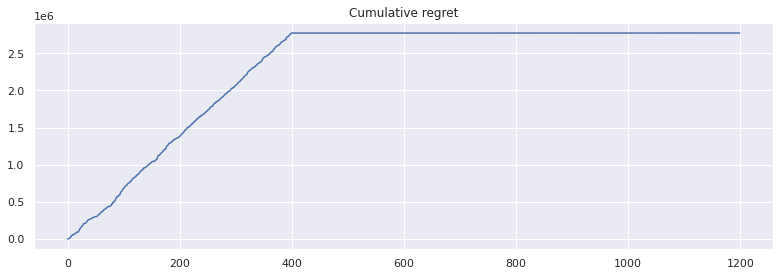

In [48]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('neural_ucb_linear.pdf')

Text(0.5, 1.0, 'reward')

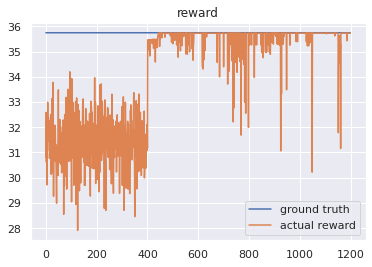

In [49]:
plt.plot([hwithoutconstraints(action)/(np.sqrt(args.card))]*T)
plt.plot(model.rewards_list)
plt.legend(['ground truth','actual reward'])
plt.title('reward')

In [50]:
plt.plot(model.feasi)
plt.title('infeasibility')

Text(0.5, 1.0, 'infeasibility')

In [42]:
hwithoutconstraints(action)/(np.sqrt(args.card))

77.81677523590568